HUMAN vs AI ENERGY EFFICIENCY COMPARISON ANALYSIS

1. BASIC COMPARISON STATISTICS:
----------------------------------------
Total comparisons: 190
AI wins: 158 (83.2%)
Human wins: 32 (16.8%)
Ties: 0 (0.0%)

Average Human Score: 2.065
Average AI Score: 2.534
Average Score Difference (AI-Human): 0.673

Paired T-test Results:
T-statistic: 9.474, P-value: 0.000
→ Statistically significant difference (p < 0.05)
Cohen's d (effect size): 0.854

2. PATTERN-WISE ANALYSIS:
----------------------------------------

Human Pattern Averages:
  human_pattern_1_score: 1.663
  human_pattern_2_score: 1.432
  human_pattern_3_score: 1.963
  human_pattern_4_score: 1.474
  human_pattern_5_score: 2.158
  human_pattern_6_score: 2.837
  human_pattern_7_score: 3.253
  human_pattern_8_score: 1.684

AI Pattern Averages:
  ai_pattern_1_score: 1.953
  ai_pattern_2_score: 1.663
  ai_pattern_3_score: 2.495
  ai_pattern_4_score: 1.705
  ai_pattern_5_score: 2.753
  ai_pattern_6_score: 3.426
  ai_pattern_7_score: 4.063


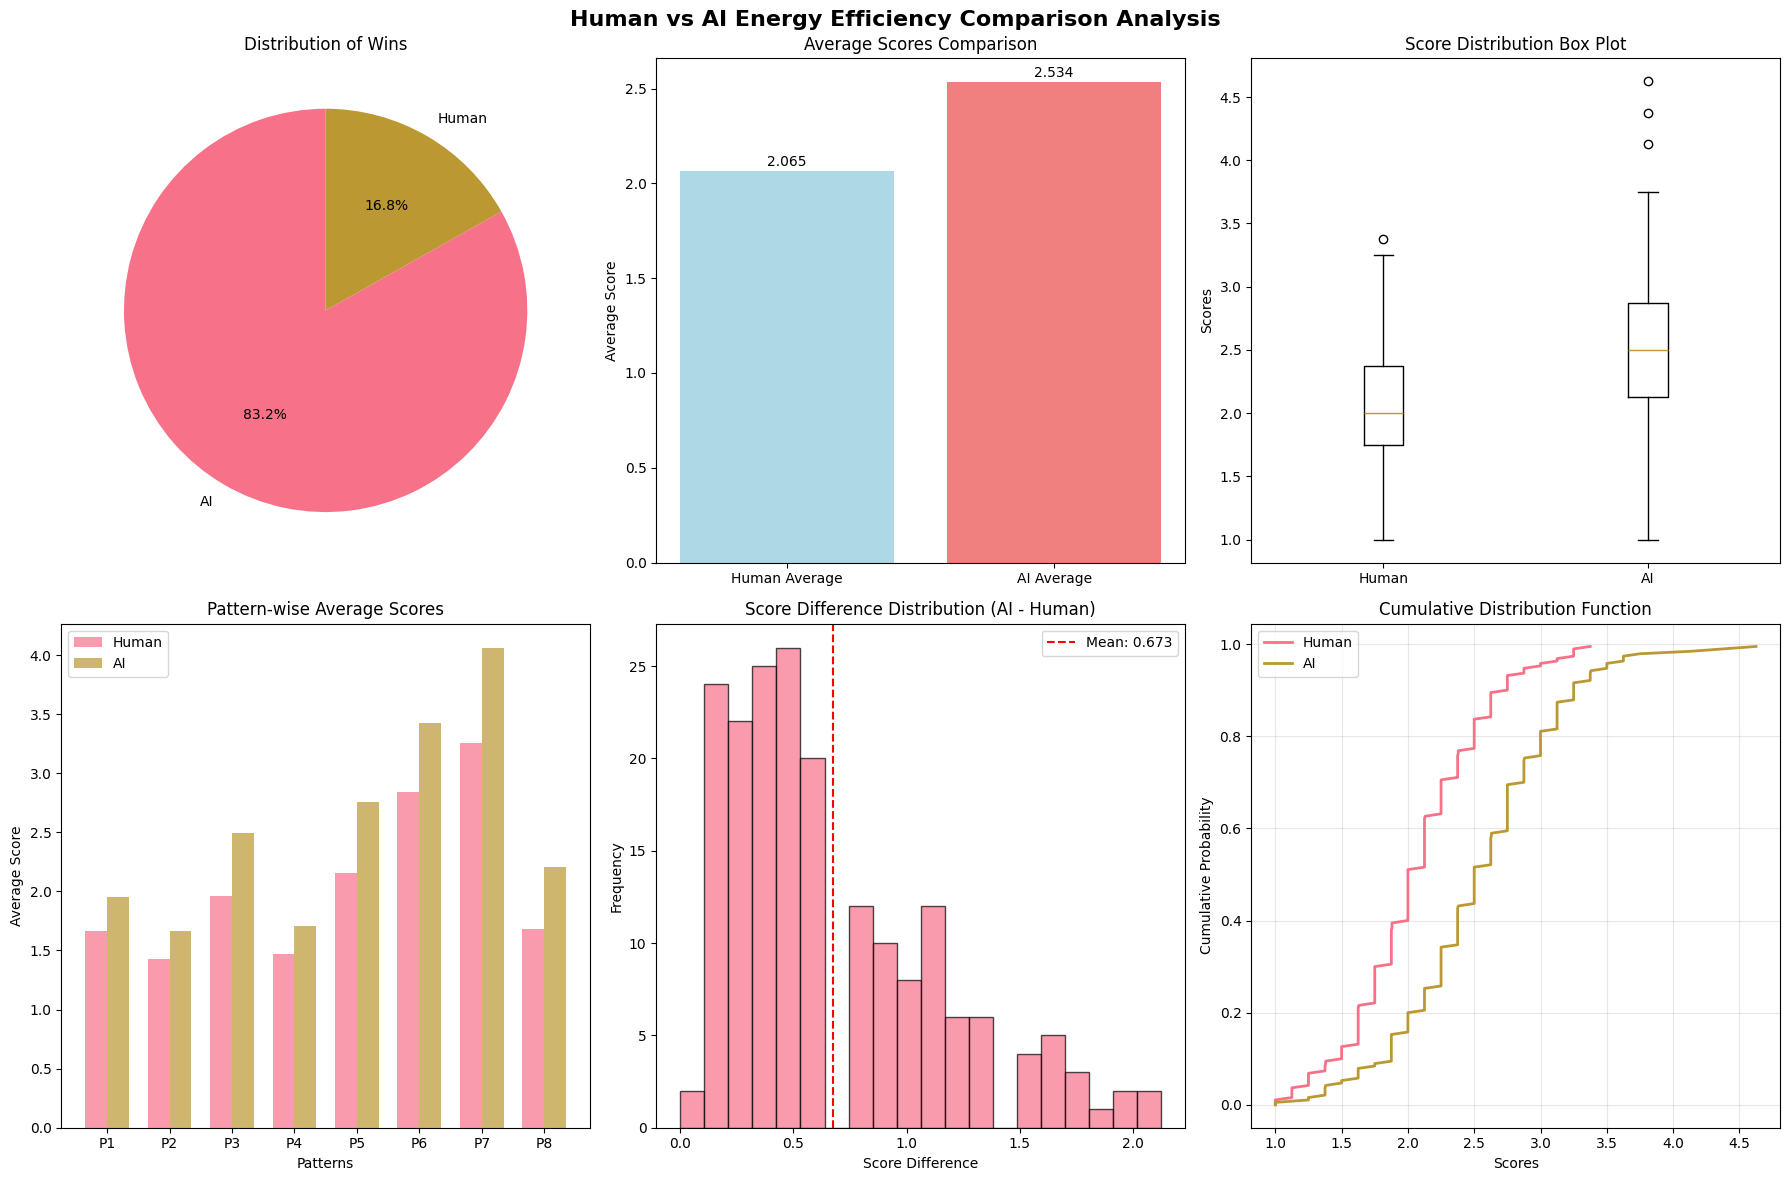

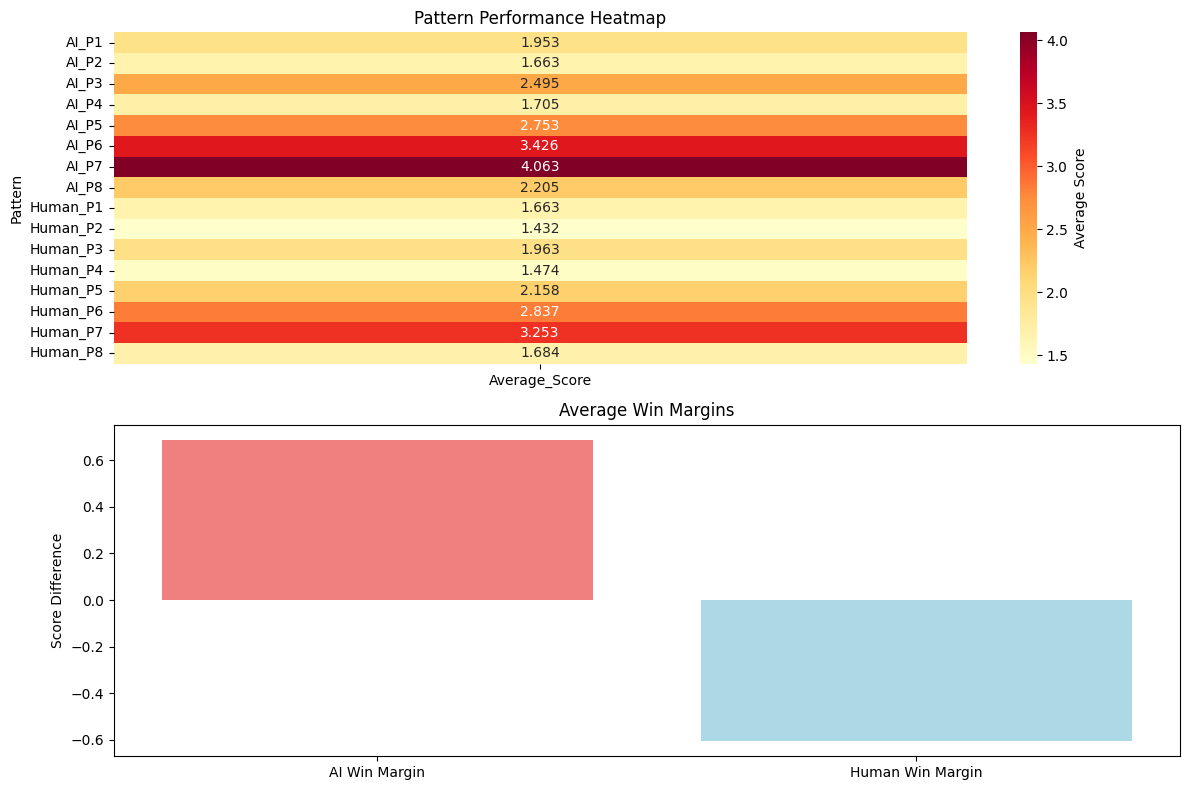


Results saved to 'energy_efficiency_results_summary.csv'

5. CORRELATION ANALYSIS:
----------------------------------------
Correlation between Human and AI scores: 0.233


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

def analyze_energy_efficiency_comparison(csv_file_path):
    """
    Comprehensive analysis of human vs AI energy efficiency scores
    """

    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    print("=" * 60)
    print("HUMAN vs AI ENERGY EFFICIENCY COMPARISON ANALYSIS")
    print("=" * 60)

    # Basic statistics
    print(f"\n1. BASIC COMPARISON STATISTICS:")
    print("-" * 40)

    # Win counts
    win_counts = df['winner'].value_counts()
    total_comparisons = len(df)

    print(f"Total comparisons: {total_comparisons}")
    print(f"AI wins: {win_counts.get('AI', 0)} ({win_counts.get('AI', 0)/total_comparisons*100:.1f}%)")
    print(f"Human wins: {win_counts.get('Human', 0)} ({win_counts.get('Human', 0)/total_comparisons*100:.1f}%)")
    print(f"Ties: {win_counts.get('Tie', 0)} ({win_counts.get('Tie', 0)/total_comparisons*100:.1f}%)")

    # Score statistics
    human_avg = df['human_average_score'].mean()
    ai_avg = df['ai_average_score'].mean()
    score_diff_avg = df['score_difference'].mean()

    print(f"\nAverage Human Score: {human_avg:.3f}")
    print(f"Average AI Score: {ai_avg:.3f}")
    print(f"Average Score Difference (AI-Human): {score_diff_avg:.3f}")

    # Statistical significance test
    t_stat, p_value = stats.ttest_rel(df['ai_average_score'], df['human_average_score'])
    print(f"\nPaired T-test Results:")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("→ Statistically significant difference (p < 0.05)")
    else:
        print("→ No statistically significant difference (p ≥ 0.05)")

    # Effect size
    cohens_d = (ai_avg - human_avg) / np.sqrt((df['ai_average_score'].var() + df['human_average_score'].var()) / 2)
    print(f"Cohen's d (effect size): {cohens_d:.3f}")

    # Pattern-wise analysis
    print(f"\n2. PATTERN-WISE ANALYSIS:")
    print("-" * 40)

    # Human patterns
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    human_pattern_means = df[human_patterns].mean()
    ai_pattern_means = df[ai_patterns].mean()

    print("\nHuman Pattern Averages:")
    for pattern, mean_score in human_pattern_means.items():
        print(f"  {pattern}: {mean_score:.3f}")

    print("\nAI Pattern Averages:")
    for pattern, mean_score in ai_pattern_means.items():
        print(f"  {pattern}: {mean_score:.3f}")

    # Best performing patterns
    best_human_pattern = human_pattern_means.idxmax()
    best_ai_pattern = ai_pattern_means.idxmax()

    print(f"\nHighest scoring Human pattern: {best_human_pattern} ({human_pattern_means[best_human_pattern]:.3f})")
    print(f"Highest scoring AI pattern: {best_ai_pattern} ({ai_pattern_means[best_ai_pattern]:.3f})")

    # Pattern consistency (standard deviation)
    human_pattern_std = df[human_patterns].std()
    ai_pattern_std = df[ai_patterns].std()

    most_consistent_human = human_pattern_std.idxmin()
    most_consistent_ai = ai_pattern_std.idxmin()

    print(f"\nMost consistent Human pattern: {most_consistent_human} (std: {human_pattern_std[most_consistent_human]:.3f})")
    print(f"Most consistent AI pattern: {most_consistent_ai} (std: {ai_pattern_std[most_consistent_ai]:.3f})")

    # Performance by win category
    print(f"\n3. PERFORMANCE BY WIN CATEGORY:")
    print("-" * 40)

    for winner_category in ['AI', 'Human', 'Tie']:
        if winner_category in df['winner'].values:
            subset = df[df['winner'] == winner_category]
            print(f"\n{winner_category} Wins (n={len(subset)}):")
            print(f"  Avg Human Score: {subset['human_average_score'].mean():.3f}")
            print(f"  Avg AI Score: {subset['ai_average_score'].mean():.3f}")
            print(f"  Avg Score Difference: {subset['score_difference'].mean():.3f}")

    # Generate comprehensive results table
    results_summary = {
        'Metric': [
            'Total Comparisons',
            'AI Wins (Count)',
            'AI Wins (%)',
            'Human Wins (Count)',
            'Human Wins (%)',
            'Ties (Count)',
            'Ties (%)',
            'Average Human Score',
            'Average AI Score',
            'Average Score Difference',
            'Statistical Significance (p-value)',
            'Effect Size (Cohen\'s d)',
            'Best Human Pattern',
            'Best AI Pattern',
            'Most Consistent Human Pattern',
            'Most Consistent AI Pattern'
        ],
        'Value': [
            total_comparisons,
            win_counts.get('AI', 0),
            f"{win_counts.get('AI', 0)/total_comparisons*100:.1f}%",
            win_counts.get('Human', 0),
            f"{win_counts.get('Human', 0)/total_comparisons*100:.1f}%",
            win_counts.get('Tie', 0),
            f"{win_counts.get('Tie', 0)/total_comparisons*100:.1f}%",
            f"{human_avg:.3f}",
            f"{ai_avg:.3f}",
            f"{score_diff_avg:.3f}",
            f"{p_value:.3f}",
            f"{cohens_d:.3f}",
            best_human_pattern,
            best_ai_pattern,
            most_consistent_human,
            most_consistent_ai
        ]
    }

    results_df = pd.DataFrame(results_summary)

    print(f"\n4. COMPREHENSIVE RESULTS SUMMARY:")
    print("-" * 40)
    print(results_df.to_string(index=False))

    return df, results_df

def create_visualizations(df, output_prefix="energy_efficiency"):
    """
    Create comprehensive visualizations for the analysis
    """

    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Human vs AI Energy Efficiency Comparison Analysis', fontsize=16, fontweight='bold')

    # 1. Win distribution pie chart
    win_counts = df['winner'].value_counts()
    axes[0, 0].pie(win_counts.values, labels=win_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Distribution of Wins')

    # 2. Average scores comparison
    categories = ['Human Average', 'AI Average']
    averages = [df['human_average_score'].mean(), df['ai_average_score'].mean()]
    bars = axes[0, 1].bar(categories, averages, color=['lightblue', 'lightcoral'])
    axes[0, 1].set_title('Average Scores Comparison')
    axes[0, 1].set_ylabel('Average Score')
    # Add value labels on bars
    for bar, value in zip(bars, averages):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.3f}', ha='center', va='bottom')

    # 3. Score distribution box plot
    score_data = [df['human_average_score'], df['ai_average_score']]
    axes[0, 2].boxplot(score_data, labels=['Human', 'AI'])
    axes[0, 2].set_title('Score Distribution Box Plot')
    axes[0, 2].set_ylabel('Scores')

    # 4. Pattern-wise comparison
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    human_pattern_means = df[human_patterns].mean()
    ai_pattern_means = df[ai_patterns].mean()

    patterns = [f'P{i}' for i in range(1, 9)]
    x = np.arange(len(patterns))
    width = 0.35

    axes[1, 0].bar(x - width/2, human_pattern_means.values, width, label='Human', alpha=0.7)
    axes[1, 0].bar(x + width/2, ai_pattern_means.values, width, label='AI', alpha=0.7)
    axes[1, 0].set_title('Pattern-wise Average Scores')
    axes[1, 0].set_xlabel('Patterns')
    axes[1, 0].set_ylabel('Average Score')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(patterns)
    axes[1, 0].legend()

    # 5. Score difference distribution
    axes[1, 1].hist(df['score_difference'], bins=20, alpha=0.7, edgecolor='black')
    axes[1, 1].axvline(df['score_difference'].mean(), color='red', linestyle='--',
                      label=f'Mean: {df["score_difference"].mean():.3f}')
    axes[1, 1].set_title('Score Difference Distribution (AI - Human)')
    axes[1, 1].set_xlabel('Score Difference')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()

    # 6. Cumulative distribution
    human_sorted = np.sort(df['human_average_score'])
    ai_sorted = np.sort(df['ai_average_score'])
    human_probs = np.arange(len(human_sorted)) / float(len(human_sorted))
    ai_probs = np.arange(len(ai_sorted)) / float(len(ai_sorted))

    axes[1, 2].plot(human_sorted, human_probs, label='Human', linewidth=2)
    axes[1, 2].plot(ai_sorted, ai_probs, label='AI', linewidth=2)
    axes[1, 2].set_title('Cumulative Distribution Function')
    axes[1, 2].set_xlabel('Scores')
    axes[1, 2].set_ylabel('Cumulative Probability')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{output_prefix}_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Additional detailed pattern analysis
    plt.figure(figsize=(12, 8))

    # Heatmap of pattern scores
    pattern_data = []
    for i in range(1, 9):
        pattern_data.append([f'Human_P{i}', df[f'human_pattern_{i}_score'].mean()])
        pattern_data.append([f'AI_P{i}', df[f'ai_pattern_{i}_score'].mean()])

    pattern_df = pd.DataFrame(pattern_data, columns=['Pattern', 'Average_Score'])

    plt.subplot(2, 1, 1)
    heatmap_data = pattern_df.pivot_table(index='Pattern', values='Average_Score')
    sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Average Score'})
    plt.title('Pattern Performance Heatmap')

    plt.subplot(2, 1, 2)
    # Win margin analysis
    ai_wins = df[df['winner'] == 'AI']
    human_wins = df[df['winner'] == 'Human']

    win_margins = []
    if len(ai_wins) > 0:
        win_margins.append(ai_wins['score_difference'].mean())
    else:
        win_margins.append(0)

    if len(human_wins) > 0:
        win_margins.append(-human_wins['score_difference'].mean())
    else:
        win_margins.append(0)

    plt.bar(['AI Win Margin', 'Human Win Margin'], win_margins,
            color=['lightcoral', 'lightblue'])
    plt.title('Average Win Margins')
    plt.ylabel('Score Difference')

    plt.tight_layout()
    plt.savefig(f'{output_prefix}_detailed_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Replace with your actual CSV file path
    csv_file_path = "/content/gemini_final_comprehensive.csv"  # Change this to your actual file path

    try:
        # Perform analysis
        df, results_df = analyze_energy_efficiency_comparison(csv_file_path)

        # Create visualizations
        create_visualizations(df)

        # Save results to CSV
        results_df.to_csv('energy_efficiency_results_summary.csv', index=False)
        print(f"\nResults saved to 'energy_efficiency_results_summary.csv'")

        # Additional correlation analysis
        print(f"\n5. CORRELATION ANALYSIS:")
        print("-" * 40)
        correlation = df['human_average_score'].corr(df['ai_average_score'])
        print(f"Correlation between Human and AI scores: {correlation:.3f}")

    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
        print("Please update the 'csv_file_path' variable with your actual file path.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

##Question age corelation included

HUMAN vs AI ENERGY EFFICIENCY COMPARISON ANALYSIS

1. BASIC COMPARISON STATISTICS:
----------------------------------------
Total comparisons: 190
AI wins: 158 (83.2%)
Human wins: 32 (16.8%)
Ties: 0 (0.0%)

Average Human Score: 2.065
Average AI Score: 2.534
Average Score Difference (AI-Human): 0.673

Paired T-test Results:
T-statistic: 9.474, P-value: 0.000
→ Statistically significant difference (p < 0.05)
Cohen's d (effect size): 0.854

2. QUESTION AGE ANALYSIS:
----------------------------------------
Question Date Range: 2016-02-26 to 2021-08-25
Average Question Age: 2472.9 days
Question Age Range: 1540 to 3548 days

Correlation with Question Age:
Human Score vs Question Age: -0.050
AI Score vs Question Age: -0.071
Score Difference vs Question Age: -0.079

Statistical Significance of Correlations:
Human Score vs Age p-value: 0.494 (not significant)
AI Score vs Age p-value: 0.329 (not significant)

3. PERFORMANCE BY QUESTION AGE QUARTILES:
----------------------------------------

Ne

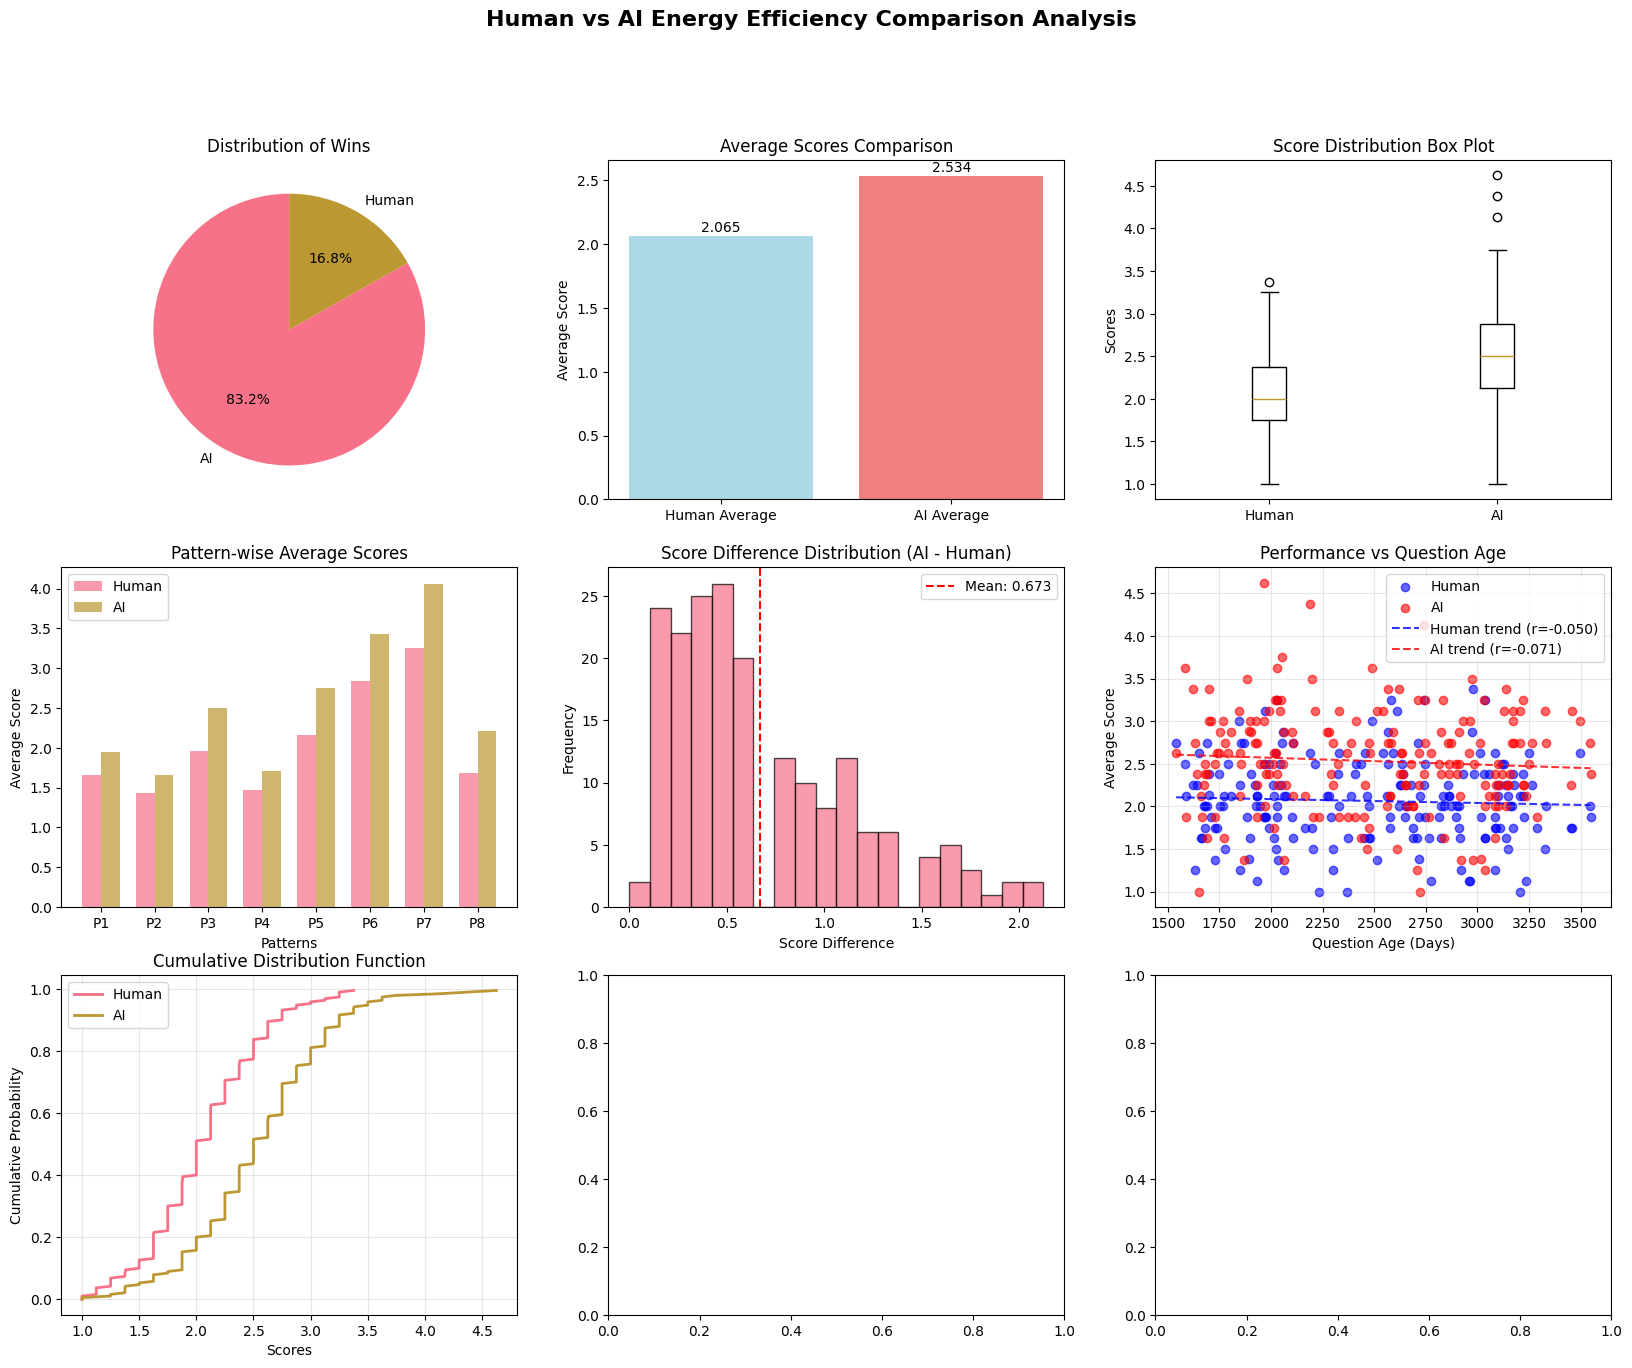

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

def analyze_energy_efficiency_comparison(csv_file_path):
    """
    Comprehensive analysis of human vs AI energy efficiency scores
    """

    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    # Convert QuestionDate to datetime and calculate question age
    df['QuestionDate'] = pd.to_datetime(df['QuestionDate'], errors='coerce')
    current_date = datetime.now()
    df['QuestionAge_Days'] = (current_date - df['QuestionDate']).dt.days

    print("=" * 60)
    print("HUMAN vs AI ENERGY EFFICIENCY COMPARISON ANALYSIS")
    print("=" * 60)

    # Basic statistics
    print(f"\n1. BASIC COMPARISON STATISTICS:")
    print("-" * 40)

    # Win counts
    win_counts = df['winner'].value_counts()
    total_comparisons = len(df)

    print(f"Total comparisons: {total_comparisons}")
    print(f"AI wins: {win_counts.get('AI', 0)} ({win_counts.get('AI', 0)/total_comparisons*100:.1f}%)")
    print(f"Human wins: {win_counts.get('Human', 0)} ({win_counts.get('Human', 0)/total_comparisons*100:.1f}%)")
    print(f"Ties: {win_counts.get('Tie', 0)} ({win_counts.get('Tie', 0)/total_comparisons*100:.1f}%)")

    # Score statistics
    human_avg = df['human_average_score'].mean()
    ai_avg = df['ai_average_score'].mean()
    score_diff_avg = df['score_difference'].mean()

    print(f"\nAverage Human Score: {human_avg:.3f}")
    print(f"Average AI Score: {ai_avg:.3f}")
    print(f"Average Score Difference (AI-Human): {score_diff_avg:.3f}")

    # Statistical significance test
    t_stat, p_value = stats.ttest_rel(df['ai_average_score'], df['human_average_score'])
    print(f"\nPaired T-test Results:")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("→ Statistically significant difference (p < 0.05)")
    else:
        print("→ No statistically significant difference (p ≥ 0.05)")

    # Effect size
    cohens_d = (ai_avg - human_avg) / np.sqrt((df['ai_average_score'].var() + df['human_average_score'].var()) / 2)
    print(f"Cohen's d (effect size): {cohens_d:.3f}")

    # Question Age analysis
    print(f"\n2. QUESTION AGE ANALYSIS:")
    print("-" * 40)

    print(f"Question Date Range: {df['QuestionDate'].min().strftime('%Y-%m-%d')} to {df['QuestionDate'].max().strftime('%Y-%m-%d')}")
    print(f"Average Question Age: {df['QuestionAge_Days'].mean():.1f} days")
    print(f"Question Age Range: {df['QuestionAge_Days'].min():.0f} to {df['QuestionAge_Days'].max():.0f} days")

    # Correlation with question age
    corr_human_age = df['human_average_score'].corr(df['QuestionAge_Days'])
    corr_ai_age = df['ai_average_score'].corr(df['QuestionAge_Days'])
    corr_diff_age = df['score_difference'].corr(df['QuestionAge_Days'])

    print(f"\nCorrelation with Question Age:")
    print(f"Human Score vs Question Age: {corr_human_age:.3f}")
    print(f"AI Score vs Question Age: {corr_ai_age:.3f}")
    print(f"Score Difference vs Question Age: {corr_diff_age:.3f}")

    # Statistical significance of correlations
    corr_human_p = stats.pearsonr(df['human_average_score'], df['QuestionAge_Days'])[1]
    corr_ai_p = stats.pearsonr(df['ai_average_score'], df['QuestionAge_Days'])[1]

    print(f"\nStatistical Significance of Correlations:")
    print(f"Human Score vs Age p-value: {corr_human_p:.3f} {'(significant)' if corr_human_p < 0.05 else '(not significant)'}")
    print(f"AI Score vs Age p-value: {corr_ai_p:.3f} {'(significant)' if corr_ai_p < 0.05 else '(not significant)'}")

    # Performance by time periods (quartiles)
    df['Age_Quartile'] = pd.qcut(df['QuestionAge_Days'], 4, labels=['Newest', 'Recent', 'Older', 'Oldest'])

    print(f"\n3. PERFORMANCE BY QUESTION AGE QUARTILES:")
    print("-" * 40)

    for quartile in ['Newest', 'Recent', 'Older', 'Oldest']:
        quartile_data = df[df['Age_Quartile'] == quartile]
        if len(quartile_data) > 0:
            print(f"\n{quartile} Questions (n={len(quartile_data)}):")
            print(f"  Avg Age: {quartile_data['QuestionAge_Days'].mean():.1f} days")
            print(f"  Avg Human Score: {quartile_data['human_average_score'].mean():.3f}")
            print(f"  Avg AI Score: {quartile_data['ai_average_score'].mean():.3f}")
            print(f"  AI Win %: {(quartile_data['winner'] == 'AI').sum()/len(quartile_data)*100:.1f}%")

    # Pattern-wise analysis
    print(f"\n4. PATTERN-WISE ANALYSIS:")
    print("-" * 40)

    # Human patterns
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    human_pattern_means = df[human_patterns].mean()
    ai_pattern_means = df[ai_patterns].mean()

    print("\nHuman Pattern Averages:")
    for pattern, mean_score in human_pattern_means.items():
        print(f"  {pattern}: {mean_score:.3f}")

    print("\nAI Pattern Averages:")
    for pattern, mean_score in ai_pattern_means.items():
        print(f"  {pattern}: {mean_score:.3f}")

    # Best performing patterns
    best_human_pattern = human_pattern_means.idxmax()
    best_ai_pattern = ai_pattern_means.idxmax()

    print(f"\nHighest scoring Human pattern: {best_human_pattern} ({human_pattern_means[best_human_pattern]:.3f})")
    print(f"Highest scoring AI pattern: {best_ai_pattern} ({ai_pattern_means[best_ai_pattern]:.3f})")

    # Pattern consistency (standard deviation)
    human_pattern_std = df[human_patterns].std()
    ai_pattern_std = df[ai_patterns].std()

    most_consistent_human = human_pattern_std.idxmin()
    most_consistent_ai = ai_pattern_std.idxmin()

    print(f"\nMost consistent Human pattern: {most_consistent_human} (std: {human_pattern_std[most_consistent_human]:.3f})")
    print(f"Most consistent AI pattern: {most_consistent_ai} (std: {ai_pattern_std[most_consistent_ai]:.3f})")

    # Performance by win category
    print(f"\n5. PERFORMANCE BY WIN CATEGORY:")
    print("-" * 40)

    for winner_category in ['AI', 'Human', 'Tie']:
        if winner_category in df['winner'].values:
            subset = df[df['winner'] == winner_category]
            print(f"\n{winner_category} Wins (n={len(subset)}):")
            print(f"  Avg Human Score: {subset['human_average_score'].mean():.3f}")
            print(f"  Avg AI Score: {subset['ai_average_score'].mean():.3f}")
            print(f"  Avg Score Difference: {subset['score_difference'].mean():.3f}")
            print(f"  Avg Question Age: {subset['QuestionAge_Days'].mean():.1f} days")

    # Generate comprehensive results table
    results_summary = {
        'Metric': [
            'Total Comparisons',
            'AI Wins (Count)',
            'AI Wins (%)',
            'Human Wins (Count)',
            'Human Wins (%)',
            'Ties (Count)',
            'Ties (%)',
            'Average Human Score',
            'Average AI Score',
            'Average Score Difference',
            'Statistical Significance (p-value)',
            'Effect Size (Cohen\'s d)',
            'Average Question Age (days)',
            'Human Score vs Age Correlation',
            'AI Score vs Age Correlation',
            'Score Diff vs Age Correlation',
            'Best Human Pattern',
            'Best AI Pattern',
            'Most Consistent Human Pattern',
            'Most Consistent AI Pattern'
        ],
        'Value': [
            total_comparisons,
            win_counts.get('AI', 0),
            f"{win_counts.get('AI', 0)/total_comparisons*100:.1f}%",
            win_counts.get('Human', 0),
            f"{win_counts.get('Human', 0)/total_comparisons*100:.1f}%",
            win_counts.get('Tie', 0),
            f"{win_counts.get('Tie', 0)/total_comparisons*100:.1f}%",
            f"{human_avg:.3f}",
            f"{ai_avg:.3f}",
            f"{score_diff_avg:.3f}",
            f"{p_value:.3f}",
            f"{cohens_d:.3f}",
            f"{df['QuestionAge_Days'].mean():.1f}",
            f"{corr_human_age:.3f}",
            f"{corr_ai_age:.3f}",
            f"{corr_diff_age:.3f}",
            best_human_pattern,
            best_ai_pattern,
            most_consistent_human,
            most_consistent_ai
        ]
    }

    results_df = pd.DataFrame(results_summary)

    print(f"\n6. COMPREHENSIVE RESULTS SUMMARY:")
    print("-" * 40)
    print(results_df.to_string(index=False))

    return df, results_df

def create_visualizations(df, output_prefix="energy_efficiency"):
    """
    Create comprehensive visualizations for the analysis including time-based analysis
    """

    # Create subplots - updated layout to include time-based analysis
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('Human vs AI Energy Efficiency Comparison Analysis', fontsize=16, fontweight='bold')

    # 1. Win distribution pie chart
    win_counts = df['winner'].value_counts()
    axes[0, 0].pie(win_counts.values, labels=win_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Distribution of Wins')

    # 2. Average scores comparison
    categories = ['Human Average', 'AI Average']
    averages = [df['human_average_score'].mean(), df['ai_average_score'].mean()]
    bars = axes[0, 1].bar(categories, averages, color=['lightblue', 'lightcoral'])
    axes[0, 1].set_title('Average Scores Comparison')
    axes[0, 1].set_ylabel('Average Score')
    # Add value labels on bars
    for bar, value in zip(bars, averages):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.3f}', ha='center', va='bottom')

    # 3. Score distribution box plot
    score_data = [df['human_average_score'], df['ai_average_score']]
    axes[0, 2].boxplot(score_data, labels=['Human', 'AI'])
    axes[0, 2].set_title('Score Distribution Box Plot')
    axes[0, 2].set_ylabel('Scores')

    # 4. Pattern-wise comparison
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    human_pattern_means = df[human_patterns].mean()
    ai_pattern_means = df[ai_patterns].mean()

    patterns = [f'P{i}' for i in range(1, 9)]
    x = np.arange(len(patterns))
    width = 0.35

    axes[1, 0].bar(x - width/2, human_pattern_means.values, width, label='Human', alpha=0.7)
    axes[1, 0].bar(x + width/2, ai_pattern_means.values, width, label='AI', alpha=0.7)
    axes[1, 0].set_title('Pattern-wise Average Scores')
    axes[1, 0].set_xlabel('Patterns')
    axes[1, 0].set_ylabel('Average Score')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(patterns)
    axes[1, 0].legend()

    # 5. Score difference distribution
    axes[1, 1].hist(df['score_difference'], bins=20, alpha=0.7, edgecolor='black')
    axes[1, 1].axvline(df['score_difference'].mean(), color='red', linestyle='--',
                      label=f'Mean: {df["score_difference"].mean():.3f}')
    axes[1, 1].set_title('Score Difference Distribution (AI - Human)')
    axes[1, 1].set_xlabel('Score Difference')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()

    # 6. Performance vs Question Age
    axes[1, 2].scatter(df['QuestionAge_Days'], df['human_average_score'], alpha=0.6, label='Human', color='blue')
    axes[1, 2].scatter(df['QuestionAge_Days'], df['ai_average_score'], alpha=0.6, label='AI', color='red')

    # Add trend lines
    z_human = np.polyfit(df['QuestionAge_Days'], df['human_average_score'], 1)
    z_ai = np.polyfit(df['QuestionAge_Days'], df['ai_average_score'], 1)
    p_human = np.poly1d(z_human)
    p_ai = np.poly1d(z_ai)

    x_range = np.linspace(df['QuestionAge_Days'].min(), df['QuestionAge_Days'].max(), 100)
    axes[1, 2].plot(x_range, p_human(x_range), 'b--', alpha=0.8,
                   label=f'Human trend (r={df["human_average_score"].corr(df["QuestionAge_Days"]):.3f})')
    axes[1, 2].plot(x_range, p_ai(x_range), 'r--', alpha=0.8,
                   label=f'AI trend (r={df["ai_average_score"].corr(df["QuestionAge_Days"]):.3f})')

    axes[1, 2].set_title('Performance vs Question Age')
    axes[1, 2].set_xlabel('Question Age (Days)')
    axes[1, 2].set_ylabel('Average Score')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    # 7. Cumulative distribution
    human_sorted = np.sort(df['human_average_score'])
    ai_sorted = np.sort(df['ai_average_score'])
    human_probs = np.arange(len(human_sorted)) / float(len(human_sorted))
    ai_probs = np.arange(len(ai_sorted)) / float(len(ai_sorted))

    axes[2, 0].plot(human_sorted, human_probs, label='Human', linewidth=2)
    axes[2, 0].plot(ai_sorted, ai_probs, label='AI', linewidth=2)
    axes[2, 0].set_title('Cumulative Distribution Function')
    axes[2, 0].set_xlabel('Scores')
    axes[2, 0].set_ylabel('Cumulative Probability')
    axes[2, 0].legend()
    axes[2, 0].grid(True, alpha=0.3)

    # 8. Win percentage by age quartile
    age_quartile_win = df.groupby('Age_Quartile')['winner'].value_counts(normalize=True).unstack().fillna(0)
    age_quartile_win[['AI', 'Human', 'Tie']].plot(kind='bar', ax=axes[2, 1], stacked=True)
    axes[2, 1].set_title('Win Distribution by Question Age Quartile')
    axes[2, 1].set_xlabel('Question Age Quartile')
    axes[2, 1].set_ylabel('Proportion')
    axes[2, 1].legend(title='Winner')
    axes[2, 1].tick_params(axis='x', rotation=45)

    # 9. Score difference vs Question Age
    axes[2, 2].scatter(df['QuestionAge_Days'], df['score_difference'], alpha=0.6, color='green')
    z_diff = np.polyfit(df['QuestionAge_Days'], df['score_difference'], 1)
    p_diff = np.poly1d(z_diff)
    axes[2, 2].plot(x_range, p_diff(x_range), 'g--', alpha=0.8,
                   label=f'Trend (r={df["score_difference"].corr(df["QuestionAge_Days"]):.3f})')
    axes[2, 2].axhline(y=0, color='red', linestyle='-', alpha=0.3, label='Tie line')
    axes[2, 2].set_title('Score Difference vs Question Age')
    axes[2, 2].set_xlabel('Question Age (Days)')
    axes[2, 2].set_ylabel('Score Difference (AI - Human)')
    axes[2, 2].legend()
    axes[2, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{output_prefix}_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Additional detailed pattern and time analysis
    plt.figure(figsize=(15, 10))

    # Heatmap of pattern scores
    plt.subplot(2, 2, 1)
    pattern_data = []
    for i in range(1, 9):
        pattern_data.append([f'Human_P{i}', df[f'human_pattern_{i}_score'].mean()])
        pattern_data.append([f'AI_P{i}', df[f'ai_pattern_{i}_score'].mean()])

    pattern_df = pd.DataFrame(pattern_data, columns=['Pattern', 'Average_Score'])
    heatmap_data = pattern_df.pivot_table(index='Pattern', values='Average_Score')
    sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Average Score'})
    plt.title('Pattern Performance Heatmap')

    # Performance over time (by month)
    plt.subplot(2, 2, 2)
    df['QuestionMonth'] = df['QuestionDate'].dt.to_period('M')
    monthly_performance = df.groupby('QuestionMonth').agg({
        'human_average_score': 'mean',
        'ai_average_score': 'mean',
        'winner': lambda x: (x == 'AI').mean()
    }).reset_index()
    monthly_performance['QuestionMonth'] = monthly_performance['QuestionMonth'].astype(str)

    x = range(len(monthly_performance))
    plt.plot(x, monthly_performance['human_average_score'], marker='o', label='Human Score')
    plt.plot(x, monthly_performance['ai_average_score'], marker='o', label='AI Score')
    plt.plot(x, monthly_performance['winner'] * 5, marker='s', label='AI Win Rate (scaled)')
    plt.xticks(x, monthly_performance['QuestionMonth'], rotation=45)
    plt.title('Performance Trends Over Time')
    plt.xlabel('Month')
    plt.ylabel('Scores / Win Rate (scaled)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Win margin by age quartile
    plt.subplot(2, 2, 3)
    ai_wins = df[df['winner'] == 'AI']
    human_wins = df[df['winner'] == 'Human']

    win_margins = []
    if len(ai_wins) > 0:
        win_margins.append(ai_wins['score_difference'].mean())
    else:
        win_margins.append(0)

    if len(human_wins) > 0:
        win_margins.append(-human_wins['score_difference'].mean())
    else:
        win_margins.append(0)

    plt.bar(['AI Win Margin', 'Human Win Margin'], win_margins,
            color=['lightcoral', 'lightblue'])
    plt.title('Average Win Margins')
    plt.ylabel('Score Difference')

    # Correlation matrix
    plt.subplot(2, 2, 4)
    correlation_data = df[['human_average_score', 'ai_average_score', 'score_difference', 'QuestionAge_Days']]
    corr_matrix = correlation_data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f',
                square=True, cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix')

    plt.tight_layout()
    plt.savefig(f'{output_prefix}_detailed_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Replace with your actual CSV file path
    csv_file_path = "/content/Gemini.csv"  # Change this to your actual file path

    try:
        # Perform analysis
        df, results_df = analyze_energy_efficiency_comparison(csv_file_path)

        # Create visualizations
        create_visualizations(df)

        # Save results to CSV
        results_df.to_csv('energy_efficiency_results_summary.csv', index=False)
        print(f"\nResults saved to 'energy_efficiency_results_summary.csv'")

        # Additional correlation analysis
        print(f"\n7. ADDITIONAL CORRELATION ANALYSIS:")
        print("-" * 40)
        correlation = df['human_average_score'].corr(df['ai_average_score'])
        print(f"Correlation between Human and AI scores: {correlation:.3f}")

        # Time-based insights
        print(f"\n8. TIME-BASED INSIGHTS:")
        print("-" * 40)

        # Performance in oldest vs newest questions
        newest_quartile = df[df['Age_Quartile'] == 'Newest']
        oldest_quartile = df[df['Age_Quartile'] == 'Oldest']

        if len(newest_quartile) > 0 and len(oldest_quartile) > 0:
            print(f"Newest vs Oldest Questions Performance:")
            print(f"  Newest - Human: {newest_quartile['human_average_score'].mean():.3f}, AI: {newest_quartile['ai_average_score'].mean():.3f}")
            print(f"  Oldest - Human: {oldest_quartile['human_average_score'].mean():.3f}, AI: {oldest_quartile['ai_average_score'].mean():.3f}")
            print(f"  AI Improvement: {(newest_quartile['ai_average_score'].mean() - oldest_quartile['ai_average_score'].mean()):.3f}")
            print(f"  Human Improvement: {(newest_quartile['human_average_score'].mean() - oldest_quartile['human_average_score'].mean()):.3f}")

    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
        print("Please update the 'csv_file_path' variable with your actual file path.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

HUMAN vs AI ENERGY EFFICIENCY COMPARISON ANALYSIS

1. BASIC COMPARISON STATISTICS:
----------------------------------------
Total comparisons: 190
AI wins: 155 (81.6%)
Human wins: 25 (13.2%)
Ties: 10 (5.3%)

Average Human Score: 2.020
Average AI Score: 2.534
Average Score Difference (AI-Human): 0.692

Paired T-test Results:
T-statistic: 10.594, P-value: 0.000
→ Statistically significant difference (p < 0.05)
Cohen's d (effect size): 1.014

2. QUESTION AGE ANALYSIS:
----------------------------------------
Question Date Range: 2016-02-26 to 2021-08-25
Average Question Age: 2473.6 days
Question Age Range: 1541 to 3548 days

Correlation with Question Age:
Human Score vs Question Age: -0.036
AI Score vs Question Age: -0.126
Score Difference vs Question Age: -0.123

Statistical Significance of Correlations:
Human Score vs Age p-value: 0.622 (not significant)
AI Score vs Age p-value: 0.083 (not significant)

3. PERFORMANCE BY QUESTION AGE QUARTILES:
----------------------------------------



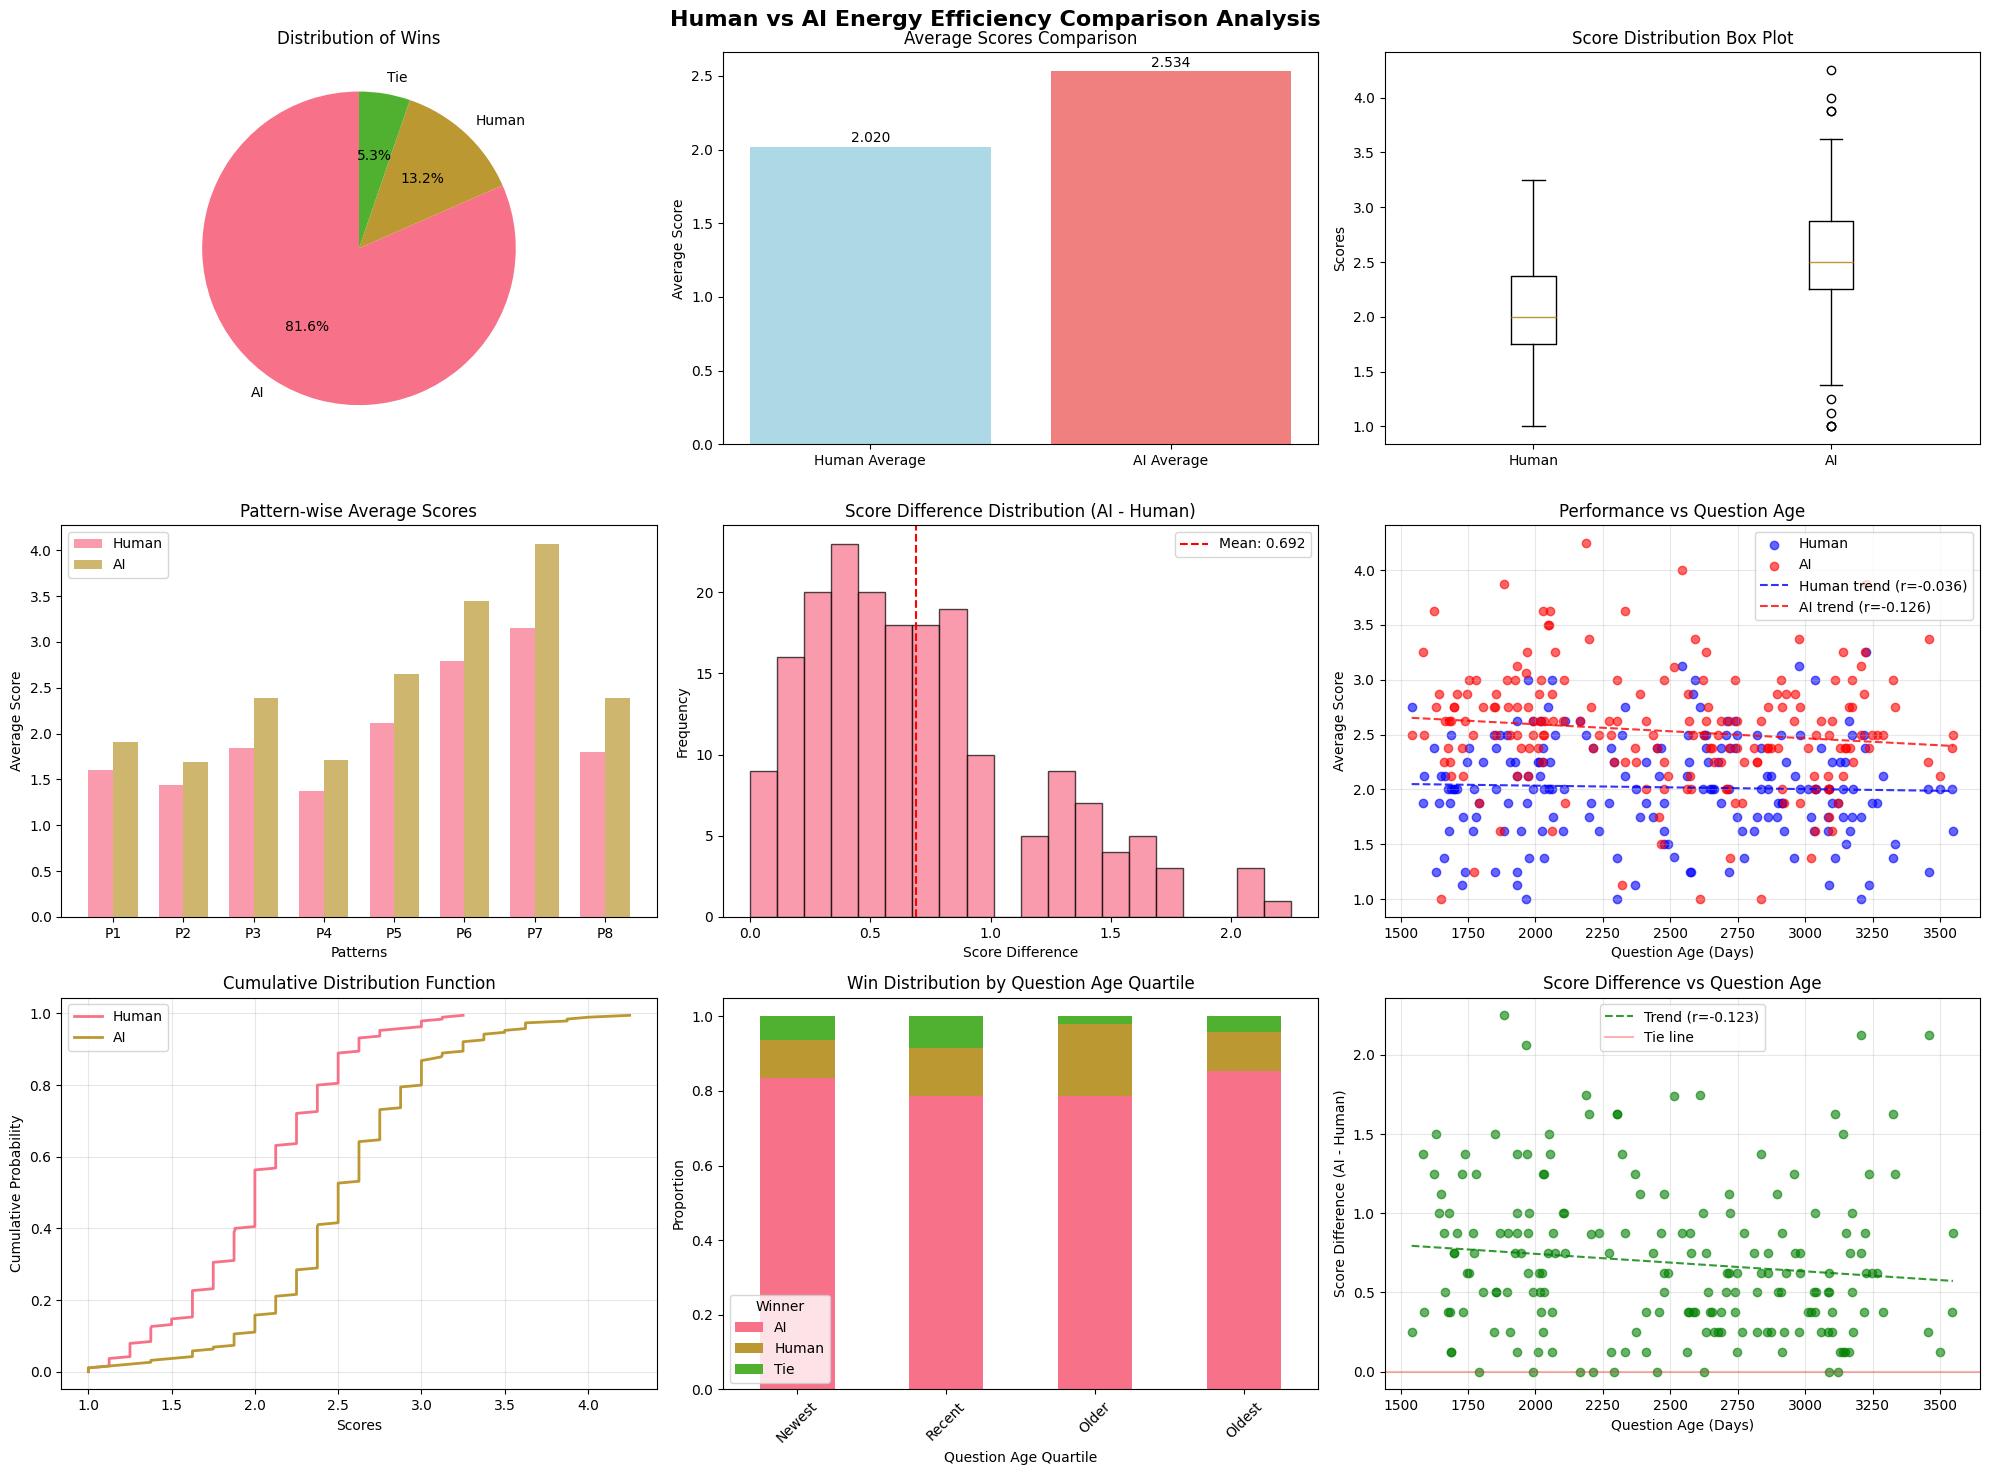

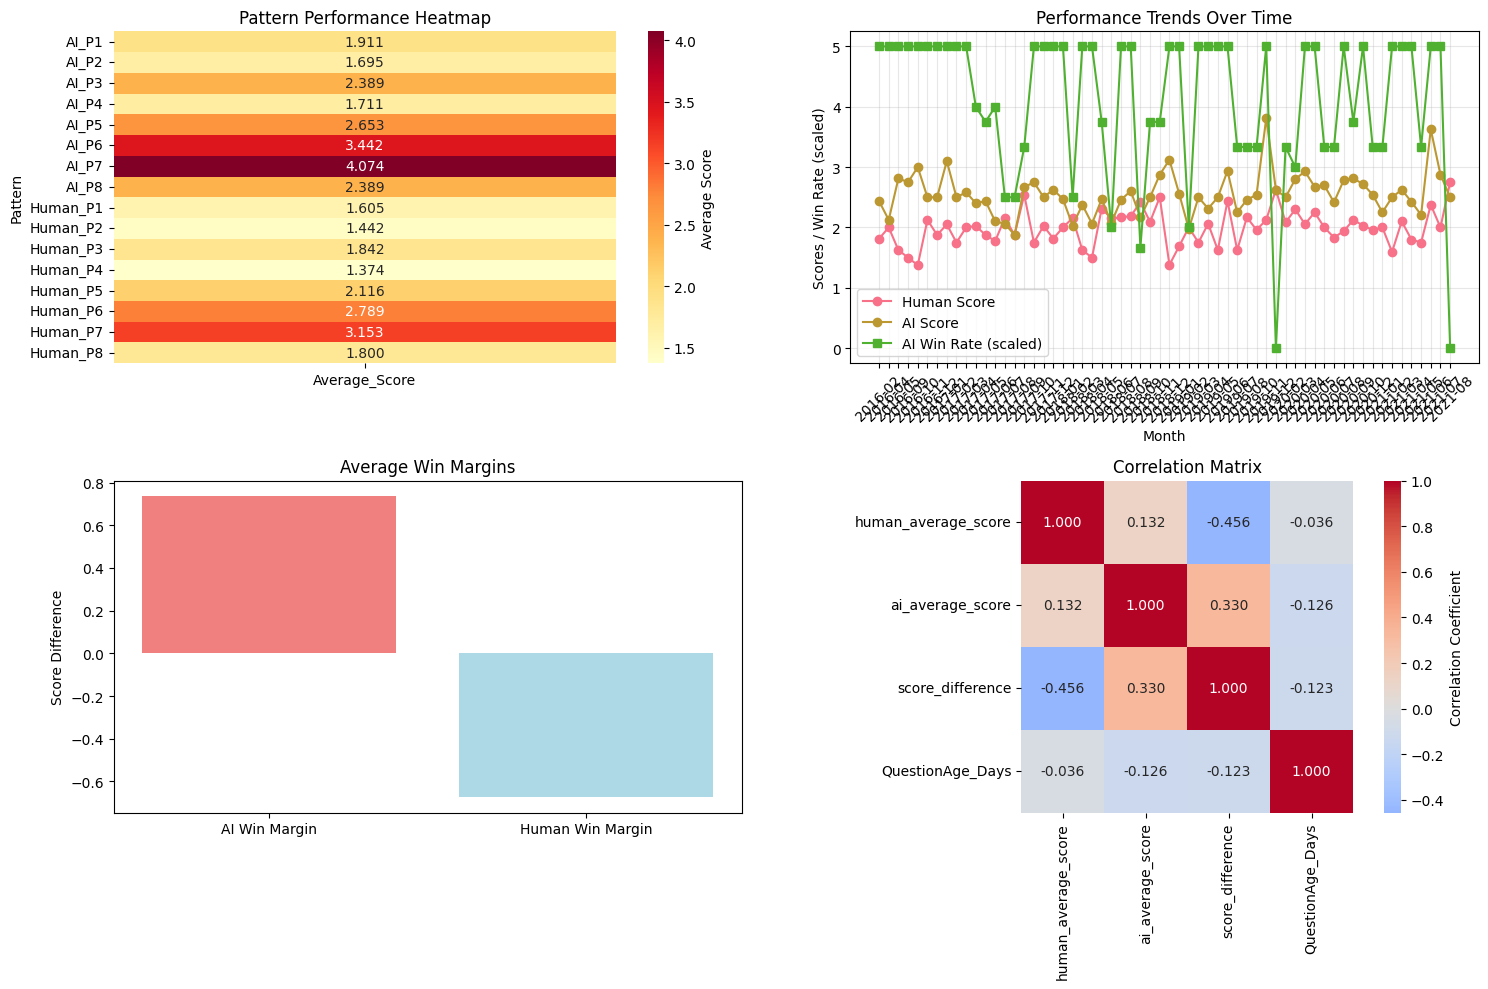


Results saved to 'energy_efficiency_results_summary.csv'

7. ADDITIONAL CORRELATION ANALYSIS:
----------------------------------------
Correlation between Human and AI scores: 0.132

8. TIME-BASED INSIGHTS:
----------------------------------------
Newest vs Oldest Questions Performance:
  Newest - Human: 1.958, AI: 2.600
  Oldest - Human: 1.956, AI: 2.500
  AI Improvement: 0.100
  Human Improvement: 0.003


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

def analyze_energy_efficiency_comparison(csv_file_path):
    """
    Comprehensive analysis of human vs AI energy efficiency scores
    """

    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    # Convert QuestionDate to datetime and calculate question age
    df['QuestionDate'] = pd.to_datetime(df['QuestionDate'], errors='coerce')
    current_date = datetime.now()
    df['QuestionAge_Days'] = (current_date - df['QuestionDate']).dt.days

    print("=" * 60)
    print("HUMAN vs AI ENERGY EFFICIENCY COMPARISON ANALYSIS")
    print("=" * 60)

    # Basic statistics
    print(f"\n1. BASIC COMPARISON STATISTICS:")
    print("-" * 40)

    # Win counts
    win_counts = df['winner'].value_counts()
    total_comparisons = len(df)

    print(f"Total comparisons: {total_comparisons}")
    print(f"AI wins: {win_counts.get('AI', 0)} ({win_counts.get('AI', 0)/total_comparisons*100:.1f}%)")
    print(f"Human wins: {win_counts.get('Human', 0)} ({win_counts.get('Human', 0)/total_comparisons*100:.1f}%)")
    print(f"Ties: {win_counts.get('Tie', 0)} ({win_counts.get('Tie', 0)/total_comparisons*100:.1f}%)")

    # Score statistics
    human_avg = df['human_average_score'].mean()
    ai_avg = df['ai_average_score'].mean()
    score_diff_avg = df['score_difference'].mean()

    print(f"\nAverage Human Score: {human_avg:.3f}")
    print(f"Average AI Score: {ai_avg:.3f}")
    print(f"Average Score Difference (AI-Human): {score_diff_avg:.3f}")

    # Statistical significance test
    t_stat, p_value = stats.ttest_rel(df['ai_average_score'], df['human_average_score'])
    print(f"\nPaired T-test Results:")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("→ Statistically significant difference (p < 0.05)")
    else:
        print("→ No statistically significant difference (p ≥ 0.05)")

    # Effect size
    cohens_d = (ai_avg - human_avg) / np.sqrt((df['ai_average_score'].var() + df['human_average_score'].var()) / 2)
    print(f"Cohen's d (effect size): {cohens_d:.3f}")

    # Question Age analysis
    print(f"\n2. QUESTION AGE ANALYSIS:")
    print("-" * 40)

    print(f"Question Date Range: {df['QuestionDate'].min().strftime('%Y-%m-%d')} to {df['QuestionDate'].max().strftime('%Y-%m-%d')}")
    print(f"Average Question Age: {df['QuestionAge_Days'].mean():.1f} days")
    print(f"Question Age Range: {df['QuestionAge_Days'].min():.0f} to {df['QuestionAge_Days'].max():.0f} days")

    # Correlation with question age
    corr_human_age = df['human_average_score'].corr(df['QuestionAge_Days'])
    corr_ai_age = df['ai_average_score'].corr(df['QuestionAge_Days'])
    corr_diff_age = df['score_difference'].corr(df['QuestionAge_Days'])

    print(f"\nCorrelation with Question Age:")
    print(f"Human Score vs Question Age: {corr_human_age:.3f}")
    print(f"AI Score vs Question Age: {corr_ai_age:.3f}")
    print(f"Score Difference vs Question Age: {corr_diff_age:.3f}")

    # Statistical significance of correlations
    corr_human_p = stats.pearsonr(df['human_average_score'], df['QuestionAge_Days'])[1]
    corr_ai_p = stats.pearsonr(df['ai_average_score'], df['QuestionAge_Days'])[1]

    print(f"\nStatistical Significance of Correlations:")
    print(f"Human Score vs Age p-value: {corr_human_p:.3f} {'(significant)' if corr_human_p < 0.05 else '(not significant)'}")
    print(f"AI Score vs Age p-value: {corr_ai_p:.3f} {'(significant)' if corr_ai_p < 0.05 else '(not significant)'}")

    # Performance by time periods (quartiles)
    df['Age_Quartile'] = pd.qcut(df['QuestionAge_Days'], 4, labels=['Newest', 'Recent', 'Older', 'Oldest'])

    print(f"\n3. PERFORMANCE BY QUESTION AGE QUARTILES:")
    print("-" * 40)

    for quartile in ['Newest', 'Recent', 'Older', 'Oldest']:
        quartile_data = df[df['Age_Quartile'] == quartile]
        if len(quartile_data) > 0:
            print(f"\n{quartile} Questions (n={len(quartile_data)}):")
            print(f"  Avg Age: {quartile_data['QuestionAge_Days'].mean():.1f} days")
            print(f"  Avg Human Score: {quartile_data['human_average_score'].mean():.3f}")
            print(f"  Avg AI Score: {quartile_data['ai_average_score'].mean():.3f}")
            print(f"  AI Win %: {(quartile_data['winner'] == 'AI').sum()/len(quartile_data)*100:.1f}%")

    # Pattern-wise analysis
    print(f"\n4. PATTERN-WISE ANALYSIS:")
    print("-" * 40)

    # Human patterns
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    human_pattern_means = df[human_patterns].mean()
    ai_pattern_means = df[ai_patterns].mean()

    print("\nHuman Pattern Averages:")
    for pattern, mean_score in human_pattern_means.items():
        print(f"  {pattern}: {mean_score:.3f}")

    print("\nAI Pattern Averages:")
    for pattern, mean_score in ai_pattern_means.items():
        print(f"  {pattern}: {mean_score:.3f}")

    # Best performing patterns
    best_human_pattern = human_pattern_means.idxmax()
    best_ai_pattern = ai_pattern_means.idxmax()

    print(f"\nHighest scoring Human pattern: {best_human_pattern} ({human_pattern_means[best_human_pattern]:.3f})")
    print(f"Highest scoring AI pattern: {best_ai_pattern} ({ai_pattern_means[best_ai_pattern]:.3f})")

    # Pattern consistency (standard deviation)
    human_pattern_std = df[human_patterns].std()
    ai_pattern_std = df[ai_patterns].std()

    most_consistent_human = human_pattern_std.idxmin()
    most_consistent_ai = ai_pattern_std.idxmin()

    print(f"\nMost consistent Human pattern: {most_consistent_human} (std: {human_pattern_std[most_consistent_human]:.3f})")
    print(f"Most consistent AI pattern: {most_consistent_ai} (std: {ai_pattern_std[most_consistent_ai]:.3f})")

    # Performance by win category
    print(f"\n5. PERFORMANCE BY WIN CATEGORY:")
    print("-" * 40)

    for winner_category in ['AI', 'Human', 'Tie']:
        if winner_category in df['winner'].values:
            subset = df[df['winner'] == winner_category]
            print(f"\n{winner_category} Wins (n={len(subset)}):")
            print(f"  Avg Human Score: {subset['human_average_score'].mean():.3f}")
            print(f"  Avg AI Score: {subset['ai_average_score'].mean():.3f}")
            print(f"  Avg Score Difference: {subset['score_difference'].mean():.3f}")
            print(f"  Avg Question Age: {subset['QuestionAge_Days'].mean():.1f} days")

    # Generate comprehensive results table
    results_summary = {
        'Metric': [
            'Total Comparisons',
            'AI Wins (Count)',
            'AI Wins (%)',
            'Human Wins (Count)',
            'Human Wins (%)',
            'Ties (Count)',
            'Ties (%)',
            'Average Human Score',
            'Average AI Score',
            'Average Score Difference',
            'Statistical Significance (p-value)',
            'Effect Size (Cohen\'s d)',
            'Average Question Age (days)',
            'Human Score vs Age Correlation',
            'AI Score vs Age Correlation',
            'Score Diff vs Age Correlation',
            'Best Human Pattern',
            'Best AI Pattern',
            'Most Consistent Human Pattern',
            'Most Consistent AI Pattern'
        ],
        'Value': [
            total_comparisons,
            win_counts.get('AI', 0),
            f"{win_counts.get('AI', 0)/total_comparisons*100:.1f}%",
            win_counts.get('Human', 0),
            f"{win_counts.get('Human', 0)/total_comparisons*100:.1f}%",
            win_counts.get('Tie', 0),
            f"{win_counts.get('Tie', 0)/total_comparisons*100:.1f}%",
            f"{human_avg:.3f}",
            f"{ai_avg:.3f}",
            f"{score_diff_avg:.3f}",
            f"{p_value:.3f}",
            f"{cohens_d:.3f}",
            f"{df['QuestionAge_Days'].mean():.1f}",
            f"{corr_human_age:.3f}",
            f"{corr_ai_age:.3f}",
            f"{corr_diff_age:.3f}",
            best_human_pattern,
            best_ai_pattern,
            most_consistent_human,
            most_consistent_ai
        ]
    }

    results_df = pd.DataFrame(results_summary)

    print(f"\n6. COMPREHENSIVE RESULTS SUMMARY:")
    print("-" * 40)
    print(results_df.to_string(index=False))

    return df, results_df

def create_visualizations(df, output_prefix="energy_efficiency"):
    """
    Create comprehensive visualizations for the analysis including time-based analysis
    """

    # Create subplots - updated layout to include time-based analysis
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('Human vs AI Energy Efficiency Comparison Analysis', fontsize=16, fontweight='bold')

    # 1. Win distribution pie chart
    win_counts = df['winner'].value_counts()
    axes[0, 0].pie(win_counts.values, labels=win_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Distribution of Wins')

    # 2. Average scores comparison
    categories = ['Human Average', 'AI Average']
    averages = [df['human_average_score'].mean(), df['ai_average_score'].mean()]
    bars = axes[0, 1].bar(categories, averages, color=['lightblue', 'lightcoral'])
    axes[0, 1].set_title('Average Scores Comparison')
    axes[0, 1].set_ylabel('Average Score')
    # Add value labels on bars
    for bar, value in zip(bars, averages):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.3f}', ha='center', va='bottom')

    # 3. Score distribution box plot
    score_data = [df['human_average_score'], df['ai_average_score']]
    axes[0, 2].boxplot(score_data, labels=['Human', 'AI'])
    axes[0, 2].set_title('Score Distribution Box Plot')
    axes[0, 2].set_ylabel('Scores')

    # 4. Pattern-wise comparison
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    human_pattern_means = df[human_patterns].mean()
    ai_pattern_means = df[ai_patterns].mean()

    patterns = [f'P{i}' for i in range(1, 9)]
    x = np.arange(len(patterns))
    width = 0.35

    axes[1, 0].bar(x - width/2, human_pattern_means.values, width, label='Human', alpha=0.7)
    axes[1, 0].bar(x + width/2, ai_pattern_means.values, width, label='AI', alpha=0.7)
    axes[1, 0].set_title('Pattern-wise Average Scores')
    axes[1, 0].set_xlabel('Patterns')
    axes[1, 0].set_ylabel('Average Score')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(patterns)
    axes[1, 0].legend()

    # 5. Score difference distribution
    axes[1, 1].hist(df['score_difference'], bins=20, alpha=0.7, edgecolor='black')
    axes[1, 1].axvline(df['score_difference'].mean(), color='red', linestyle='--',
                      label=f'Mean: {df["score_difference"].mean():.3f}')
    axes[1, 1].set_title('Score Difference Distribution (AI - Human)')
    axes[1, 1].set_xlabel('Score Difference')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()

    # 6. Performance vs Question Age
    axes[1, 2].scatter(df['QuestionAge_Days'], df['human_average_score'], alpha=0.6, label='Human', color='blue')
    axes[1, 2].scatter(df['QuestionAge_Days'], df['ai_average_score'], alpha=0.6, label='AI', color='red')

    # Add trend lines
    z_human = np.polyfit(df['QuestionAge_Days'], df['human_average_score'], 1)
    z_ai = np.polyfit(df['QuestionAge_Days'], df['ai_average_score'], 1)
    p_human = np.poly1d(z_human)
    p_ai = np.poly1d(z_ai)

    x_range = np.linspace(df['QuestionAge_Days'].min(), df['QuestionAge_Days'].max(), 100)
    axes[1, 2].plot(x_range, p_human(x_range), 'b--', alpha=0.8,
                   label=f'Human trend (r={df["human_average_score"].corr(df["QuestionAge_Days"]):.3f})')
    axes[1, 2].plot(x_range, p_ai(x_range), 'r--', alpha=0.8,
                   label=f'AI trend (r={df["ai_average_score"].corr(df["QuestionAge_Days"]):.3f})')

    axes[1, 2].set_title('Performance vs Question Age')
    axes[1, 2].set_xlabel('Question Age (Days)')
    axes[1, 2].set_ylabel('Average Score')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    # 7. Cumulative distribution
    human_sorted = np.sort(df['human_average_score'])
    ai_sorted = np.sort(df['ai_average_score'])
    human_probs = np.arange(len(human_sorted)) / float(len(human_sorted))
    ai_probs = np.arange(len(ai_sorted)) / float(len(ai_sorted))

    axes[2, 0].plot(human_sorted, human_probs, label='Human', linewidth=2)
    axes[2, 0].plot(ai_sorted, ai_probs, label='AI', linewidth=2)
    axes[2, 0].set_title('Cumulative Distribution Function')
    axes[2, 0].set_xlabel('Scores')
    axes[2, 0].set_ylabel('Cumulative Probability')
    axes[2, 0].legend()
    axes[2, 0].grid(True, alpha=0.3)

    # 8. Win percentage by age quartile
    age_quartile_win = df.groupby('Age_Quartile')['winner'].value_counts(normalize=True).unstack().fillna(0)
    age_quartile_win[['AI', 'Human', 'Tie']].plot(kind='bar', ax=axes[2, 1], stacked=True)
    axes[2, 1].set_title('Win Distribution by Question Age Quartile')
    axes[2, 1].set_xlabel('Question Age Quartile')
    axes[2, 1].set_ylabel('Proportion')
    axes[2, 1].legend(title='Winner')
    axes[2, 1].tick_params(axis='x', rotation=45)

    # 9. Score difference vs Question Age
    axes[2, 2].scatter(df['QuestionAge_Days'], df['score_difference'], alpha=0.6, color='green')
    z_diff = np.polyfit(df['QuestionAge_Days'], df['score_difference'], 1)
    p_diff = np.poly1d(z_diff)
    axes[2, 2].plot(x_range, p_diff(x_range), 'g--', alpha=0.8,
                   label=f'Trend (r={df["score_difference"].corr(df["QuestionAge_Days"]):.3f})')
    axes[2, 2].axhline(y=0, color='red', linestyle='-', alpha=0.3, label='Tie line')
    axes[2, 2].set_title('Score Difference vs Question Age')
    axes[2, 2].set_xlabel('Question Age (Days)')
    axes[2, 2].set_ylabel('Score Difference (AI - Human)')
    axes[2, 2].legend()
    axes[2, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{output_prefix}_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Additional detailed pattern and time analysis
    plt.figure(figsize=(15, 10))

    # Heatmap of pattern scores
    plt.subplot(2, 2, 1)
    pattern_data = []
    for i in range(1, 9):
        pattern_data.append([f'Human_P{i}', df[f'human_pattern_{i}_score'].mean()])
        pattern_data.append([f'AI_P{i}', df[f'ai_pattern_{i}_score'].mean()])

    pattern_df = pd.DataFrame(pattern_data, columns=['Pattern', 'Average_Score'])
    heatmap_data = pattern_df.pivot_table(index='Pattern', values='Average_Score')
    sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Average Score'})
    plt.title('Pattern Performance Heatmap')

    # Performance over time (by month)
    plt.subplot(2, 2, 2)
    df['QuestionMonth'] = df['QuestionDate'].dt.to_period('M')
    monthly_performance = df.groupby('QuestionMonth').agg({
        'human_average_score': 'mean',
        'ai_average_score': 'mean',
        'winner': lambda x: (x == 'AI').mean()
    }).reset_index()
    monthly_performance['QuestionMonth'] = monthly_performance['QuestionMonth'].astype(str)

    x = range(len(monthly_performance))
    plt.plot(x, monthly_performance['human_average_score'], marker='o', label='Human Score')
    plt.plot(x, monthly_performance['ai_average_score'], marker='o', label='AI Score')
    plt.plot(x, monthly_performance['winner'] * 5, marker='s', label='AI Win Rate (scaled)')
    plt.xticks(x, monthly_performance['QuestionMonth'], rotation=45)
    plt.title('Performance Trends Over Time')
    plt.xlabel('Month')
    plt.ylabel('Scores / Win Rate (scaled)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Win margin by age quartile
    plt.subplot(2, 2, 3)
    ai_wins = df[df['winner'] == 'AI']
    human_wins = df[df['winner'] == 'Human']

    win_margins = []
    if len(ai_wins) > 0:
        win_margins.append(ai_wins['score_difference'].mean())
    else:
        win_margins.append(0)

    if len(human_wins) > 0:
        win_margins.append(-human_wins['score_difference'].mean())
    else:
        win_margins.append(0)

    plt.bar(['AI Win Margin', 'Human Win Margin'], win_margins,
            color=['lightcoral', 'lightblue'])
    plt.title('Average Win Margins')
    plt.ylabel('Score Difference')

    # Correlation matrix
    plt.subplot(2, 2, 4)
    correlation_data = df[['human_average_score', 'ai_average_score', 'score_difference', 'QuestionAge_Days']]
    corr_matrix = correlation_data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f',
                square=True, cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix')

    plt.tight_layout()
    plt.savefig(f'{output_prefix}_detailed_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Replace with your actual CSV file path
    csv_file_path = "/content/Gemini.csv"  # Change this to your actual file path

    try:
        # Perform analysis
        df, results_df = analyze_energy_efficiency_comparison(csv_file_path)

        # Create visualizations
        create_visualizations(df)

        # Save results to CSV
        results_df.to_csv('energy_efficiency_results_summary.csv', index=False)
        print(f"\nResults saved to 'energy_efficiency_results_summary.csv'")

        # Additional correlation analysis
        print(f"\n7. ADDITIONAL CORRELATION ANALYSIS:")
        print("-" * 40)
        correlation = df['human_average_score'].corr(df['ai_average_score'])
        print(f"Correlation between Human and AI scores: {correlation:.3f}")

        # Time-based insights
        print(f"\n8. TIME-BASED INSIGHTS:")
        print("-" * 40)

        # Performance in oldest vs newest questions
        newest_quartile = df[df['Age_Quartile'] == 'Newest']
        oldest_quartile = df[df['Age_Quartile'] == 'Oldest']

        if len(newest_quartile) > 0 and len(oldest_quartile) > 0:
            print(f"Newest vs Oldest Questions Performance:")
            print(f"  Newest - Human: {newest_quartile['human_average_score'].mean():.3f}, AI: {newest_quartile['ai_average_score'].mean():.3f}")
            print(f"  Oldest - Human: {oldest_quartile['human_average_score'].mean():.3f}, AI: {oldest_quartile['ai_average_score'].mean():.3f}")
            print(f"  AI Improvement: {(newest_quartile['ai_average_score'].mean() - oldest_quartile['ai_average_score'].mean()):.3f}")
            print(f"  Human Improvement: {(newest_quartile['human_average_score'].mean() - oldest_quartile['human_average_score'].mean()):.3f}")

    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
        print("Please update the 'csv_file_path' variable with your actual file path.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

#ChatGPT and Gemini both

Testing file encodings...
✓ utf-8 works! First few rows loaded successfully.
  Columns: ['PostId', 'QUESTION', 'CHATGPT_ANSWER', 'SO_ANSWER', 'human_pattern_1_score', 'human_pattern_2_score', 'human_pattern_3_score', 'human_pattern_4_score', 'human_pattern_5_score', 'human_pattern_6_score', 'human_pattern_7_score', 'human_pattern_8_score', 'ai_pattern_1_score', 'ai_pattern_2_score', 'ai_pattern_3_score', 'ai_pattern_4_score', 'ai_pattern_5_score', 'ai_pattern_6_score', 'ai_pattern_7_score', 'ai_pattern_8_score', 'human_average_score', 'ai_average_score', 'score_difference', 'winner', 'analysis_explanation', 'QuestionDate']
Loading ChatGPT analysis file...
Detected encoding: MacRoman (confidence: 0.73)
Successfully loaded /content/ChatGPT.csv with MacRoman encoding

Loading Gemini analysis file...
Detected encoding: utf-8 (confidence: 0.99)
Successfully loaded /content/Gemini.csv with utf-8 encoding

ChatGPT columns: ['PostId', 'QUESTION', 'CHATGPT_ANSWER', 'SO_ANSWER', 'human_pattern_1

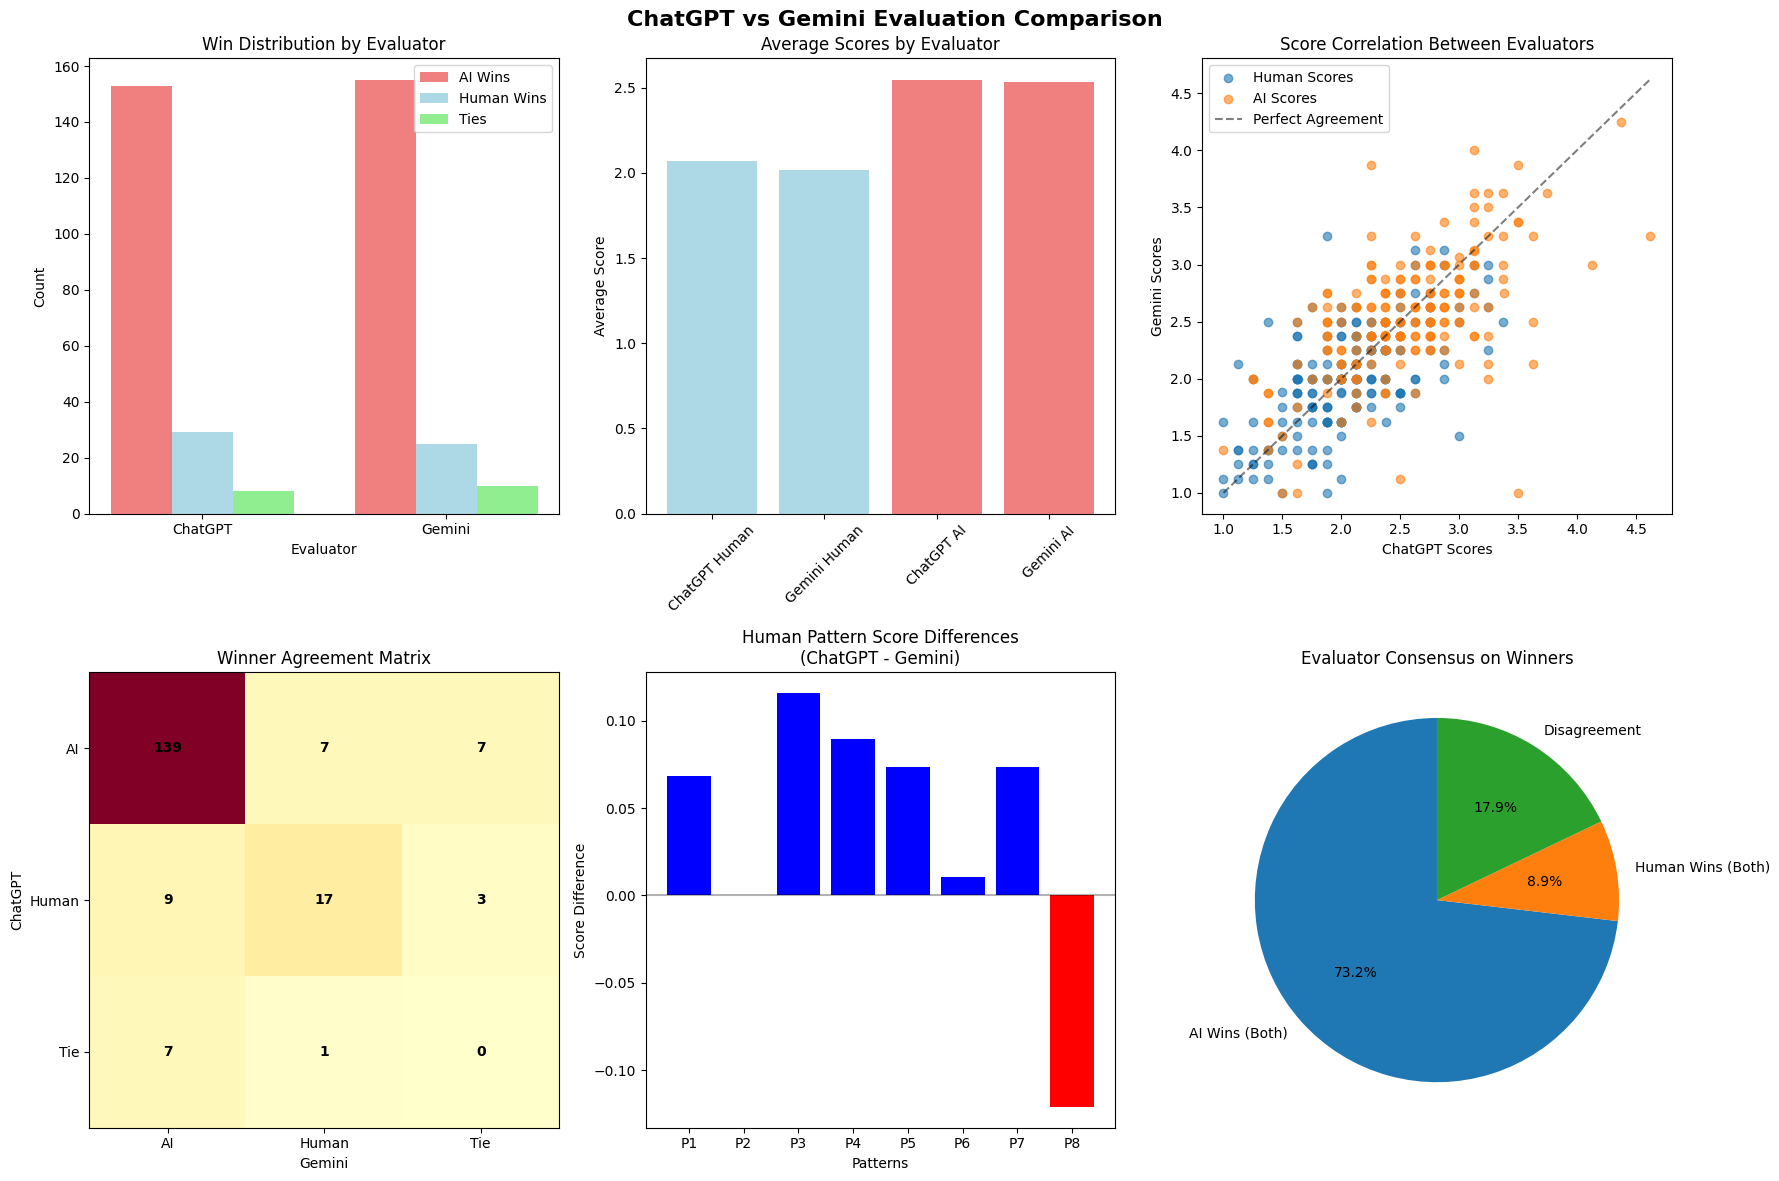


ANALYSIS COMPLETE!
Generated files:
  - evaluator_comparison_analysis.png
  - evaluator_comparison_results.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import cohen_kappa_score
import chardet
import warnings
warnings.filterwarnings('ignore')

def detect_encoding(file_path):
    """
    Detect the encoding of a file
    """
    with open(file_path, 'rb') as file:
        raw_data = file.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']
        confidence = result['confidence']
        print(f"Detected encoding: {encoding} (confidence: {confidence:.2f})")
        return encoding

def load_csv_with_encoding(file_path, encoding=None):
    """
    Load CSV file with automatic encoding detection
    """
    if encoding is None:
        encoding = detect_encoding(file_path)

    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully loaded {file_path} with {encoding} encoding")
        return df
    except UnicodeDecodeError as e:
        print(f"Failed to load with {encoding}: {e}")
        # Try common encodings
        common_encodings = ['latin1', 'iso-8859-1', 'cp1252', 'windows-1252', 'utf-16']
        for enc in common_encodings:
            try:
                df = pd.read_csv(file_path, encoding=enc)
                print(f"Successfully loaded with {enc} encoding")
                return df
            except UnicodeDecodeError:
                continue

        # If all else fails, try with error handling
        print("Trying with error handling...")
        df = pd.read_csv(file_path, encoding=encoding, errors='replace')
        return df

def load_and_prepare_data(chatgpt_csv, gemini_csv):
    """
    Load both CSV files and prepare for comparative analysis
    """
    print("Loading ChatGPT analysis file...")
    df_chatgpt = load_csv_with_encoding(chatgpt_csv)

    print("\nLoading Gemini analysis file...")
    df_gemini = load_csv_with_encoding(gemini_csv)

    # Add evaluator identifier
    df_chatgpt['evaluator'] = 'ChatGPT'
    df_gemini['evaluator'] = 'Gemini'

    # Check column names to ensure they match
    print(f"\nChatGPT columns: {df_chatgpt.columns.tolist()}")
    print(f"Gemini columns: {df_gemini.columns.tolist()}")

    # Ensure both have the same PostIds for alignment
    common_posts = set(df_chatgpt['PostId']).intersection(set(df_gemini['PostId']))
    df_chatgpt_common = df_chatgpt[df_chatgpt['PostId'].isin(common_posts)].copy()
    df_gemini_common = df_gemini[df_gemini['PostId'].isin(common_posts)].copy()

    print(f"Total ChatGPT posts: {len(df_chatgpt)}")
    print(f"Total Gemini posts: {len(df_gemini)}")
    print(f"Common posts for comparison: {len(common_posts)}")

    return df_chatgpt_common, df_gemini_common

def comparative_analysis(df_chatgpt, df_gemini):
    """
    Comprehensive comparative analysis between two evaluators
    """
    print("=" * 70)
    print("COMPARATIVE ANALYSIS: ChatGPT vs Gemini EVALUATION")
    print("=" * 70)

    # Combine data for some analyses
    df_combined = pd.concat([df_chatgpt, df_gemini], ignore_index=True)

    # 1. Basic comparison between evaluators
    print("\n1. EVALUATOR COMPARISON:")
    print("-" * 40)

    for evaluator, df in [('ChatGPT', df_chatgpt), ('Gemini', df_gemini)]:
        win_counts = df['winner'].value_counts()
        total = len(df)
        print(f"\n{evaluator} Evaluation:")
        print(f"  AI wins: {win_counts.get('AI', 0)} ({win_counts.get('AI', 0)/total*100:.1f}%)")
        print(f"  Human wins: {win_counts.get('Human', 0)} ({win_counts.get('Human', 0)/total*100:.1f}%)")
        print(f"  Ties: {win_counts.get('Tie', 0)} ({win_counts.get('Tie', 0)/total*100:.1f}%)")
        print(f"  Avg Human Score: {df['human_average_score'].mean():.3f}")
        print(f"  Avg AI Score: {df['ai_average_score'].mean():.3f}")

    # 2. Agreement analysis
    print(f"\n2. EVALUATOR AGREEMENT ANALYSIS:")
    print("-" * 40)

    # Merge on PostId to compare evaluations for same posts
    comparison_df = pd.merge(
        df_chatgpt[['PostId', 'winner', 'human_average_score', 'ai_average_score']],
        df_gemini[['PostId', 'winner', 'human_average_score', 'ai_average_score']],
        on='PostId',
        suffixes=('_chatgpt', '_gemini')
    )

    # Winner agreement
    winner_agreement = (comparison_df['winner_chatgpt'] == comparison_df['winner_gemini']).mean()
    print(f"Winner agreement: {winner_agreement*100:.1f}%")

    # Cohen's kappa for winner classification
    try:
        kappa = cohen_kappa_score(comparison_df['winner_chatgpt'], comparison_df['winner_gemini'])
        print(f"Cohen's Kappa (winner agreement): {kappa:.3f}")
    except Exception as e:
        print(f"Cohen's Kappa calculation failed: {e}")

    # Score correlation
    human_score_corr = comparison_df['human_average_score_chatgpt'].corr(comparison_df['human_average_score_gemini'])
    ai_score_corr = comparison_df['ai_average_score_chatgpt'].corr(comparison_df['ai_average_score_gemini'])
    print(f"Human score correlation: {human_score_corr:.3f}")
    print(f"AI score correlation: {ai_score_corr:.3f}")

    # 3. Evaluator bias analysis
    print(f"\n3. EVALUATOR BIAS ANALYSIS:")
    print("-" * 40)

    # Scoring leniency
    chatgpt_human_avg = df_chatgpt['human_average_score'].mean()
    gemini_human_avg = df_gemini['human_average_score'].mean()
    chatgpt_ai_avg = df_chatgpt['ai_average_score'].mean()
    gemini_ai_avg = df_gemini['ai_average_score'].mean()

    print(f"ChatGPT vs Gemini Human score difference: {chatgpt_human_avg - gemini_human_avg:.3f}")
    print(f"ChatGPT vs Gemini AI score difference: {chatgpt_ai_avg - gemini_ai_avg:.3f}")

    # Statistical tests for bias
    t_stat_human, p_val_human = stats.ttest_ind(
        df_chatgpt['human_average_score'],
        df_gemini['human_average_score']
    )
    t_stat_ai, p_val_ai = stats.ttest_ind(
        df_chatgpt['ai_average_score'],
        df_gemini['ai_average_score']
    )

    print(f"\nHuman score T-test: t={t_stat_human:.3f}, p={p_val_human:.3f}")
    print(f"AI score T-test: t={t_stat_ai:.3f}, p={p_val_ai:.3f}")

    # 4. Consensus analysis
    print(f"\n4. CONSENSUS AND DISAGREEMENT ANALYSIS:")
    print("-" * 40)

    # Cases with different winners
    different_winners = comparison_df[comparison_df['winner_chatgpt'] != comparison_df['winner_gemini']]
    print(f"Posts with different winners: {len(different_winners)} ({len(different_winners)/len(comparison_df)*100:.1f}%)")

    if len(different_winners) > 0:
        print("\nDisagreement patterns:")
        for _, row in different_winners.head().iterrows():
            print(f"  Post {row['PostId']}: ChatGPT={row['winner_chatgpt']}, Gemini={row['winner_gemini']}")

    # 5. Pattern-wise evaluator comparison
    print(f"\n5. PATTERN-WISE EVALUATOR COMPARISON:")
    print("-" * 40)

    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    print("\nHuman Pattern Score Differences (ChatGPT - Gemini):")
    for pattern in human_patterns:
        if pattern in df_chatgpt.columns and pattern in df_gemini.columns:
            chatgpt_mean = df_chatgpt[pattern].mean()
            gemini_mean = df_gemini[pattern].mean()
            diff = chatgpt_mean - gemini_mean
            print(f"  {pattern}: {diff:+.3f}")

    print("\nAI Pattern Score Differences (ChatGPT - Gemini):")
    for pattern in ai_patterns:
        if pattern in df_chatgpt.columns and pattern in df_gemini.columns:
            chatgpt_mean = df_chatgpt[pattern].mean()
            gemini_mean = df_gemini[pattern].mean()
            diff = chatgpt_mean - gemini_mean
            print(f"  {pattern}: {diff:+.3f}")

    # 6. Robust conclusion analysis
    print(f"\n6. ROBUSTNESS OF CONCLUSIONS:")
    print("-" * 40)

    # Posts where both agree AI wins
    ai_wins_both = comparison_df[
        (comparison_df['winner_chatgpt'] == 'AI') &
        (comparison_df['winner_gemini'] == 'AI')
    ]

    # Posts where both agree Human wins
    human_wins_both = comparison_df[
        (comparison_df['winner_chatgpt'] == 'Human') &
        (comparison_df['winner_gemini'] == 'Human')
    ]

    print(f"Strong AI wins (both agree): {len(ai_wins_both)} ({len(ai_wins_both)/len(comparison_df)*100:.1f}%)")
    print(f"Strong Human wins (both agree): {len(human_wins_both)} ({len(human_wins_both)/len(comparison_df)*100:.1f}%)")
    print(f"Disputed/Unclear: {len(comparison_df) - len(ai_wins_both) - len(human_wins_both)} ({(len(comparison_df) - len(ai_wins_both) - len(human_wins_both))/len(comparison_df)*100:.1f}%)")

    return comparison_df, df_combined

def create_comparative_visualizations(df_chatgpt, df_gemini, comparison_df):
    """
    Create visualizations for comparative analysis
    """
    # Create main comparison figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('ChatGPT vs Gemini Evaluation Comparison', fontsize=16, fontweight='bold')

    # 1. Win distribution comparison
    evaluators = ['ChatGPT', 'Gemini']
    ai_wins = [df_chatgpt['winner'].value_counts().get('AI', 0),
               df_gemini['winner'].value_counts().get('AI', 0)]
    human_wins = [df_chatgpt['winner'].value_counts().get('Human', 0),
                  df_gemini['winner'].value_counts().get('Human', 0)]
    ties = [df_chatgpt['winner'].value_counts().get('Tie', 0),
            df_gemini['winner'].value_counts().get('Tie', 0)]

    x = np.arange(len(evaluators))
    width = 0.25

    axes[0, 0].bar(x - width, ai_wins, width, label='AI Wins', color='lightcoral')
    axes[0, 0].bar(x, human_wins, width, label='Human Wins', color='lightblue')
    axes[0, 0].bar(x + width, ties, width, label='Ties', color='lightgreen')
    axes[0, 0].set_title('Win Distribution by Evaluator')
    axes[0, 0].set_xlabel('Evaluator')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(evaluators)
    axes[0, 0].legend()

    # 2. Average scores comparison
    scores_data = {
        'ChatGPT Human': df_chatgpt['human_average_score'].mean(),
        'Gemini Human': df_gemini['human_average_score'].mean(),
        'ChatGPT AI': df_chatgpt['ai_average_score'].mean(),
        'Gemini AI': df_gemini['ai_average_score'].mean()
    }

    axes[0, 1].bar(scores_data.keys(), scores_data.values(), color=['lightblue', 'lightblue', 'lightcoral', 'lightcoral'])
    axes[0, 1].set_title('Average Scores by Evaluator')
    axes[0, 1].set_ylabel('Average Score')
    plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45)

    # 3. Score correlation scatter plot
    axes[0, 2].scatter(comparison_df['human_average_score_chatgpt'],
                      comparison_df['human_average_score_gemini'],
                      alpha=0.6, label='Human Scores')
    axes[0, 2].scatter(comparison_df['ai_average_score_chatgpt'],
                      comparison_df['ai_average_score_gemini'],
                      alpha=0.6, label='AI Scores')

    # Add perfect agreement line
    min_score = min(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini']].min().min(),
                   comparison_df[['ai_average_score_chatgpt', 'ai_average_score_gemini']].min().min())
    max_score = max(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini']].max().max(),
                   comparison_df[['ai_average_score_chatgpt', 'ai_average_score_gemini']].max().max())

    axes[0, 2].plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.5, label='Perfect Agreement')
    axes[0, 2].set_xlabel('ChatGPT Scores')
    axes[0, 2].set_ylabel('Gemini Scores')
    axes[0, 2].set_title('Score Correlation Between Evaluators')
    axes[0, 2].legend()

    # 4. Agreement matrix
    winner_categories = ['AI', 'Human', 'Tie']
    agreement_matrix = pd.crosstab(comparison_df['winner_chatgpt'],
                                  comparison_df['winner_gemini'])

    im = axes[1, 0].imshow(agreement_matrix.values, cmap='YlOrRd', aspect='auto')
    axes[1, 0].set_xticks(np.arange(len(winner_categories)))
    axes[1, 0].set_yticks(np.arange(len(winner_categories)))
    axes[1, 0].set_xticklabels(winner_categories)
    axes[1, 0].set_yticklabels(winner_categories)
    axes[1, 0].set_xlabel('Gemini')
    axes[1, 0].set_ylabel('ChatGPT')
    axes[1, 0].set_title('Winner Agreement Matrix')

    # Add text annotations
    for i in range(len(winner_categories)):
        for j in range(len(winner_categories)):
            text = agreement_matrix.iloc[i, j] if i < len(agreement_matrix.index) and j < len(agreement_matrix.columns) else 0
            axes[1, 0].text(j, i, text, ha="center", va="center", color="black", fontweight='bold')

    # 5. Pattern score differences
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    pattern_diffs = []
    for pattern in human_patterns:
        if pattern in df_chatgpt.columns and pattern in df_gemini.columns:
            diff = df_chatgpt[pattern].mean() - df_gemini[pattern].mean()
            pattern_diffs.append(diff)

    patterns_short = [f'P{i}' for i in range(1, len(pattern_diffs) + 1)]
    axes[1, 1].bar(patterns_short, pattern_diffs, color=['red' if x < 0 else 'blue' for x in pattern_diffs])
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 1].set_title('Human Pattern Score Differences\n(ChatGPT - Gemini)')
    axes[1, 1].set_xlabel('Patterns')
    axes[1, 1].set_ylabel('Score Difference')

    # 6. Consensus analysis
    consensus_labels = ['AI Wins (Both)', 'Human Wins (Both)', 'Disagreement']
    ai_wins_both = len(comparison_df[(comparison_df['winner_chatgpt'] == 'AI') & (comparison_df['winner_gemini'] == 'AI')])
    human_wins_both = len(comparison_df[(comparison_df['winner_chatgpt'] == 'Human') & (comparison_df['winner_gemini'] == 'Human')])
    disagreement = len(comparison_df) - ai_wins_both - human_wins_both

    consensus_counts = [ai_wins_both, human_wins_both, disagreement]

    axes[1, 2].pie(consensus_counts, labels=consensus_labels, autopct='%1.1f%%', startangle=90)
    axes[1, 2].set_title('Evaluator Consensus on Winners')

    plt.tight_layout()
    plt.savefig('evaluator_comparison_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Quick encoding test function
def test_encodings():
    """
    Test different encodings to find the right one
    """
    file_path = "/content/Gemini.csv"  # Change to your problematic file

    encodings_to_try = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252', 'windows-1252', 'utf-16']

    for encoding in encodings_to_try:
        try:
            df = pd.read_csv(file_path, encoding=encoding, nrows=5)
            print(f"✓ {encoding} works! First few rows loaded successfully.")
            print(f"  Columns: {df.columns.tolist()}")
            return encoding
        except Exception as e:
            print(f"✗ {encoding} failed: {str(e)[:50]}...")

    return None

# Main execution
if __name__ == "__main__":
    # First, let's test encodings
    print("Testing file encodings...")
    test_encodings()

    # Replace with your actual CSV file paths
    chatgpt_csv_path = "/content/ChatGPT.csv"  # Change this
    gemini_csv_path = "/content/Gemini.csv"    # Change this

    try:
        # Load data
        df_chatgpt, df_gemini = load_and_prepare_data(chatgpt_csv_path, gemini_csv_path)

        # Perform comparative analysis
        comparison_df, df_combined = comparative_analysis(df_chatgpt, df_gemini)

        # Create visualizations
        create_comparative_visualizations(df_chatgpt, df_gemini, comparison_df)

        # Save comparison results
        comparison_df.to_csv('evaluator_comparison_results.csv', index=False)

        print(f"\n" + "="*70)
        print("ANALYSIS COMPLETE!")
        print("Generated files:")
        print("  - evaluator_comparison_analysis.png")
        print("  - evaluator_comparison_results.csv")
        print("="*70)

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("\nTroubleshooting tips:")
        print("1. Check if the file paths are correct")
        print("2. Try opening the CSV in a text editor to check its format")
        print("3. The file might be corrupted or in a different format")
        print("4. Try saving the CSV as UTF-8 from Excel or another program")

ChatGPT evaluations: 190 posts
Gemini evaluations: 190 posts
Common posts for comparison: 190
COMPARATIVE ANALYSIS: ChatGPT vs Gemini EVALUATION

1. EVALUATOR COMPARISON:
----------------------------------------

ChatGPT Evaluation:
  AI wins: 153 (80.5%)
  Human wins: 29 (15.3%)
  Ties: 8 (4.2%)
  Avg Human Score: 2.067
  Avg AI Score: 2.546

Gemini Evaluation:
  AI wins: 155 (81.6%)
  Human wins: 25 (13.2%)
  Ties: 10 (5.3%)
  Avg Human Score: 2.020
  Avg AI Score: 2.534

2. EVALUATOR AGREEMENT ANALYSIS:
----------------------------------------
Winner agreement: 82.1%
Cohen's Kappa (winner agreement): 0.442
Human score correlation: 0.644
AI score correlation: 0.604

3. EVALUATOR BIAS ANALYSIS:
----------------------------------------
ChatGPT vs Gemini Human score difference: 0.048
ChatGPT vs Gemini AI score difference: 0.012

Human score T-test: t=0.962, p=0.336
AI score T-test: t=0.200, p=0.842

4. CONSENSUS AND DISAGREEMENT ANALYSIS:
----------------------------------------
Posts w

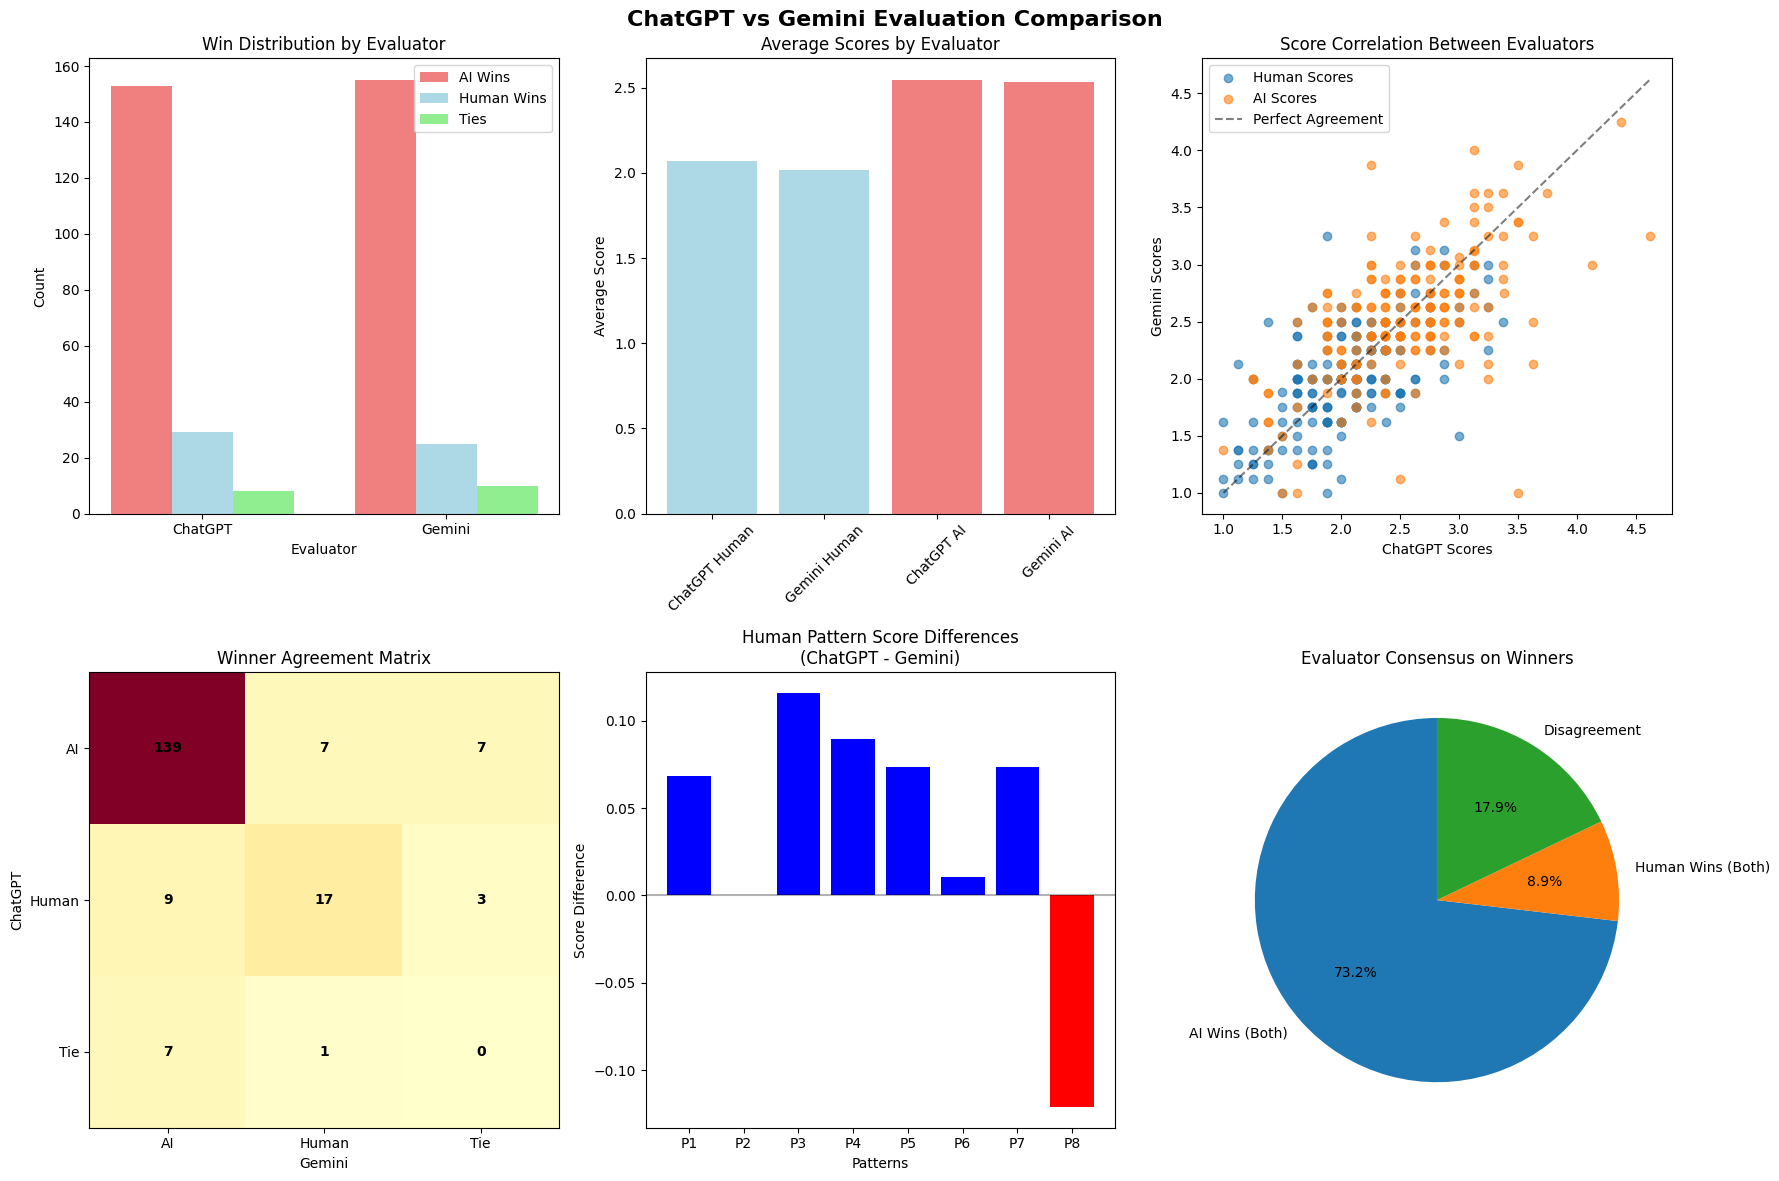

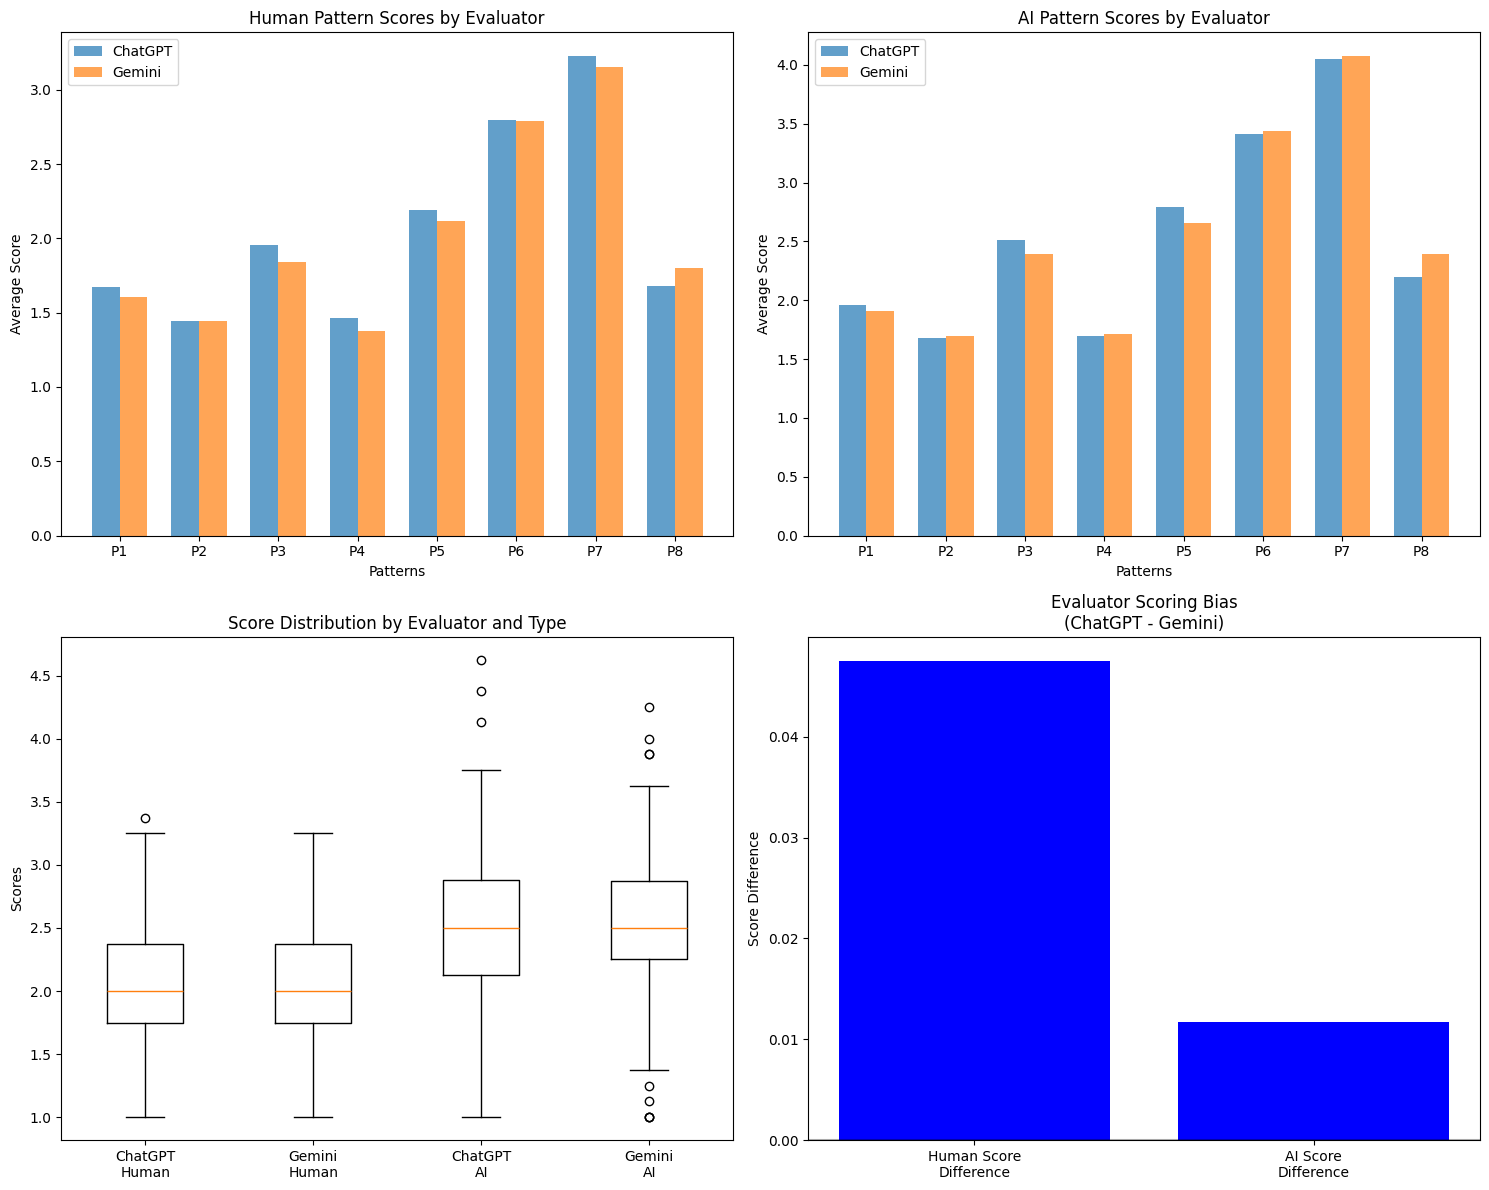


ANALYSIS COMPLETE!
Generated files:
  - evaluator_comparison_analysis.png
  - detailed_pattern_analysis.png
  - evaluator_comparison_results.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

def load_and_prepare_data(chatgpt_csv, gemini_csv):
    """
    Load both CSV files and prepare for comparative analysis
    """
    df_chatgpt = pd.read_csv(chatgpt_csv)
    df_gemini = pd.read_csv(gemini_csv)

    # Add evaluator identifier
    df_chatgpt['evaluator'] = 'ChatGPT'
    df_gemini['evaluator'] = 'Gemini'

    # Ensure both have the same PostIds for alignment
    common_posts = set(df_chatgpt['PostId']).intersection(set(df_gemini['PostId']))
    df_chatgpt = df_chatgpt[df_chatgpt['PostId'].isin(common_posts)]
    df_gemini = df_gemini[df_gemini['PostId'].isin(common_posts)]

    return df_chatgpt, df_gemini

def comparative_analysis(df_chatgpt, df_gemini):
    """
    Comprehensive comparative analysis between two evaluators
    """
    print("=" * 70)
    print("COMPARATIVE ANALYSIS: ChatGPT vs Gemini EVALUATION")
    print("=" * 70)

    # Combine data for some analyses
    df_combined = pd.concat([df_chatgpt, df_gemini], ignore_index=True)

    # 1. Basic comparison between evaluators
    print("\n1. EVALUATOR COMPARISON:")
    print("-" * 40)

    for evaluator, df in [('ChatGPT', df_chatgpt), ('Gemini', df_gemini)]:
        win_counts = df['winner'].value_counts()
        total = len(df)
        print(f"\n{evaluator} Evaluation:")
        print(f"  AI wins: {win_counts.get('AI', 0)} ({win_counts.get('AI', 0)/total*100:.1f}%)")
        print(f"  Human wins: {win_counts.get('Human', 0)} ({win_counts.get('Human', 0)/total*100:.1f}%)")
        print(f"  Ties: {win_counts.get('Tie', 0)} ({win_counts.get('Tie', 0)/total*100:.1f}%)")
        print(f"  Avg Human Score: {df['human_average_score'].mean():.3f}")
        print(f"  Avg AI Score: {df['ai_average_score'].mean():.3f}")

    # 2. Agreement analysis
    print(f"\n2. EVALUATOR AGREEMENT ANALYSIS:")
    print("-" * 40)

    # Merge on PostId to compare evaluations for same posts
    comparison_df = pd.merge(
        df_chatgpt[['PostId', 'winner', 'human_average_score', 'ai_average_score']],
        df_gemini[['PostId', 'winner', 'human_average_score', 'ai_average_score']],
        on='PostId',
        suffixes=('_chatgpt', '_gemini')
    )

    # Winner agreement
    winner_agreement = (comparison_df['winner_chatgpt'] == comparison_df['winner_gemini']).mean()
    print(f"Winner agreement: {winner_agreement*100:.1f}%")

    # Cohen's kappa for winner classification
    kappa = cohen_kappa_score(comparison_df['winner_chatgpt'], comparison_df['winner_gemini'])
    print(f"Cohen's Kappa (winner agreement): {kappa:.3f}")

    # Score correlation
    human_score_corr = comparison_df['human_average_score_chatgpt'].corr(comparison_df['human_average_score_gemini'])
    ai_score_corr = comparison_df['ai_average_score_chatgpt'].corr(comparison_df['ai_average_score_gemini'])
    print(f"Human score correlation: {human_score_corr:.3f}")
    print(f"AI score correlation: {ai_score_corr:.3f}")

    # 3. Evaluator bias analysis
    print(f"\n3. EVALUATOR BIAS ANALYSIS:")
    print("-" * 40)

    # Scoring leniency
    chatgpt_human_avg = df_chatgpt['human_average_score'].mean()
    gemini_human_avg = df_gemini['human_average_score'].mean()
    chatgpt_ai_avg = df_chatgpt['ai_average_score'].mean()
    gemini_ai_avg = df_gemini['ai_average_score'].mean()

    print(f"ChatGPT vs Gemini Human score difference: {chatgpt_human_avg - gemini_human_avg:.3f}")
    print(f"ChatGPT vs Gemini AI score difference: {chatgpt_ai_avg - gemini_ai_avg:.3f}")

    # Statistical tests for bias
    t_stat_human, p_val_human = stats.ttest_ind(
        df_chatgpt['human_average_score'],
        df_gemini['human_average_score']
    )
    t_stat_ai, p_val_ai = stats.ttest_ind(
        df_chatgpt['ai_average_score'],
        df_gemini['ai_average_score']
    )

    print(f"\nHuman score T-test: t={t_stat_human:.3f}, p={p_val_human:.3f}")
    print(f"AI score T-test: t={t_stat_ai:.3f}, p={p_val_ai:.3f}")

    # 4. Consensus analysis
    print(f"\n4. CONSENSUS AND DISAGREEMENT ANALYSIS:")
    print("-" * 40)

    # Cases with different winners
    different_winners = comparison_df[comparison_df['winner_chatgpt'] != comparison_df['winner_gemini']]
    print(f"Posts with different winners: {len(different_winners)} ({len(different_winners)/len(comparison_df)*100:.1f}%)")

    if len(different_winners) > 0:
        print("\nDisagreement patterns:")
        for _, row in different_winners.head().iterrows():
            print(f"  Post {row['PostId']}: ChatGPT={row['winner_chatgpt']}, Gemini={row['winner_gemini']}")

    # 5. Pattern-wise evaluator comparison
    print(f"\n5. PATTERN-WISE EVALUATOR COMPARISON:")
    print("-" * 40)

    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    print("\nHuman Pattern Score Differences (ChatGPT - Gemini):")
    for pattern in human_patterns:
        chatgpt_mean = df_chatgpt[pattern].mean()
        gemini_mean = df_gemini[pattern].mean()
        diff = chatgpt_mean - gemini_mean
        print(f"  {pattern}: {diff:+.3f}")

    print("\nAI Pattern Score Differences (ChatGPT - Gemini):")
    for pattern in ai_patterns:
        chatgpt_mean = df_chatgpt[pattern].mean()
        gemini_mean = df_gemini[pattern].mean()
        diff = chatgpt_mean - gemini_mean
        print(f"  {pattern}: {diff:+.3f}")

    # 6. Robust conclusion analysis
    print(f"\n6. ROBUSTNESS OF CONCLUSIONS:")
    print("-" * 40)

    # Posts where both agree AI wins
    ai_wins_both = comparison_df[
        (comparison_df['winner_chatgpt'] == 'AI') &
        (comparison_df['winner_gemini'] == 'AI')
    ]

    # Posts where both agree Human wins
    human_wins_both = comparison_df[
        (comparison_df['winner_chatgpt'] == 'Human') &
        (comparison_df['winner_gemini'] == 'Human')
    ]

    print(f"Strong AI wins (both agree): {len(ai_wins_both)} ({len(ai_wins_both)/len(comparison_df)*100:.1f}%)")
    print(f"Strong Human wins (both agree): {len(human_wins_both)} ({len(human_wins_both)/len(comparison_df)*100:.1f}%)")
    print(f"Disputed/Unclear: {len(comparison_df) - len(ai_wins_both) - len(human_wins_both)} ({(len(comparison_df) - len(ai_wins_both) - len(human_wins_both))/len(comparison_df)*100:.1f}%)")

    return comparison_df, df_combined

def create_comparative_visualizations(df_chatgpt, df_gemini, comparison_df):
    """
    Create visualizations for comparative analysis
    """
    # Create main comparison figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('ChatGPT vs Gemini Evaluation Comparison', fontsize=16, fontweight='bold')

    # 1. Win distribution comparison
    evaluators = ['ChatGPT', 'Gemini']
    ai_wins = [df_chatgpt['winner'].value_counts().get('AI', 0),
               df_gemini['winner'].value_counts().get('AI', 0)]
    human_wins = [df_chatgpt['winner'].value_counts().get('Human', 0),
                  df_gemini['winner'].value_counts().get('Human', 0)]
    ties = [df_chatgpt['winner'].value_counts().get('Tie', 0),
            df_gemini['winner'].value_counts().get('Tie', 0)]

    x = np.arange(len(evaluators))
    width = 0.25

    axes[0, 0].bar(x - width, ai_wins, width, label='AI Wins', color='lightcoral')
    axes[0, 0].bar(x, human_wins, width, label='Human Wins', color='lightblue')
    axes[0, 0].bar(x + width, ties, width, label='Ties', color='lightgreen')
    axes[0, 0].set_title('Win Distribution by Evaluator')
    axes[0, 0].set_xlabel('Evaluator')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(evaluators)
    axes[0, 0].legend()

    # 2. Average scores comparison
    scores_data = {
        'ChatGPT Human': df_chatgpt['human_average_score'].mean(),
        'Gemini Human': df_gemini['human_average_score'].mean(),
        'ChatGPT AI': df_chatgpt['ai_average_score'].mean(),
        'Gemini AI': df_gemini['ai_average_score'].mean()
    }

    axes[0, 1].bar(scores_data.keys(), scores_data.values(), color=['lightblue', 'lightblue', 'lightcoral', 'lightcoral'])
    axes[0, 1].set_title('Average Scores by Evaluator')
    axes[0, 1].set_ylabel('Average Score')
    plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45)

    # 3. Score correlation scatter plot
    axes[0, 2].scatter(comparison_df['human_average_score_chatgpt'],
                      comparison_df['human_average_score_gemini'],
                      alpha=0.6, label='Human Scores')
    axes[0, 2].scatter(comparison_df['ai_average_score_chatgpt'],
                      comparison_df['ai_average_score_gemini'],
                      alpha=0.6, label='AI Scores')

    # Add perfect agreement line
    min_score = min(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini']].min().min(),
                   comparison_df[['ai_average_score_chatgpt', 'ai_average_score_gemini']].min().min())
    max_score = max(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini']].max().max(),
                   comparison_df[['ai_average_score_chatgpt', 'ai_average_score_gemini']].max().max())

    axes[0, 2].plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.5, label='Perfect Agreement')
    axes[0, 2].set_xlabel('ChatGPT Scores')
    axes[0, 2].set_ylabel('Gemini Scores')
    axes[0, 2].set_title('Score Correlation Between Evaluators')
    axes[0, 2].legend()

    # 4. Agreement matrix
    winner_categories = ['AI', 'Human', 'Tie']
    agreement_matrix = pd.crosstab(comparison_df['winner_chatgpt'],
                                  comparison_df['winner_gemini'])

    im = axes[1, 0].imshow(agreement_matrix.values, cmap='YlOrRd', aspect='auto')
    axes[1, 0].set_xticks(np.arange(len(winner_categories)))
    axes[1, 0].set_yticks(np.arange(len(winner_categories)))
    axes[1, 0].set_xticklabels(winner_categories)
    axes[1, 0].set_yticklabels(winner_categories)
    axes[1, 0].set_xlabel('Gemini')
    axes[1, 0].set_ylabel('ChatGPT')
    axes[1, 0].set_title('Winner Agreement Matrix')

    # Add text annotations
    for i in range(len(winner_categories)):
        for j in range(len(winner_categories)):
            axes[1, 0].text(j, i, agreement_matrix.iloc[i, j],
                           ha="center", va="center", color="black", fontweight='bold')

    # 5. Pattern score differences
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    pattern_diffs = []
    for pattern in human_patterns:
        diff = df_chatgpt[pattern].mean() - df_gemini[pattern].mean()
        pattern_diffs.append(diff)

    patterns_short = [f'P{i}' for i in range(1, 9)]
    axes[1, 1].bar(patterns_short, pattern_diffs, color=['red' if x < 0 else 'blue' for x in pattern_diffs])
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 1].set_title('Human Pattern Score Differences\n(ChatGPT - Gemini)')
    axes[1, 1].set_xlabel('Patterns')
    axes[1, 1].set_ylabel('Score Difference')

    # 6. Consensus analysis
    consensus_labels = ['AI Wins (Both)', 'Human Wins (Both)', 'Disagreement']
    consensus_counts = [
        len(comparison_df[(comparison_df['winner_chatgpt'] == 'AI') & (comparison_df['winner_gemini'] == 'AI')]),
        len(comparison_df[(comparison_df['winner_chatgpt'] == 'Human') & (comparison_df['winner_gemini'] == 'Human')]),
        len(comparison_df) - len(comparison_df[(comparison_df['winner_chatgpt'] == 'AI') & (comparison_df['winner_gemini'] == 'AI')]) -
        len(comparison_df[(comparison_df['winner_chatgpt'] == 'Human') & (comparison_df['winner_gemini'] == 'Human')])
    ]

    axes[1, 2].pie(consensus_counts, labels=consensus_labels, autopct='%1.1f%%', startangle=90)
    axes[1, 2].set_title('Evaluator Consensus on Winners')

    plt.tight_layout()
    plt.savefig('evaluator_comparison_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Additional detailed analysis
    create_detailed_pattern_analysis(df_chatgpt, df_gemini)

def create_detailed_pattern_analysis(df_chatgpt, df_gemini):
    """
    Create detailed pattern-wise analysis
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Human pattern comparison
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    patterns_short = [f'P{i}' for i in range(1, 9)]

    chatgpt_human_means = [df_chatgpt[pattern].mean() for pattern in human_patterns]
    gemini_human_means = [df_gemini[pattern].mean() for pattern in human_patterns]

    x = np.arange(len(patterns_short))
    width = 0.35

    axes[0, 0].bar(x - width/2, chatgpt_human_means, width, label='ChatGPT', alpha=0.7)
    axes[0, 0].bar(x + width/2, gemini_human_means, width, label='Gemini', alpha=0.7)
    axes[0, 0].set_title('Human Pattern Scores by Evaluator')
    axes[0, 0].set_xlabel('Patterns')
    axes[0, 0].set_ylabel('Average Score')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(patterns_short)
    axes[0, 0].legend()

    # AI pattern comparison
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]
    chatgpt_ai_means = [df_chatgpt[pattern].mean() for pattern in ai_patterns]
    gemini_ai_means = [df_gemini[pattern].mean() for pattern in ai_patterns]

    axes[0, 1].bar(x - width/2, chatgpt_ai_means, width, label='ChatGPT', alpha=0.7)
    axes[0, 1].bar(x + width/2, gemini_ai_means, width, label='Gemini', alpha=0.7)
    axes[0, 1].set_title('AI Pattern Scores by Evaluator')
    axes[0, 1].set_xlabel('Patterns')
    axes[0, 1].set_ylabel('Average Score')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(patterns_short)
    axes[0, 1].legend()

    # Evaluator scoring distribution
    axes[1, 0].boxplot([df_chatgpt['human_average_score'], df_gemini['human_average_score'],
                       df_chatgpt['ai_average_score'], df_gemini['ai_average_score']],
                      labels=['ChatGPT\nHuman', 'Gemini\nHuman', 'ChatGPT\nAI', 'Gemini\nAI'])
    axes[1, 0].set_title('Score Distribution by Evaluator and Type')
    axes[1, 0].set_ylabel('Scores')

    # Evaluator bias visualization
    bias_data = {
        'Human Score\nDifference': df_chatgpt['human_average_score'].mean() - df_gemini['human_average_score'].mean(),
        'AI Score\nDifference': df_chatgpt['ai_average_score'].mean() - df_gemini['ai_average_score'].mean()
    }

    colors = ['red' if x < 0 else 'blue' for x in bias_data.values()]
    axes[1, 1].bar(bias_data.keys(), bias_data.values(), color=colors)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 1].set_title('Evaluator Scoring Bias\n(ChatGPT - Gemini)')
    axes[1, 1].set_ylabel('Score Difference')

    plt.tight_layout()
    plt.savefig('detailed_pattern_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Replace with your actual CSV file paths
    chatgpt_csv_path = "/content/ChatGPT.csv"  # Change this
    gemini_csv_path = "/content/Gemini.csv"    # Change this

    try:
        # Load data
        df_chatgpt, df_gemini = load_and_prepare_data(chatgpt_csv_path, gemini_csv_path)

        print(f"ChatGPT evaluations: {len(df_chatgpt)} posts")
        print(f"Gemini evaluations: {len(df_gemini)} posts")
        print(f"Common posts for comparison: {len(set(df_chatgpt['PostId']).intersection(set(df_gemini['PostId'])))}")

        # Perform comparative analysis
        comparison_df, df_combined = comparative_analysis(df_chatgpt, df_gemini)

        # Create visualizations
        create_comparative_visualizations(df_chatgpt, df_gemini, comparison_df)

        # Save comparison results
        comparison_df.to_csv('evaluator_comparison_results.csv', index=False)

        print(f"\n" + "="*70)
        print("ANALYSIS COMPLETE!")
        print("Generated files:")
        print("  - evaluator_comparison_analysis.png")
        print("  - detailed_pattern_analysis.png")
        print("  - evaluator_comparison_results.csv")
        print("="*70)

    except FileNotFoundError as e:
        print(f"Error: File not found - {e}")
        print("Please update the CSV file paths in the main execution section.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [10]:
# Simple encoding fix
import pandas as pd

# Try these encodings in order
encodings = ['latin1', 'iso-8859-1', 'cp1252', 'windows-1252', 'utf-8']

for encoding in encodings:
    try:
        df_chatgpt = pd.read_csv("/content/ChatGPT.csv", encoding=encoding)
        df_gemini = pd.read_csv("/content/Gemini.csv", encoding=encoding)
        print(f"Success with {encoding} encoding!")
        break
    except:
        continue
else:
    print("Could not read files with any common encoding")

Success with latin1 encoding!


#SO Date Extractor

In [3]:
import pandas as pd
import requests
import time
from datetime import datetime

def get_single_question_date(post_id):
    """
    Fetch date for a single question
    """
    url = f"https://api.stackexchange.com/2.3/questions/{post_id}"

    params = {
        'site': 'stackoverflow',
        'filter': 'withbody'
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()

        data = response.json()

        if data['items']:
            creation_date = datetime.fromtimestamp(data['items'][0]['creation_date'])
            return creation_date.strftime('%Y-%m-%d %H:%M:%S')
        else:
            print(f"No data found for PostId: {post_id}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for PostId {post_id}: {e}")
        return None

def main_simple():
    # Read the CSV file
    input_file = '/content/DL_Energy_Patterns.csv'
    output_file = '/content/DL_Energy_Patterns_With_Date.csv'

    df = pd.read_csv(input_file)

    # Add new column
    dates = []

    for i, post_id in enumerate(df['PostId']):
        print(f"Processing {i+1}/{len(df)}: PostId {post_id}")

        date = get_single_question_date(post_id)
        dates.append(date)

        # Be nice to the API - add delay between requests
        time.sleep(0.5)

    df['QuestionDate'] = dates
    df.to_csv(output_file, index=False)
    print(f"Updated CSV saved as: {output_file}")

if __name__ == "__main__":
    main_simple()

Processing 1/190: PostId 37511148
Processing 2/190: PostId 54261772
Processing 3/190: PostId 63178757
Processing 4/190: PostId 44311820
Processing 5/190: PostId 43505001
Processing 6/190: PostId 43695085
Processing 7/190: PostId 52099863
Processing 8/190: PostId 35644264
Processing 9/190: PostId 44236449
Processing 10/190: PostId 61421983
Processing 11/190: PostId 61637457
Processing 12/190: PostId 53104887
Processing 13/190: PostId 51998728
Processing 14/190: PostId 60817825
Processing 15/190: PostId 62490121
Processing 16/190: PostId 47115946
Processing 17/190: PostId 62592265
Processing 18/190: PostId 37427786
Processing 19/190: PostId 63201036
Processing 20/190: PostId 60655246
Processing 21/190: PostId 63207707
Processing 22/190: PostId 55598516
Processing 23/190: PostId 61083603
Processing 24/190: PostId 41255031
Processing 25/190: PostId 53017722
Processing 26/190: PostId 62402825
Processing 27/190: PostId 56774466
Processing 28/190: PostId 56779949
Processing 29/190: PostId 405

Data loaded successfully!
ChatGPT evaluations: 190 posts
Gemini evaluations: 190 posts
Year range: 2016 to 2021
YEARLY TREND ANALYSIS STATISTICS

ChatGPT Evaluation:
Year range: 2016 to 2021
Total years covered: 6

Yearly Performance Statistics:
             human_average_score              ai_average_score               \
                            mean    std count             mean    std count   
QuestionYear                                                                  
2016                       2.013  0.379    10            2.650  0.403    10   
2017                       2.020  0.543    44            2.438  0.555    44   
2018                       2.144  0.484    41            2.503  0.608    41   
2019                       1.972  0.505    27            2.500  0.689    27   
2020                       2.117  0.528    44            2.682  0.601    44   
2021                       2.063  0.414    24            2.573  0.576    24   

             score_difference  
          

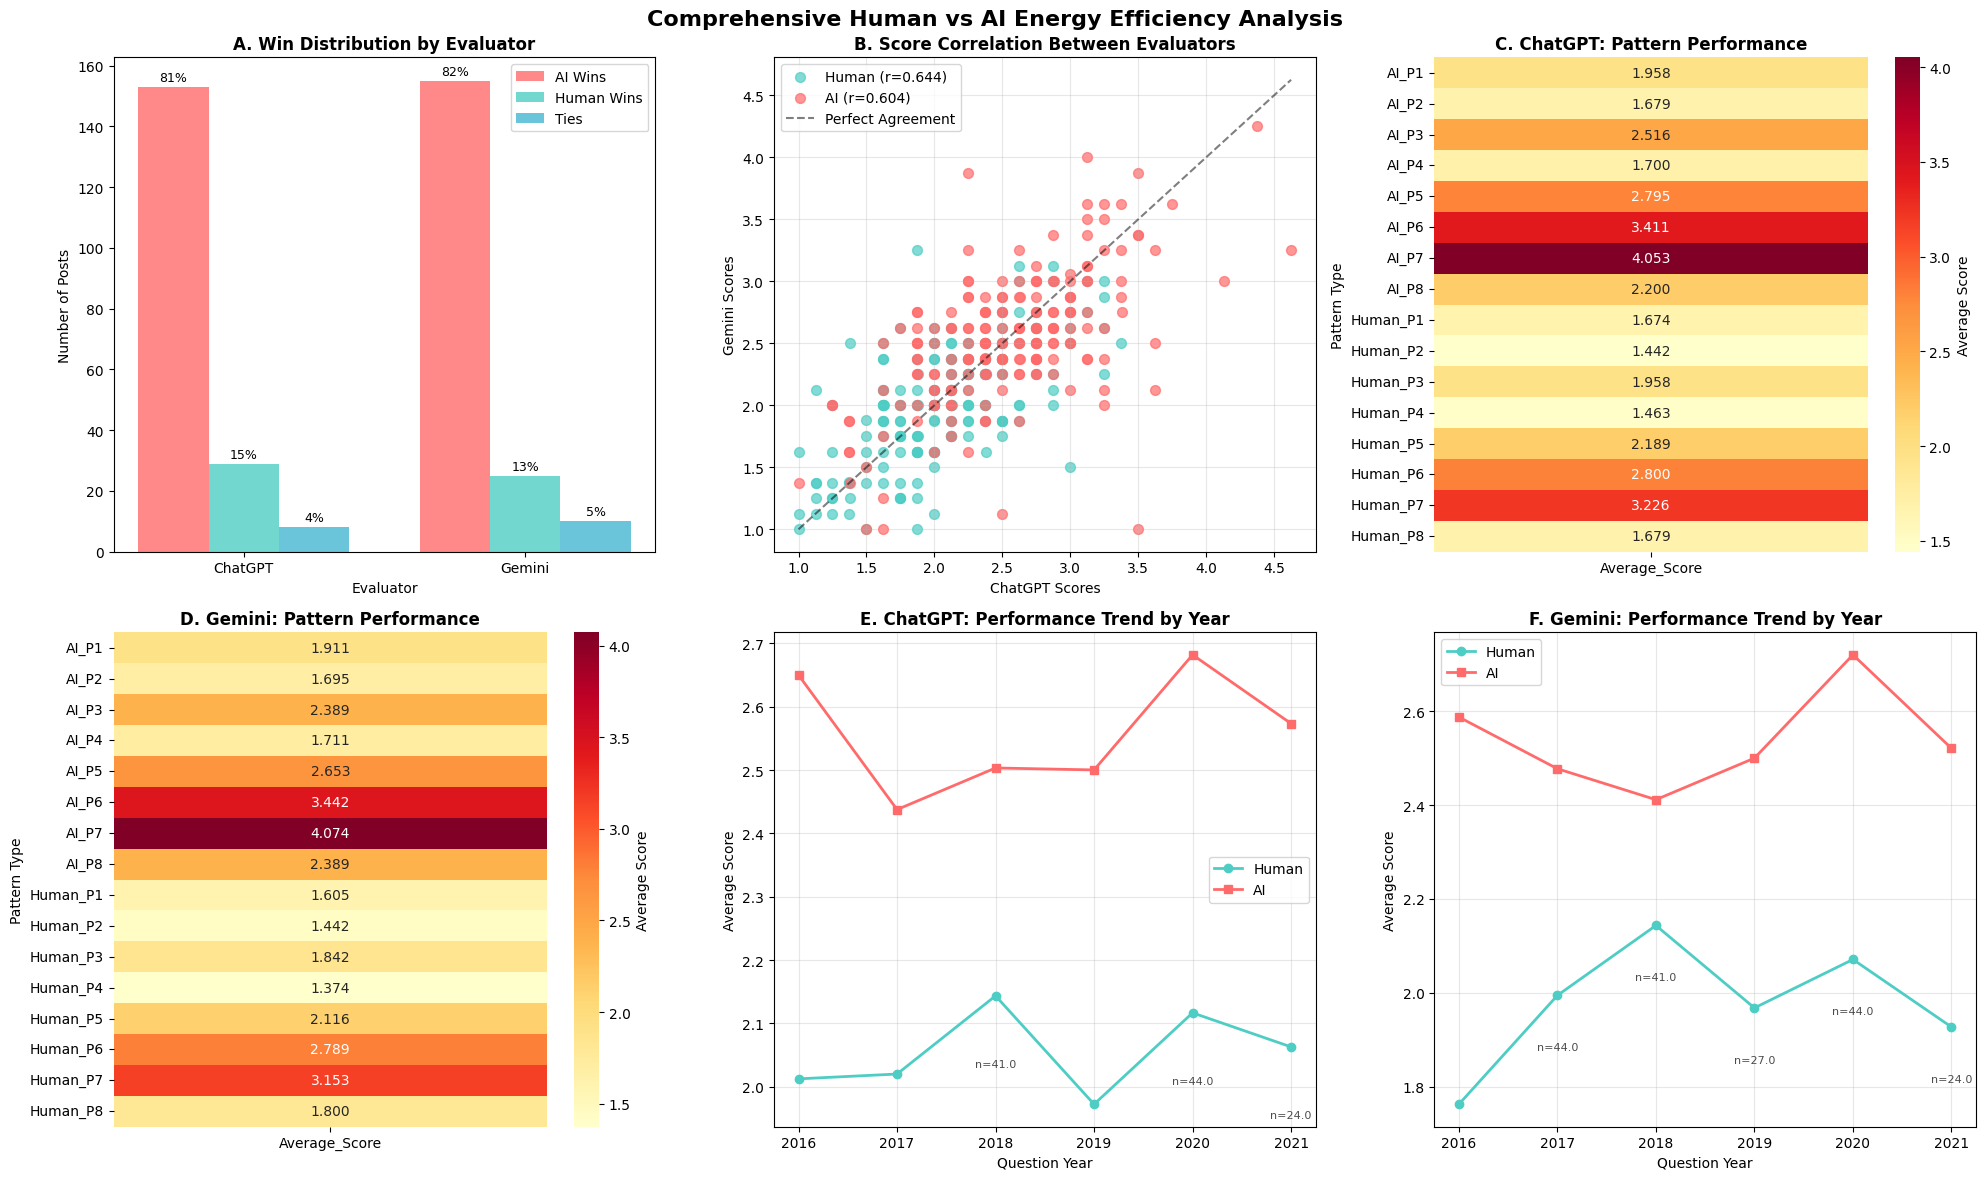


Generated 6-panel analysis: 'six_panel_analysis.png'


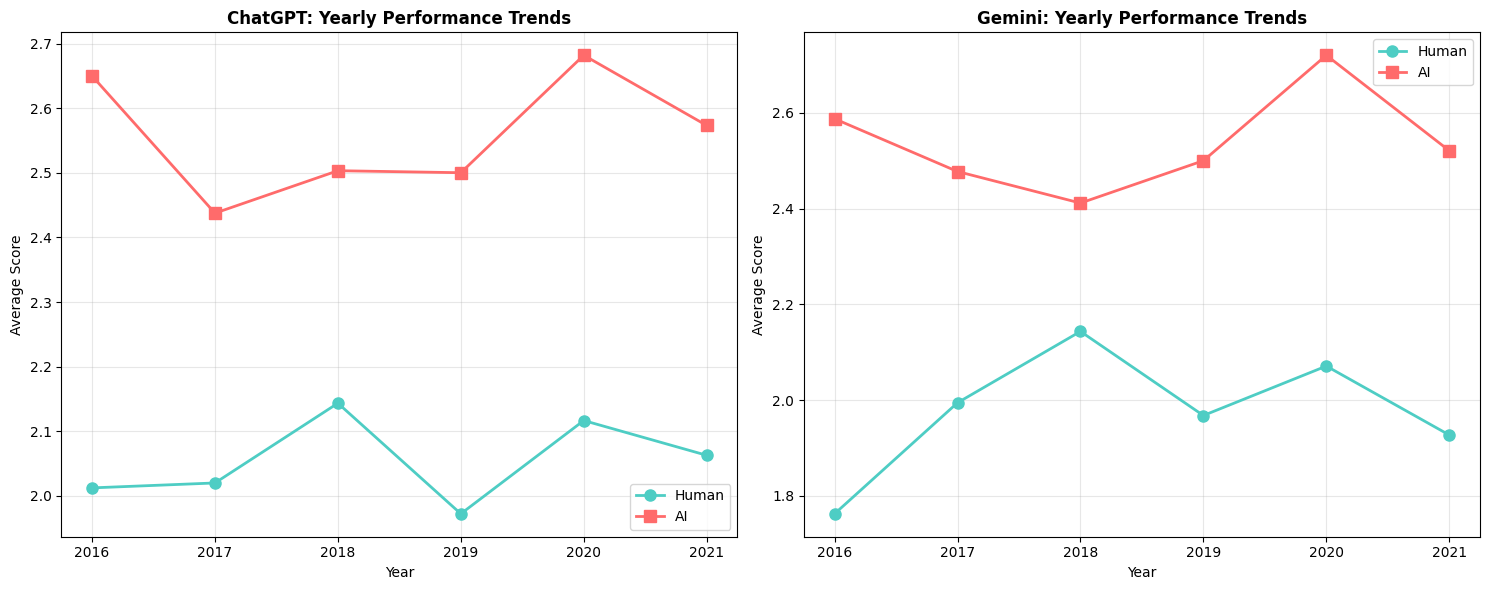

Generated yearly trend comparison: 'yearly_trend_comparison.png'

ANALYSIS COMPLETE!


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def load_data_with_dates(chatgpt_csv, gemini_csv):
    """
    Load both CSV files and process dates
    """
    df_chatgpt = pd.read_csv(chatgpt_csv)
    df_gemini = pd.read_csv(gemini_csv)

    # Add evaluator identifier
    df_chatgpt['evaluator'] = 'ChatGPT'
    df_gemini['evaluator'] = 'Gemini'

    # Convert QuestionDate to datetime and extract features
    for df in [df_chatgpt, df_gemini]:
        df['QuestionDate'] = pd.to_datetime(df['QuestionDate'])
        df['QuestionYear'] = df['QuestionDate'].dt.year
        df['QuestionAge'] = (datetime.now() - df['QuestionDate']).dt.days

    return df_chatgpt, df_gemini

def create_four_panel_analysis(df_chatgpt, df_gemini):
    """
    Create a 2x2 panel analysis with yearly line charts
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Comprehensive Human vs AI Energy Efficiency Analysis', fontsize=16, fontweight='bold')

    # 1. Win Distribution Comparison (Top Left)
    evaluators = ['ChatGPT', 'Gemini']
    ai_wins = [df_chatgpt['winner'].value_counts().get('AI', 0),
               df_gemini['winner'].value_counts().get('AI', 0)]
    human_wins = [df_chatgpt['winner'].value_counts().get('Human', 0),
                  df_gemini['winner'].value_counts().get('Human', 0)]
    ties = [df_chatgpt['winner'].value_counts().get('Tie', 0),
            df_gemini['winner'].value_counts().get('Tie', 0)]

    x = np.arange(len(evaluators))
    width = 0.25

    axes[0, 0].bar(x - width, ai_wins, width, label='AI Wins', color='#FF6B6B', alpha=0.8)
    axes[0, 0].bar(x, human_wins, width, label='Human Wins', color='#4ECDC4', alpha=0.8)
    axes[0, 0].bar(x + width, ties, width, label='Ties', color='#45B7D1', alpha=0.8)
    axes[0, 0].set_title('A. Win Distribution by Evaluator', fontweight='bold')
    axes[0, 0].set_xlabel('Evaluator')
    axes[0, 0].set_ylabel('Number of Posts')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(evaluators)
    axes[0, 0].legend()

    # Add percentage annotations
    total_chatgpt = len(df_chatgpt)
    total_gemini = len(df_gemini)
    for i, (ai, human, tie) in enumerate(zip(ai_wins, human_wins, ties)):
        axes[0, 0].text(i - width, ai + 1, f'{ai/total_chatgpt*100:.0f}%', ha='center', va='bottom', fontsize=9)
        axes[0, 0].text(i, human + 1, f'{human/total_chatgpt*100:.0f}%', ha='center', va='bottom', fontsize=9)
        axes[0, 0].text(i + width, tie + 1, f'{tie/total_chatgpt*100:.0f}%', ha='center', va='bottom', fontsize=9)

    # 2. Score Correlation Scatter Plot (Top Right)
    comparison_df = pd.merge(
        df_chatgpt[['PostId', 'human_average_score', 'ai_average_score']],
        df_gemini[['PostId', 'human_average_score', 'ai_average_score']],
        on='PostId',
        suffixes=('_chatgpt', '_gemini')
    )

    # Calculate correlation coefficients
    human_corr = comparison_df['human_average_score_chatgpt'].corr(comparison_df['human_average_score_gemini'])
    ai_corr = comparison_df['ai_average_score_chatgpt'].corr(comparison_df['ai_average_score_gemini'])

    axes[0, 1].scatter(comparison_df['human_average_score_chatgpt'],
                      comparison_df['human_average_score_gemini'],
                      alpha=0.7, label=f'Human (r={human_corr:.3f})', color='#4ECDC4', s=50)
    axes[0, 1].scatter(comparison_df['ai_average_score_chatgpt'],
                      comparison_df['ai_average_score_gemini'],
                      alpha=0.7, label=f'AI (r={ai_corr:.3f})', color='#FF6B6B', s=50)

    # Add perfect agreement line
    min_score = min(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini']].min().min(),
                   comparison_df[['ai_average_score_chatgpt', 'ai_average_score_gemini']].min().min())
    max_score = max(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini']].max().max(),
                   comparison_df[['ai_average_score_chatgpt', 'ai_average_score_gemini']].max().max())

    axes[0, 1].plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.5, label='Perfect Agreement')
    axes[0, 1].set_xlabel('ChatGPT Scores')
    axes[0, 1].set_ylabel('Gemini Scores')
    axes[0, 1].set_title('B. Score Correlation Between Evaluators', fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Pattern Performance Heatmap for ChatGPT (Bottom Left)
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    # Prepare heatmap data
    pattern_data = []
    for i in range(1, 9):
        pattern_data.append([f'Human_P{i}', df_chatgpt[f'human_pattern_{i}_score'].mean()])
        pattern_data.append([f'AI_P{i}', df_chatgpt[f'ai_pattern_{i}_score'].mean()])

    pattern_df = pd.DataFrame(pattern_data, columns=['Pattern', 'Average_Score'])
    heatmap_data = pattern_df.pivot_table(index='Pattern', values='Average_Score')

    im = sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.3f',
                    cbar_kws={'label': 'Average Score'}, ax=axes[1, 0])
    axes[1, 0].set_title('C. ChatGPT: Pattern Performance Heatmap', fontweight='bold')
    axes[1, 0].set_ylabel('Pattern Type')

    # 4. Performance vs Question Year for ChatGPT (Bottom Right) - UPDATED
    yearly_performance = df_chatgpt.groupby('QuestionYear').agg({
        'human_average_score': 'mean',
        'ai_average_score': 'mean',
        'PostId': 'count'
    }).reset_index()

    # Create line chart
    axes[1, 1].plot(yearly_performance['QuestionYear'], yearly_performance['human_average_score'],
                   marker='o', linewidth=2, label='Human', color='#4ECDC4', markersize=6)
    axes[1, 1].plot(yearly_performance['QuestionYear'], yearly_performance['ai_average_score'],
                   marker='s', linewidth=2, label='AI', color='#FF6B6B', markersize=6)

    axes[1, 1].set_xlabel('Question Year')
    axes[1, 1].set_ylabel('Average Score')
    axes[1, 1].set_title('D. ChatGPT: Performance Trend by Year', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # Set x-axis to show all years with integer spacing
    if len(yearly_performance) > 1:
        axes[1, 1].set_xticks(yearly_performance['QuestionYear'])

    # Add sample size annotations
    for i, row in yearly_performance.iterrows():
        axes[1, 1].annotate(f'n={row["PostId"]}',
                           (row['QuestionYear'], min(row['human_average_score'], row['ai_average_score']) - 0.1),
                           ha='center', va='top', fontsize=8, alpha=0.7)

    plt.tight_layout()
    plt.savefig('four_panel_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    return fig

def create_six_panel_analysis(df_chatgpt, df_gemini):
    """
    Create a 2x3 panel analysis with yearly line charts for both evaluators
    """
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Comprehensive Human vs AI Energy Efficiency Analysis', fontsize=16, fontweight='bold')

    # 1. Win Distribution Comparison (Top Left)
    evaluators = ['ChatGPT', 'Gemini']
    ai_wins = [df_chatgpt['winner'].value_counts().get('AI', 0),
               df_gemini['winner'].value_counts().get('AI', 0)]
    human_wins = [df_chatgpt['winner'].value_counts().get('Human', 0),
                  df_gemini['winner'].value_counts().get('Human', 0)]
    ties = [df_chatgpt['winner'].value_counts().get('Tie', 0),
            df_gemini['winner'].value_counts().get('Tie', 0)]

    x = np.arange(len(evaluators))
    width = 0.25

    axes[0, 0].bar(x - width, ai_wins, width, label='AI Wins', color='#FF6B6B', alpha=0.8)
    axes[0, 0].bar(x, human_wins, width, label='Human Wins', color='#4ECDC4', alpha=0.8)
    axes[0, 0].bar(x + width, ties, width, label='Ties', color='#45B7D1', alpha=0.8)
    axes[0, 0].set_title('A. Win Distribution by Evaluator', fontweight='bold')
    axes[0, 0].set_xlabel('Evaluator')
    axes[0, 0].set_ylabel('Number of Posts')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(evaluators)
    axes[0, 0].legend()

    # Add percentage annotations
    total_chatgpt = len(df_chatgpt)
    total_gemini = len(df_gemini)
    for i, (ai, human, tie) in enumerate(zip(ai_wins, human_wins, ties)):
        axes[0, 0].text(i - width, ai + 1, f'{ai/total_chatgpt*100:.0f}%', ha='center', va='bottom', fontsize=9)
        axes[0, 0].text(i, human + 1, f'{human/total_chatgpt*100:.0f}%', ha='center', va='bottom', fontsize=9)
        axes[0, 0].text(i + width, tie + 1, f'{tie/total_chatgpt*100:.0f}%', ha='center', va='bottom', fontsize=9)

    # 2. Score Correlation Scatter Plot (Top Middle)
    comparison_df = pd.merge(
        df_chatgpt[['PostId', 'human_average_score', 'ai_average_score']],
        df_gemini[['PostId', 'human_average_score', 'ai_average_score']],
        on='PostId',
        suffixes=('_chatgpt', '_gemini')
    )

    human_corr = comparison_df['human_average_score_chatgpt'].corr(comparison_df['human_average_score_gemini'])
    ai_corr = comparison_df['ai_average_score_chatgpt'].corr(comparison_df['ai_average_score_gemini'])

    axes[0, 1].scatter(comparison_df['human_average_score_chatgpt'],
                      comparison_df['human_average_score_gemini'],
                      alpha=0.7, label=f'Human (r={human_corr:.3f})', color='#4ECDC4', s=50)
    axes[0, 1].scatter(comparison_df['ai_average_score_chatgpt'],
                      comparison_df['ai_average_score_gemini'],
                      alpha=0.7, label=f'AI (r={ai_corr:.3f})', color='#FF6B6B', s=50)

    min_score = min(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini']].min().min(),
                   comparison_df[['ai_average_score_chatgpt', 'ai_average_score_gemini']].min().min())
    max_score = max(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini']].max().max(),
                   comparison_df[['ai_average_score_chatgpt', 'ai_average_score_gemini']].max().max())

    axes[0, 1].plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.5, label='Perfect Agreement')
    axes[0, 1].set_xlabel('ChatGPT Scores')
    axes[0, 1].set_ylabel('Gemini Scores')
    axes[0, 1].set_title('B. Score Correlation Between Evaluators', fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. ChatGPT Pattern Performance Heatmap (Top Right)
    pattern_data_chatgpt = []
    for i in range(1, 9):
        pattern_data_chatgpt.append([f'Human_P{i}', df_chatgpt[f'human_pattern_{i}_score'].mean()])
        pattern_data_chatgpt.append([f'AI_P{i}', df_chatgpt[f'ai_pattern_{i}_score'].mean()])

    pattern_df_chatgpt = pd.DataFrame(pattern_data_chatgpt, columns=['Pattern', 'Average_Score'])
    heatmap_data_chatgpt = pattern_df_chatgpt.pivot_table(index='Pattern', values='Average_Score')

    sns.heatmap(heatmap_data_chatgpt, annot=True, cmap='YlOrRd', fmt='.3f',
                cbar_kws={'label': 'Average Score'}, ax=axes[0, 2])
    axes[0, 2].set_title('C. ChatGPT: Pattern Performance', fontweight='bold')
    axes[0, 2].set_ylabel('Pattern Type')

    # 4. Gemini Pattern Performance Heatmap (Bottom Left)
    pattern_data_gemini = []
    for i in range(1, 9):
        pattern_data_gemini.append([f'Human_P{i}', df_gemini[f'human_pattern_{i}_score'].mean()])
        pattern_data_gemini.append([f'AI_P{i}', df_gemini[f'ai_pattern_{i}_score'].mean()])

    pattern_df_gemini = pd.DataFrame(pattern_data_gemini, columns=['Pattern', 'Average_Score'])
    heatmap_data_gemini = pattern_df_gemini.pivot_table(index='Pattern', values='Average_Score')

    sns.heatmap(heatmap_data_gemini, annot=True, cmap='YlOrRd', fmt='.3f',
                cbar_kws={'label': 'Average Score'}, ax=axes[1, 0])
    axes[1, 0].set_title('D. Gemini: Pattern Performance', fontweight='bold')
    axes[1, 0].set_ylabel('Pattern Type')

    # 5. ChatGPT Performance vs Question Year (Bottom Middle) - UPDATED
    yearly_chatgpt = df_chatgpt.groupby('QuestionYear').agg({
        'human_average_score': 'mean',
        'ai_average_score': 'mean',
        'PostId': 'count'
    }).reset_index()

    # Create line chart for ChatGPT
    axes[1, 1].plot(yearly_chatgpt['QuestionYear'], yearly_chatgpt['human_average_score'],
                   marker='o', linewidth=2, label='Human', color='#4ECDC4', markersize=6)
    axes[1, 1].plot(yearly_chatgpt['QuestionYear'], yearly_chatgpt['ai_average_score'],
                   marker='s', linewidth=2, label='AI', color='#FF6B6B', markersize=6)

    axes[1, 1].set_xlabel('Question Year')
    axes[1, 1].set_ylabel('Average Score')
    axes[1, 1].set_title('E. ChatGPT: Performance Trend by Year', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # Set x-axis to show all years with integer spacing
    if len(yearly_chatgpt) > 1:
        axes[1, 1].set_xticks(yearly_chatgpt['QuestionYear'])

    # Add sample size annotations for ChatGPT
    for i, row in yearly_chatgpt.iterrows():
        axes[1, 1].annotate(f'n={row["PostId"]}',
                           (row['QuestionYear'], min(row['human_average_score'], row['ai_average_score']) - 0.1),
                           ha='center', va='top', fontsize=8, alpha=0.7)

    # 6. Gemini Performance vs Question Year (Bottom Right) - UPDATED
    yearly_gemini = df_gemini.groupby('QuestionYear').agg({
        'human_average_score': 'mean',
        'ai_average_score': 'mean',
        'PostId': 'count'
    }).reset_index()

    # Create line chart for Gemini
    axes[1, 2].plot(yearly_gemini['QuestionYear'], yearly_gemini['human_average_score'],
                   marker='o', linewidth=2, label='Human', color='#4ECDC4', markersize=6)
    axes[1, 2].plot(yearly_gemini['QuestionYear'], yearly_gemini['ai_average_score'],
                   marker='s', linewidth=2, label='AI', color='#FF6B6B', markersize=6)

    axes[1, 2].set_xlabel('Question Year')
    axes[1, 2].set_ylabel('Average Score')
    axes[1, 2].set_title('F. Gemini: Performance Trend by Year', fontweight='bold')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    # Set x-axis to show all years with integer spacing
    if len(yearly_gemini) > 1:
        axes[1, 2].set_xticks(yearly_gemini['QuestionYear'])

    # Add sample size annotations for Gemini
    for i, row in yearly_gemini.iterrows():
        axes[1, 2].annotate(f'n={row["PostId"]}',
                           (row['QuestionYear'], min(row['human_average_score'], row['ai_average_score']) - 0.1),
                           ha='center', va='top', fontsize=8, alpha=0.7)

    plt.tight_layout()
    plt.savefig('six_panel_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    return fig

def print_yearly_analysis_statistics(df_chatgpt, df_gemini):
    """
    Print statistical insights about yearly analysis
    """
    print("=" * 60)
    print("YEARLY TREND ANALYSIS STATISTICS")
    print("=" * 60)

    for evaluator, df in [('ChatGPT', df_chatgpt), ('Gemini', df_gemini)]:
        print(f"\n{evaluator} Evaluation:")
        print(f"Year range: {df['QuestionYear'].min()} to {df['QuestionYear'].max()}")
        print(f"Total years covered: {df['QuestionYear'].nunique()}")

        # Yearly statistics
        yearly_stats = df.groupby('QuestionYear').agg({
            'human_average_score': ['mean', 'std', 'count'],
            'ai_average_score': ['mean', 'std', 'count'],
            'score_difference': 'mean'
        }).round(3)

        print(f"\nYearly Performance Statistics:")
        print(yearly_stats)

        # Trend analysis
        years = sorted(df['QuestionYear'].unique())
        if len(years) > 1:
            human_trend = np.polyfit(years, [df[df['QuestionYear'] == year]['human_average_score'].mean() for year in years], 1)[0]
            ai_trend = np.polyfit(years, [df[df['QuestionYear'] == year]['ai_average_score'].mean() for year in years], 1)[0]
            print(f"\nTrend Analysis (slope per year):")
            print(f"Human score trend: {human_trend:.4f} ({'increasing' if human_trend > 0 else 'decreasing'})")
            print(f"AI score trend: {ai_trend:.4f} ({'increasing' if ai_trend > 0 else 'decreasing'})")

            # Performance gap trend
            gap_trend = ai_trend - human_trend
            print(f"AI-Human gap trend: {gap_trend:.4f} ({'widening' if gap_trend > 0 else 'narrowing'})")

def create_trend_comparison_chart(df_chatgpt, df_gemini):
    """
    Create an additional chart comparing trends between evaluators
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # ChatGPT trends
    yearly_chatgpt = df_chatgpt.groupby('QuestionYear').agg({
        'human_average_score': 'mean',
        'ai_average_score': 'mean'
    }).reset_index()

    ax1.plot(yearly_chatgpt['QuestionYear'], yearly_chatgpt['human_average_score'],
             marker='o', linewidth=2, label='Human', color='#4ECDC4', markersize=8)
    ax1.plot(yearly_chatgpt['QuestionYear'], yearly_chatgpt['ai_average_score'],
             marker='s', linewidth=2, label='AI', color='#FF6B6B', markersize=8)
    ax1.set_title('ChatGPT: Yearly Performance Trends', fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Score')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gemini trends
    yearly_gemini = df_gemini.groupby('QuestionYear').agg({
        'human_average_score': 'mean',
        'ai_average_score': 'mean'
    }).reset_index()

    ax2.plot(yearly_gemini['QuestionYear'], yearly_gemini['human_average_score'],
             marker='o', linewidth=2, label='Human', color='#4ECDC4', markersize=8)
    ax2.plot(yearly_gemini['QuestionYear'], yearly_gemini['ai_average_score'],
             marker='s', linewidth=2, label='AI', color='#FF6B6B', markersize=8)
    ax2.set_title('Gemini: Yearly Performance Trends', fontweight='bold')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Average Score')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Set consistent x-axis for both plots
    all_years = sorted(set(yearly_chatgpt['QuestionYear']).union(set(yearly_gemini['QuestionYear'])))
    ax1.set_xticks(all_years)
    ax2.set_xticks(all_years)

    plt.tight_layout()
    plt.savefig('yearly_trend_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Replace with your actual CSV file paths
    chatgpt_csv_path = "/content/ChatGPT.csv"  # Change this
    gemini_csv_path = "/content/Gemini.csv"    # Change this

    try:
        # Load data
        df_chatgpt, df_gemini = load_data_with_dates(chatgpt_csv_path, gemini_csv_path)

        print(f"Data loaded successfully!")
        print(f"ChatGPT evaluations: {len(df_chatgpt)} posts")
        print(f"Gemini evaluations: {len(df_gemini)} posts")
        print(f"Year range: {min(df_chatgpt['QuestionYear'].min(), df_gemini['QuestionYear'].min())} to {max(df_chatgpt['QuestionYear'].max(), df_gemini['QuestionYear'].max())}")

        # Print yearly analysis statistics
        print_yearly_analysis_statistics(df_chatgpt, df_gemini)

        # Ask user for preference
        print("\nChoose visualization type:")
        print("1. 4-panel analysis (compact)")
        print("2. 6-panel analysis (comprehensive)")

        choice = input("Enter your choice (1 or 2): ").strip()

        if choice == "1":
            fig = create_four_panel_analysis(df_chatgpt, df_gemini)
            print("\nGenerated 4-panel analysis: 'four_panel_analysis.png'")
        else:
            fig = create_six_panel_analysis(df_chatgpt, df_gemini)
            print("\nGenerated 6-panel analysis: 'six_panel_analysis.png'")

        # Create additional trend comparison chart
        create_trend_comparison_chart(df_chatgpt, df_gemini)
        print("Generated yearly trend comparison: 'yearly_trend_comparison.png'")

        print("\n" + "="*50)
        print("ANALYSIS COMPLETE!")
        print("="*50)

    except FileNotFoundError as e:
        print(f"Error: File not found - {e}")
        print("Please update the CSV file paths.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

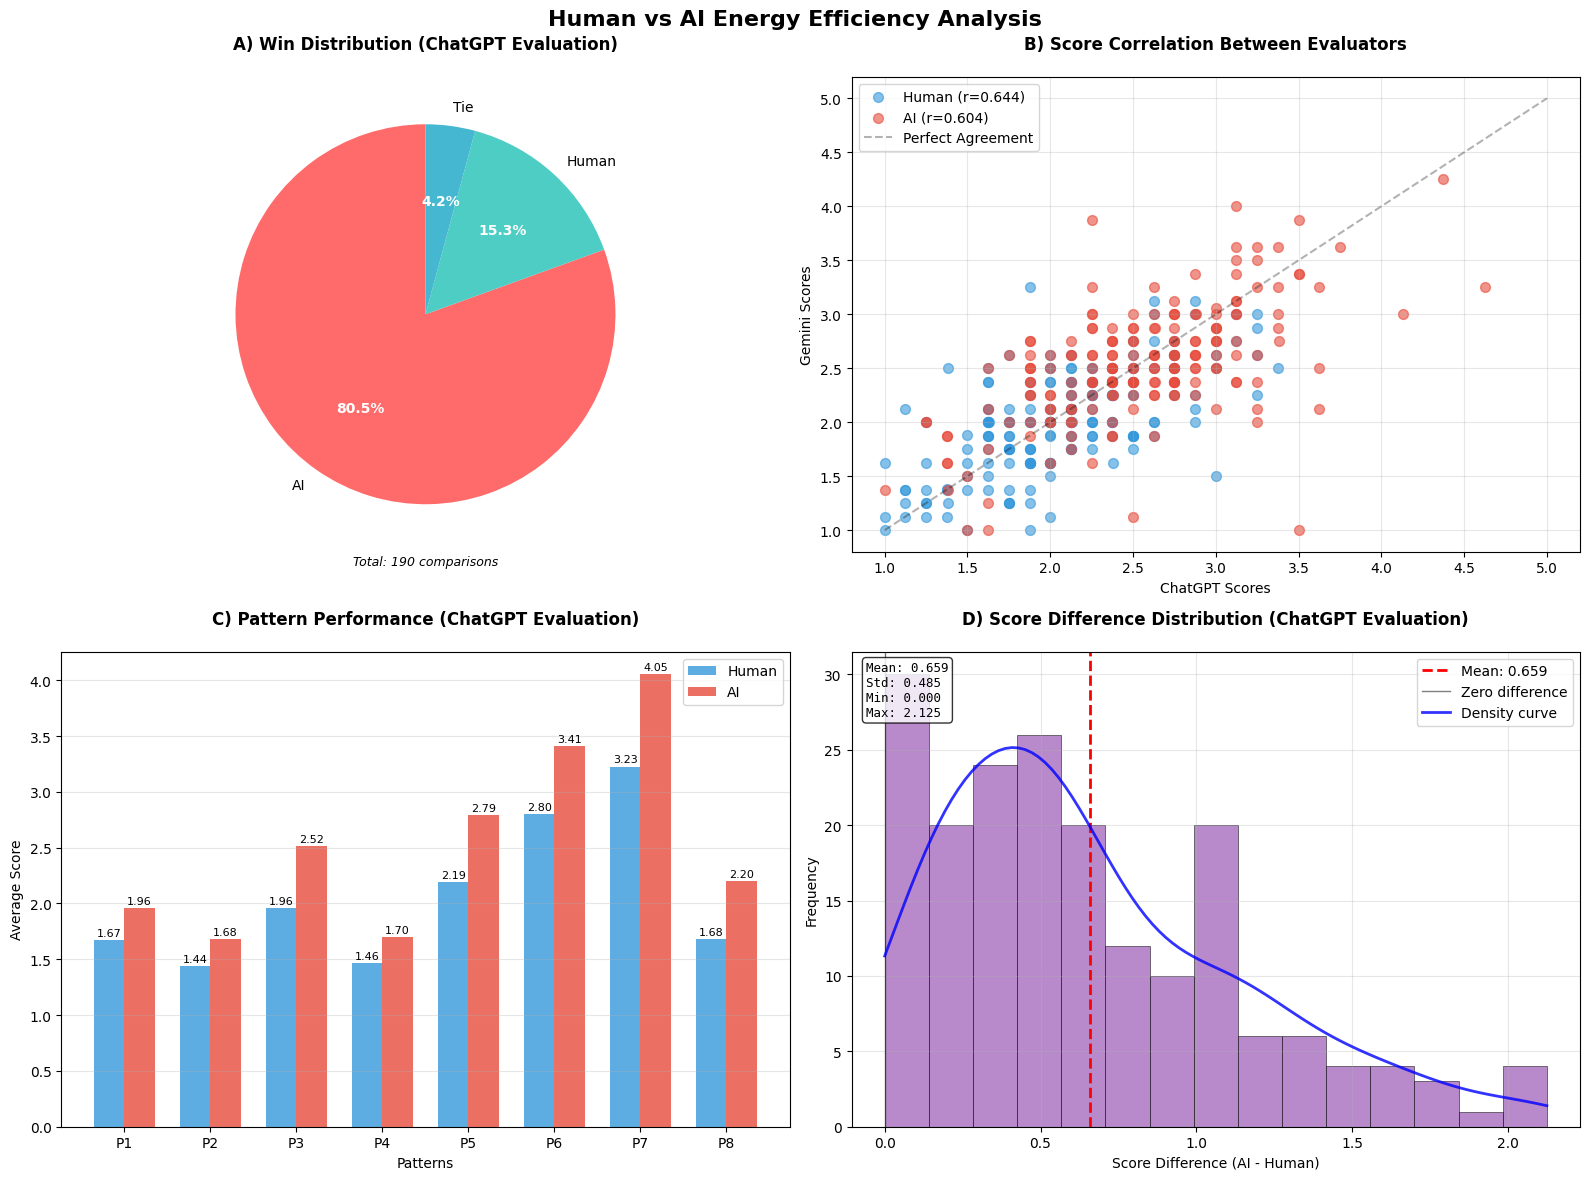

✓ Four diagrams saved as: four_key_diagrams.png
✓ Diagrams created:
  1. Win Distribution (ChatGPT)
  2. Score Correlation (Both evaluators)
  3. Pattern Performance (ChatGPT)
  4. Score Difference Distribution (ChatGPT)

ANALYSIS COMPLETE!


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def create_four_diagrams(chatgpt_csv, gemini_csv, output_file="four_diagrams.png"):
    """
    Create four specific diagrams for human-AI energy efficiency comparison
    """
    # Load both datasets
    df_chatgpt = pd.read_csv(chatgpt_csv)
    df_gemini = pd.read_csv(gemini_csv)

    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Human vs AI Energy Efficiency Analysis', fontsize=16, fontweight='bold', y=0.98)

    # 1. Win Distribution (ChatGPT)
    axes[0, 0].set_title('A) Win Distribution (ChatGPT Evaluation)', fontweight='bold', pad=20)
    win_counts_chatgpt = df_chatgpt['winner'].value_counts()
    colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']  # AI, Human, Tie colors

    # Ensure all categories are present
    categories = ['AI', 'Human', 'Tie']
    counts = [win_counts_chatgpt.get(cat, 0) for cat in categories]
    total = sum(counts)

    wedges, texts, autotexts = axes[0, 0].pie(
        counts,
        labels=categories,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 10}
    )

    # Enhance autopct text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    # Add count information
    axes[0, 0].text(0, -1.3, f'Total: {total} comparisons',
                   ha='center', va='center', fontsize=9, style='italic')

    # 2. Score Correlation (Both evaluators)
    axes[0, 1].set_title('B) Score Correlation Between Evaluators', fontweight='bold', pad=20)

    # Merge for correlation analysis
    comparison_df = pd.merge(
        df_chatgpt[['PostId', 'human_average_score', 'ai_average_score']],
        df_gemini[['PostId', 'human_average_score', 'ai_average_score']],
        on='PostId',
        suffixes=('_chatgpt', '_gemini')
    )

    # Human scores correlation
    human_corr = comparison_df['human_average_score_chatgpt'].corr(comparison_df['human_average_score_gemini'])
    ai_corr = comparison_df['ai_average_score_chatgpt'].corr(comparison_df['ai_average_score_gemini'])

    # Scatter plots
    scatter1 = axes[0, 1].scatter(
        comparison_df['human_average_score_chatgpt'],
        comparison_df['human_average_score_gemini'],
        alpha=0.6, color='#3498db', label=f'Human (r={human_corr:.3f})', s=50
    )

    scatter2 = axes[0, 1].scatter(
        comparison_df['ai_average_score_chatgpt'],
        comparison_df['ai_average_score_gemini'],
        alpha=0.6, color='#e74c3c', label=f'AI (r={ai_corr:.3f})', s=50
    )

    # Perfect agreement line
    min_val = min(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini',
                               'ai_average_score_chatgpt', 'ai_average_score_gemini']].min().min(), 1)
    max_val = max(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini',
                               'ai_average_score_chatgpt', 'ai_average_score_gemini']].max().max(), 5)

    axes[0, 1].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3, label='Perfect Agreement')

    axes[0, 1].set_xlabel('ChatGPT Scores')
    axes[0, 1].set_ylabel('Gemini Scores')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Pattern Performance (ChatGPT)
    axes[1, 0].set_title('C) Pattern Performance (ChatGPT Evaluation)', fontweight='bold', pad=20)

    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    human_pattern_means = df_chatgpt[human_patterns].mean()
    ai_pattern_means = df_chatgpt[ai_patterns].mean()

    patterns_short = [f'P{i}' for i in range(1, 9)]
    x = np.arange(len(patterns_short))
    width = 0.35

    bars1 = axes[1, 0].bar(x - width/2, human_pattern_means.values, width,
                          label='Human', color='#3498db', alpha=0.8)
    bars2 = axes[1, 0].bar(x + width/2, ai_pattern_means.values, width,
                          label='AI', color='#e74c3c', alpha=0.8)

    axes[1, 0].set_xlabel('Patterns')
    axes[1, 0].set_ylabel('Average Score')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(patterns_short)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    def add_value_labels(bars, ax):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                   f'{height:.2f}', ha='center', va='bottom', fontsize=8)

    add_value_labels(bars1, axes[1, 0])
    add_value_labels(bars2, axes[1, 0])

    # 4. Score Difference Distribution (ChatGPT)
    axes[1, 1].set_title('D) Score Difference Distribution (ChatGPT Evaluation)', fontweight='bold', pad=20)

    score_diff = df_chatgpt['score_difference']

    # Histogram with density curve
    n, bins, patches = axes[1, 1].hist(score_diff, bins=15, alpha=0.7, color='#9b59b6',
                                      edgecolor='black', linewidth=0.5, density=False)

    # Add vertical lines for mean and zero
    mean_diff = score_diff.mean()
    axes[1, 1].axvline(mean_diff, color='red', linestyle='--', linewidth=2,
                      label=f'Mean: {mean_diff:.3f}')
    axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5, label='Zero difference')

    # Add distribution curve
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(score_diff)
    x_range = np.linspace(score_diff.min(), score_diff.max(), 100)
    kde_curve = kde(x_range) * len(score_diff) * (bins[1] - bins[0])  # Scale to histogram
    axes[1, 1].plot(x_range, kde_curve, 'b-', linewidth=2, alpha=0.8, label='Density curve')

    axes[1, 1].set_xlabel('Score Difference (AI - Human)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # Add statistics text
    stats_text = f'Mean: {mean_diff:.3f}\nStd: {score_diff.std():.3f}\nMin: {score_diff.min():.3f}\nMax: {score_diff.max():.3f}'
    axes[1, 1].text(0.02, 0.98, stats_text, transform=axes[1, 1].transAxes,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   fontsize=9, family='monospace')

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print(f"✓ Four diagrams saved as: {output_file}")
    print(f"✓ Diagrams created:")
    print(f"  1. Win Distribution (ChatGPT)")
    print(f"  2. Score Correlation (Both evaluators)")
    print(f"  3. Pattern Performance (ChatGPT)")
    print(f"  4. Score Difference Distribution (ChatGPT)")

    return fig

# Main execution
if __name__ == "__main__":
    # Update these paths with your actual CSV files
    chatgpt_csv_path = "/content/ChatGPT.csv"  # Change to your ChatGPT analysis file
    gemini_csv_path = "/content/Gemini.csv"    # Change to your Gemini analysis file

    try:
        # Create the four diagrams
        fig = create_four_diagrams(chatgpt_csv_path, gemini_csv_path, "four_key_diagrams.png")

        print("\n" + "="*50)
        print("ANALYSIS COMPLETE!")
        print("="*50)

    except FileNotFoundError as e:
        print(f"Error: File not found - {e}")
        print("Please update the CSV file paths in the main execution section.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

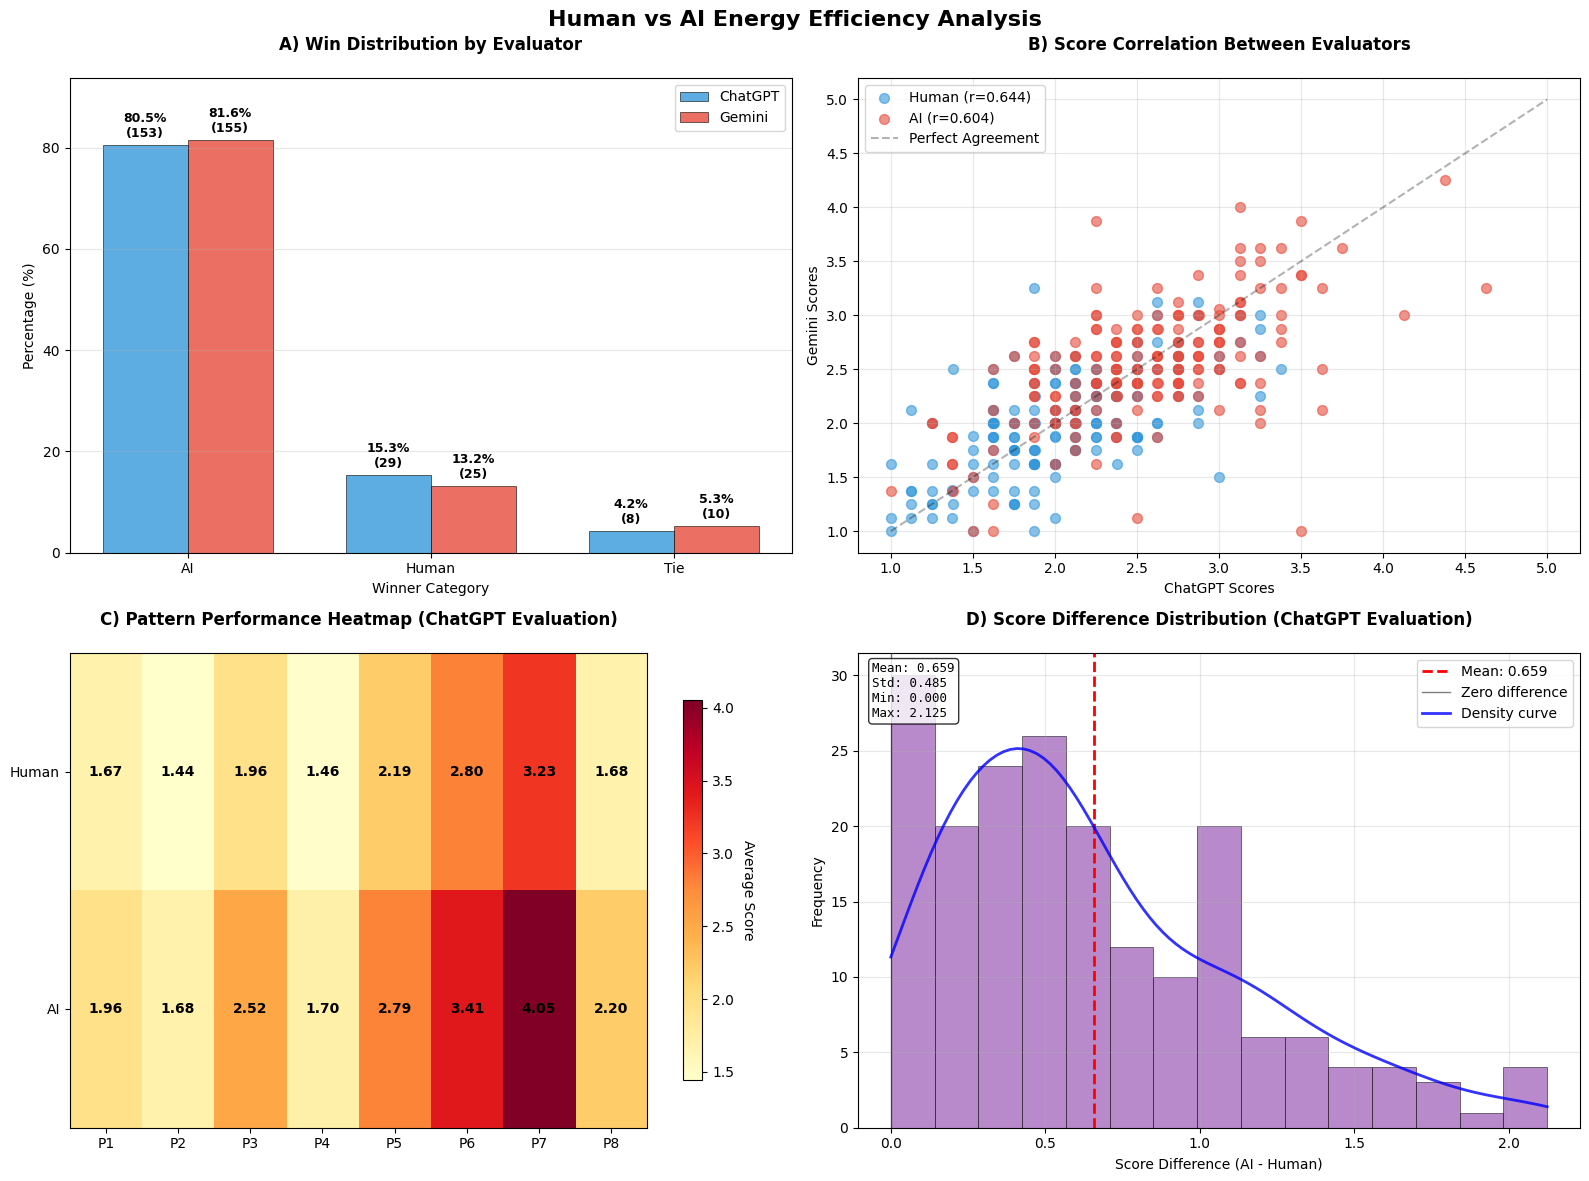

✓ Four diagrams saved as: four_key_diagrams.png
✓ Diagrams created:
  1. Win Distribution - Side by Side Bar Chart (Both evaluators)
  2. Score Correlation (Both evaluators)
  3. Pattern Performance - Heatmap (ChatGPT)
  4. Score Difference Distribution (ChatGPT)

📊 KEY INSIGHTS:
• ChatGPT - AI wins: 153/190 (80.5%)
• Gemini - AI wins: 155/190 (81.6%)
• Score correlation - Human: 0.644, AI: 0.604
• Average score difference (ChatGPT): 0.659

ANALYSIS COMPLETE!


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def create_four_diagrams(chatgpt_csv, gemini_csv, output_file="four_diagrams.png"):
    """
    Create four specific diagrams for human-AI energy efficiency comparison
    """
    # Load both datasets
    df_chatgpt = pd.read_csv(chatgpt_csv)
    df_gemini = pd.read_csv(gemini_csv)

    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Human vs AI Energy Efficiency Analysis', fontsize=16, fontweight='bold', y=0.98)

    # 1. Win Distribution - Side by Side Bar Chart (Both Models)
    axes[0, 0].set_title('A) Win Distribution by Evaluator', fontweight='bold', pad=20)

    # Prepare data for both evaluators
    evaluators = ['ChatGPT', 'Gemini']
    categories = ['AI', 'Human', 'Tie']

    chatgpt_counts = [df_chatgpt['winner'].value_counts().get(cat, 0) for cat in categories]
    gemini_counts = [df_gemini['winner'].value_counts().get(cat, 0) for cat in categories]

    # Calculate percentages
    chatgpt_total = sum(chatgpt_counts)
    gemini_total = sum(gemini_counts)
    chatgpt_percent = [count/chatgpt_total*100 for count in chatgpt_counts]
    gemini_percent = [count/gemini_total*100 for count in gemini_counts]

    # Set up bar positions
    x = np.arange(len(categories))
    width = 0.35

    # Create bars
    bars1 = axes[0, 0].bar(x - width/2, chatgpt_percent, width, label='ChatGPT',
                          color='#3498db', alpha=0.8, edgecolor='black', linewidth=0.5)
    bars2 = axes[0, 0].bar(x + width/2, gemini_percent, width, label='Gemini',
                          color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=0.5)

    # Add value labels on bars
    for bars, counts, percents in [(bars1, chatgpt_counts, chatgpt_percent),
                                  (bars2, gemini_counts, gemini_percent)]:
        for bar, count, percent in zip(bars, counts, percents):
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                           f'{percent:.1f}%\n({count})', ha='center', va='bottom',
                           fontsize=9, fontweight='bold')

    axes[0, 0].set_xlabel('Winner Category')
    axes[0, 0].set_ylabel('Percentage (%)')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(categories)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    axes[0, 0].set_ylim(0, max(max(chatgpt_percent), max(gemini_percent)) * 1.15)

    # 2. Score Correlation (Both evaluators)
    axes[0, 1].set_title('B) Score Correlation Between Evaluators', fontweight='bold', pad=20)

    # Merge for correlation analysis
    comparison_df = pd.merge(
        df_chatgpt[['PostId', 'human_average_score', 'ai_average_score']],
        df_gemini[['PostId', 'human_average_score', 'ai_average_score']],
        on='PostId',
        suffixes=('_chatgpt', '_gemini')
    )

    # Human scores correlation
    human_corr = comparison_df['human_average_score_chatgpt'].corr(comparison_df['human_average_score_gemini'])
    ai_corr = comparison_df['ai_average_score_chatgpt'].corr(comparison_df['ai_average_score_gemini'])

    # Scatter plots
    scatter1 = axes[0, 1].scatter(
        comparison_df['human_average_score_chatgpt'],
        comparison_df['human_average_score_gemini'],
        alpha=0.6, color='#3498db', label=f'Human (r={human_corr:.3f})', s=50
    )

    scatter2 = axes[0, 1].scatter(
        comparison_df['ai_average_score_chatgpt'],
        comparison_df['ai_average_score_gemini'],
        alpha=0.6, color='#e74c3c', label=f'AI (r={ai_corr:.3f})', s=50
    )

    # Perfect agreement line
    min_val = min(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini',
                               'ai_average_score_chatgpt', 'ai_average_score_gemini']].min().min(), 1)
    max_val = max(comparison_df[['human_average_score_chatgpt', 'human_average_score_gemini',
                               'ai_average_score_chatgpt', 'ai_average_score_gemini']].max().max(), 5)

    axes[0, 1].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3, label='Perfect Agreement')

    axes[0, 1].set_xlabel('ChatGPT Scores')
    axes[0, 1].set_ylabel('Gemini Scores')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Pattern Performance Heatmap (ChatGPT)
    axes[1, 0].set_title('C) Pattern Performance Heatmap (ChatGPT Evaluation)', fontweight='bold', pad=20)

    # Prepare data for heatmap
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    # Calculate average scores for each pattern
    human_pattern_means = df_chatgpt[human_patterns].mean().values
    ai_pattern_means = df_chatgpt[ai_patterns].mean().values

    # Create a 2x8 matrix for the heatmap
    heatmap_data = np.array([human_pattern_means, ai_pattern_means])

    # Create heatmap
    im = axes[1, 0].imshow(heatmap_data, cmap='YlOrRd', aspect='auto', interpolation='nearest')

    # Set labels
    pattern_labels = [f'P{i}' for i in range(1, 9)]
    row_labels = ['Human', 'AI']

    axes[1, 0].set_xticks(np.arange(len(pattern_labels)))
    axes[1, 0].set_yticks(np.arange(len(row_labels)))
    axes[1, 0].set_xticklabels(pattern_labels)
    axes[1, 0].set_yticklabels(row_labels)

    # Rotate x labels for better readability
    plt.setp(axes[1, 0].get_xticklabels(), rotation=0)

    # Add text annotations in each cell
    for i in range(len(row_labels)):
        for j in range(len(pattern_labels)):
            text = axes[1, 0].text(j, i, f'{heatmap_data[i, j]:.2f}',
                                 ha="center", va="center", color="black",
                                 fontweight='bold', fontsize=10)

    # Add colorbar
    cbar = plt.colorbar(im, ax=axes[1, 0], shrink=0.8)
    cbar.set_label('Average Score', rotation=270, labelpad=15)

    # 4. Score Difference Distribution (ChatGPT)
    axes[1, 1].set_title('D) Score Difference Distribution (ChatGPT Evaluation)', fontweight='bold', pad=20)

    score_diff = df_chatgpt['score_difference']

    # Histogram with density curve
    n, bins, patches = axes[1, 1].hist(score_diff, bins=15, alpha=0.7, color='#9b59b6',
                                      edgecolor='black', linewidth=0.5, density=False)

    # Add vertical lines for mean and zero
    mean_diff = score_diff.mean()
    axes[1, 1].axvline(mean_diff, color='red', linestyle='--', linewidth=2,
                      label=f'Mean: {mean_diff:.3f}')
    axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5, label='Zero difference')

    # Add distribution curve
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(score_diff)
    x_range = np.linspace(score_diff.min(), score_diff.max(), 100)
    kde_curve = kde(x_range) * len(score_diff) * (bins[1] - bins[0])  # Scale to histogram
    axes[1, 1].plot(x_range, kde_curve, 'b-', linewidth=2, alpha=0.8, label='Density curve')

    axes[1, 1].set_xlabel('Score Difference (AI - Human)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # Add statistics text
    stats_text = f'Mean: {mean_diff:.3f}\nStd: {score_diff.std():.3f}\nMin: {score_diff.min():.3f}\nMax: {score_diff.max():.3f}'
    axes[1, 1].text(0.02, 0.98, stats_text, transform=axes[1, 1].transAxes,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   fontsize=9, family='monospace')

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print(f"✓ Four diagrams saved as: {output_file}")
    print(f"✓ Diagrams created:")
    print(f"  1. Win Distribution - Side by Side Bar Chart (Both evaluators)")
    print(f"  2. Score Correlation (Both evaluators)")
    print(f"  3. Pattern Performance - Heatmap (ChatGPT)")
    print(f"  4. Score Difference Distribution (ChatGPT)")

    # Print some key insights
    print(f"\n📊 KEY INSIGHTS:")
    print(f"• ChatGPT - AI wins: {chatgpt_counts[0]}/{chatgpt_total} ({chatgpt_percent[0]:.1f}%)")
    print(f"• Gemini - AI wins: {gemini_counts[0]}/{gemini_total} ({gemini_percent[0]:.1f}%)")
    print(f"• Score correlation - Human: {human_corr:.3f}, AI: {ai_corr:.3f}")
    print(f"• Average score difference (ChatGPT): {mean_diff:.3f}")

    return fig

# Main execution
if __name__ == "__main__":
    # Update these paths with your actual CSV files
    chatgpt_csv_path = "/content/ChatGPT.csv"  # Change to your ChatGPT analysis file
    gemini_csv_path = "/content/Gemini.csv"    # Change to your Gemini analysis file

    try:
        # Create the four diagrams
        fig = create_four_diagrams(chatgpt_csv_path, gemini_csv_path, "four_key_diagrams.png")

        print("\n" + "="*50)
        print("ANALYSIS COMPLETE!")
        print("="*50)

    except FileNotFoundError as e:
        print(f"Error: File not found - {e}")
        print("Please update the CSV file paths in the main execution section.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

def comprehensive_statistical_analysis(chatgpt_csv, gemini_csv):
    """
    Perform comprehensive statistical analysis on human-AI energy efficiency comparison
    """
    # Load data
    df_chatgpt = pd.read_csv(chatgpt_csv)
    df_gemini = pd.read_csv(gemini_csv)

    print("=" * 70)
    print("COMPREHENSIVE STATISTICAL ANALYSIS")
    print("=" * 70)

    # 1. BASIC COMPARISON STATISTICS (Using ChatGPT data as primary)
    print("\n1. BASIC COMPARISON STATISTICS:")
    print("-" * 40)

    basic_comparison_stats(df_chatgpt)

    # 2. PATTERN-WISE ANALYSIS
    print("\n2. PATTERN-WISE ANALYSIS:")
    print("-" * 40)

    pattern_analysis(df_chatgpt)

    # 3. EVALUATOR COMPARISON STATISTICS
    print("\n3. EVALUATOR COMPARISON STATISTICS:")
    print("-" * 40)

    evaluator_comparison_stats(df_chatgpt, df_gemini)

    # 4. CORRELATION AND TREND ANALYSIS
    print("\n4. CORRELATION AND TREND ANALYSIS:")
    print("-" * 40)

    correlation_analysis(df_chatgpt)

    # 5. ROBUSTNESS AND AGREEMENT ANALYSIS
    print("\n5. ROBUSTNESS AND AGREEMENT ANALYSIS:")
    print("-" * 40)

    robustness_analysis(df_chatgpt, df_gemini)

def basic_comparison_stats(df):
    """Basic comparison statistics with explanations"""
    total_comparisons = len(df)
    win_counts = df['winner'].value_counts()

    # Win percentages
    ai_wins = win_counts.get('AI', 0)
    human_wins = win_counts.get('Human', 0)
    ties = win_counts.get('Tie', 0)

    ai_win_pct = ai_wins / total_comparisons * 100
    human_win_pct = human_wins / total_comparisons * 100
    tie_pct = ties / total_comparisons * 100

    print(f"Total comparisons: {total_comparisons}")
    print(f"AI wins: {ai_wins} ({ai_win_pct:.1f}%)")
    print(f"Human wins: {human_wins} ({human_win_pct:.1f}%)")
    print(f"Ties: {ties} ({tie_pct:.1f}%)")

    # Score statistics
    human_avg = df['human_average_score'].mean()
    ai_avg = df['ai_average_score'].mean()
    score_diff_avg = df['score_difference'].mean()

    print(f"\nAverage Human Score: {human_avg:.3f}")
    print(f"Average AI Score: {ai_avg:.3f}")
    print(f"Average Score Difference (AI-Human): {score_diff_avg:.3f}")

    # Statistical significance tests
    print(f"\n--- STATISTICAL SIGNIFICANCE TESTS ---")

    # Paired t-test
    t_stat, p_value = stats.ttest_rel(df['ai_average_score'], df['human_average_score'])
    print(f"Paired T-test Results:")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("→ Statistically significant difference (p < 0.05)")
        print("  This means the observed difference is unlikely due to random chance")
    else:
        print("→ No statistically significant difference (p ≥ 0.05)")
        print("  This means the observed difference could be due to random variation")

    # Effect size (Cohen's d)
    cohens_d = (ai_avg - human_avg) / np.sqrt((df['ai_average_score'].var() + df['human_average_score'].var()) / 2)
    print(f"Cohen's d (effect size): {cohens_d:.3f}")

    # Interpret effect size
    if abs(cohens_d) < 0.2:
        effect_size_desc = "negligible"
    elif abs(cohens_d) < 0.5:
        effect_size_desc = "small"
    elif abs(cohens_d) < 0.8:
        effect_size_desc = "medium"
    else:
        effect_size_desc = "large"

    print(f"→ Effect size interpretation: {effect_size_desc} effect")
    print(f"  This indicates the practical significance of the difference")

def pattern_analysis(df):
    """Pattern-wise performance analysis"""
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    # Calculate means and standard deviations
    human_pattern_means = df[human_patterns].mean()
    ai_pattern_means = df[ai_patterns].mean()
    human_pattern_stds = df[human_patterns].std()
    ai_pattern_stds = df[ai_patterns].std()

    # Best performing patterns
    best_human_pattern = human_pattern_means.idxmax()
    best_ai_pattern = ai_pattern_means.idxmax()
    worst_human_pattern = human_pattern_means.idxmin()
    worst_ai_pattern = ai_pattern_means.idxmin()

    print(f"Highest scoring Human pattern: {best_human_pattern} ({human_pattern_means[best_human_pattern]:.3f})")
    print(f"Highest scoring AI pattern: {best_ai_pattern} ({ai_pattern_means[best_ai_pattern]:.3f})")
    print(f"Lowest scoring Human pattern: {worst_human_pattern} ({human_pattern_means[worst_human_pattern]:.3f})")
    print(f"Lowest scoring AI pattern: {worst_ai_pattern} ({ai_pattern_means[worst_ai_pattern]:.3f})")

    # Most consistent patterns (lowest standard deviation)
    most_consistent_human = human_pattern_stds.idxmin()
    most_consistent_ai = ai_pattern_stds.idxmin()
    least_consistent_human = human_pattern_stds.idxmax()
    least_consistent_ai = ai_pattern_stds.idxmax()

    print(f"\nMost consistent Human pattern: {most_consistent_human} (std: {human_pattern_stds[most_consistent_human]:.3f})")
    print(f"Most consistent AI pattern: {most_consistent_ai} (std: {ai_pattern_stds[most_consistent_ai]:.3f})")
    print(f"Least consistent Human pattern: {least_consistent_human} (std: {human_pattern_stds[least_consistent_human]:.3f})")
    print(f"Least consistent AI pattern: {least_consistent_ai} (std: {ai_pattern_stds[least_consistent_ai]:.3f})")

    # Pattern performance difference
    print(f"\n--- PATTERN PERFORMANCE GAPS ---")
    for i in range(1, 9):
        human_score = human_pattern_means[f'human_pattern_{i}_score']
        ai_score = ai_pattern_means[f'ai_pattern_{i}_score']
        gap = ai_score - human_score
        print(f"Pattern {i}: AI leads by {gap:+.3f} points")

def evaluator_comparison_stats(df_chatgpt, df_gemini):
    """Compare statistics between two evaluators"""
    print("ChatGPT Evaluation:")
    chatgpt_ai_wins = df_chatgpt['winner'].value_counts().get('AI', 0)
    chatgpt_human_wins = df_chatgpt['winner'].value_counts().get('Human', 0)
    chatgpt_ties = df_chatgpt['winner'].value_counts().get('Tie', 0)
    chatgpt_total = len(df_chatgpt)

    print(f"  AI wins: {chatgpt_ai_wins} ({chatgpt_ai_wins/chatgpt_total*100:.1f}%)")
    print(f"  Human wins: {chatgpt_human_wins} ({chatgpt_human_wins/chatgpt_total*100:.1f}%)")
    print(f"  Ties: {chatgpt_ties} ({chatgpt_ties/chatgpt_total*100:.1f}%)")
    print(f"  Avg Human Score: {df_chatgpt['human_average_score'].mean():.3f}")
    print(f"  Avg AI Score: {df_chatgpt['ai_average_score'].mean():.3f}")

    print("\nGemini Evaluation:")
    gemini_ai_wins = df_gemini['winner'].value_counts().get('AI', 0)
    gemini_human_wins = df_gemini['winner'].value_counts().get('Human', 0)
    gemini_ties = df_gemini['winner'].value_counts().get('Tie', 0)
    gemini_total = len(df_gemini)

    print(f"  AI wins: {gemini_ai_wins} ({gemini_ai_wins/gemini_total*100:.1f}%)")
    print(f"  Human wins: {gemini_human_wins} ({gemini_human_wins/gemini_total*100:.1f}%)")
    print(f"  Ties: {gemini_ties} ({gemini_ties/gemini_total*100:.1f}%)")
    print(f"  Avg Human Score: {df_gemini['human_average_score'].mean():.3f}")
    print(f"  Avg AI Score: {df_gemini['ai_average_score'].mean():.3f}")

def correlation_analysis(df):
    """Analyze correlations and trends"""
    # If you have question age data, uncomment and modify this section
    """
    if 'question_age' in df.columns:
        human_age_corr, human_age_p = pearsonr(df['human_average_score'], df['question_age'])
        ai_age_corr, ai_age_p = pearsonr(df['ai_average_score'], df['question_age'])
        diff_age_corr, diff_age_p = pearsonr(df['score_difference'], df['question_age'])

        print(f"Correlation with Question Age:")
        print(f"Human Score vs Question Age: {human_age_corr:.3f}")
        print(f"AI Score vs Question Age: {ai_age_corr:.3f}")
        print(f"Score Difference vs Question Age: {diff_age_corr:.3f}")

        print(f"\nStatistical Significance of Correlations:")
        print(f"Human Score vs Age p-value: {human_age_p:.3f} {'(not significant)' if human_age_p >= 0.05 else '(significant)'}")
        print(f"AI Score vs Age p-value: {ai_age_p:.3f} {'(not significant)' if ai_age_p >= 0.05 else '(significant)'}")

        # Interpretation
        print(f"\n--- CORRELATION INTERPRETATION ---")
        print("Correlation coefficients range from -1 to +1:")
        print("+1: perfect positive correlation, -1: perfect negative correlation, 0: no correlation")
        print("p-value < 0.05 indicates statistically significant correlation")
    """

    # Score consistency analysis
    human_std = df['human_average_score'].std()
    ai_std = df['ai_average_score'].std()

    print(f"\nScore Consistency Analysis:")
    print(f"Human score standard deviation: {human_std:.3f}")
    print(f"AI score standard deviation: {ai_std:.3f}")

    if human_std < ai_std:
        print("→ Human scores are more consistent (lower variability)")
    else:
        print("→ AI scores are more consistent (lower variability)")

def robustness_analysis(df_chatgpt, df_gemini):
    """Analyze robustness and agreement between evaluators"""
    # Merge for comparison
    comparison_df = pd.merge(
        df_chatgpt[['PostId', 'winner', 'human_average_score', 'ai_average_score']],
        df_gemini[['PostId', 'winner', 'human_average_score', 'ai_average_score']],
        on='PostId',
        suffixes=('_chatgpt', '_gemini')
    )

    # Agreement analysis
    winner_agreement = (comparison_df['winner_chatgpt'] == comparison_df['winner_gemini']).mean()
    kappa = cohen_kappa_score(comparison_df['winner_chatgpt'], comparison_df['winner_gemini'])

    print(f"Winner agreement: {winner_agreement*100:.1f}%")
    print(f"Cohen's Kappa (winner agreement): {kappa:.3f}")

    # Kappa interpretation
    if kappa < 0:
        kappa_desc = "poor agreement"
    elif kappa < 0.2:
        kappa_desc = "slight agreement"
    elif kappa < 0.4:
        kappa_desc = "fair agreement"
    elif kappa < 0.6:
        kappa_desc = "moderate agreement"
    elif kappa < 0.8:
        kappa_desc = "substantial agreement"
    else:
        kappa_desc = "almost perfect agreement"

    print(f"→ Kappa interpretation: {kappa_desc}")

    # Score correlations
    human_corr = comparison_df['human_average_score_chatgpt'].corr(comparison_df['human_average_score_gemini'])
    ai_corr = comparison_df['ai_average_score_chatgpt'].corr(comparison_df['ai_average_score_gemini'])

    print(f"Human score correlation: {human_corr:.3f}")
    print(f"AI score correlation: {ai_corr:.3f}")

    # Evaluator bias
    chatgpt_human_avg = df_chatgpt['human_average_score'].mean()
    gemini_human_avg = df_gemini['human_average_score'].mean()
    chatgpt_ai_avg = df_chatgpt['ai_average_score'].mean()
    gemini_ai_avg = df_gemini['ai_average_score'].mean()

    print(f"\nEvaluator Bias Analysis:")
    print(f"ChatGPT vs Gemini Human score difference: {chatgpt_human_avg - gemini_human_avg:.3f}")
    print(f"ChatGPT vs Gemini AI score difference: {chatgpt_ai_avg - gemini_ai_avg:.3f}")

    # Statistical tests for bias
    t_stat_human, p_val_human = stats.ttest_ind(
        df_chatgpt['human_average_score'],
        df_gemini['human_average_score']
    )
    t_stat_ai, p_val_ai = stats.ttest_ind(
        df_chatgpt['ai_average_score'],
        df_gemini['ai_average_score']
    )

    print(f"\nHuman score T-test: t={t_stat_human:.3f}, p={p_val_human:.3f}")
    print(f"AI score T-test: t={t_stat_ai:.3f}, p={p_val_ai:.3f}")

    if p_val_human >= 0.05 and p_val_ai >= 0.05:
        print("→ No significant evaluator bias detected (p ≥ 0.05 for both)")
        print("  This means evaluators are consistent in their scoring")
    else:
        print("→ Significant evaluator bias detected (p < 0.05)")
        print("  This means evaluators differ in their scoring approach")

    # Consensus analysis
    different_winners = comparison_df[comparison_df['winner_chatgpt'] != comparison_df['winner_gemini']]
    ai_wins_both = comparison_df[
        (comparison_df['winner_chatgpt'] == 'AI') &
        (comparison_df['winner_gemini'] == 'AI')
    ]
    human_wins_both = comparison_df[
        (comparison_df['winner_chatgpt'] == 'Human') &
        (comparison_df['winner_gemini'] == 'Human')
    ]

    total_comparisons = len(comparison_df)

    print(f"\nRobustness of Conclusions:")
    print(f"Posts with different winners: {len(different_winners)} ({len(different_winners)/total_comparisons*100:.1f}%)")
    print(f"Strong AI wins (both agree): {len(ai_wins_both)} ({len(ai_wins_both)/total_comparisons*100:.1f}%)")
    print(f"Strong Human wins (both agree): {len(human_wins_both)} ({len(human_wins_both)/total_comparisons*100:.1f}%)")
    print(f"Disputed/Unclear: {len(different_winners)} ({len(different_winners)/total_comparisons*100:.1f}%)")

    # Confidence in results
    consensus_ratio = (len(ai_wins_both) + len(human_wins_both)) / total_comparisons
    print(f"\nOverall consensus ratio: {consensus_ratio:.3f}")
    print("→ Higher values indicate more reliable conclusions across evaluators")

def additional_advanced_stats(df_chatgpt, df_gemini):
    """Additional advanced statistical analyses"""
    print("\n6. ADVANCED STATISTICAL ANALYSES:")
    print("-" * 40)

    # Effect size confidence intervals
    def cohens_d_ci(x, y, confidence=0.95):
        n1, n2 = len(x), len(y)
        dof = n1 + n2 - 2
        d = (np.mean(x) - np.mean(y)) / np.sqrt(((n1-1)*np.var(x, ddof=1) + (n2-1)*np.var(y, ddof=1)) / dof)
        # Approximate CI for Cohen's d
        se = np.sqrt((n1 + n2)/(n1 * n2) + d**2/(2*(n1 + n2)))
        z = stats.norm.ppf(1 - (1 - confidence)/2)
        return d, d - z*se, d + z*se

    d, d_lower, d_upper = cohens_d_ci(
        df_chatgpt['ai_average_score'],
        df_chatgpt['human_average_score']
    )

    print(f"Cohen's d 95% Confidence Interval: {d:.3f} [{d_lower:.3f}, {d_upper:.3f}]")
    print("→ This interval shows the range of plausible effect sizes")

    # Non-parametric test (Wilcoxon signed-rank test)
    w_stat, w_p = stats.wilcoxon(
        df_chatgpt['ai_average_score'],
        df_chatgpt['human_average_score']
    )
    print(f"\nWilcoxon signed-rank test (non-parametric):")
    print(f"W-statistic: {w_stat:.3f}, P-value: {w_p:.4f}")
    print("→ Non-parametric alternative to t-test, less sensitive to outliers")

    # Power analysis
    from statsmodels.stats.power import TTestPower
    power_analysis = TTestPower()
    power = power_analysis.power(
        effect_size=d,
        nobs=len(df_chatgpt),
        alpha=0.05,
        alternative='two-sided'
    )
    print(f"\nStatistical Power: {power:.3f}")
    if power >= 0.8:
        print("→ Adequate statistical power (≥ 0.8)")
        print("  Low risk of Type II error (false negative)")
    else:
        print("→ Underpowered study (< 0.8)")
        print("  Higher risk of missing true effects")

# Main execution
if __name__ == "__main__":
    # Update these paths with your actual CSV files
    chatgpt_csv_path = "/content/ChatGPT.csv"
    gemini_csv_path = "/content/Gemini.csv"

    try:
        comprehensive_statistical_analysis(chatgpt_csv_path, gemini_csv_path)

        # Load data for advanced stats
        df_chatgpt = pd.read_csv(chatgpt_csv_path)
        df_gemini = pd.read_csv(gemini_csv_path)
        additional_advanced_stats(df_chatgpt, df_gemini)

        print("\n" + "="*70)
        print("STATISTICAL ANALYSIS COMPLETE!")
        print("="*70)

    except FileNotFoundError as e:
        print(f"Error: File not found - {e}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

COMPREHENSIVE STATISTICAL ANALYSIS

1. BASIC COMPARISON STATISTICS:
----------------------------------------
Total comparisons: 190
AI wins: 153 (80.5%)
Human wins: 29 (15.3%)
Ties: 8 (4.2%)

Average Human Score: 2.067
Average AI Score: 2.546
Average Score Difference (AI-Human): 0.659

--- STATISTICAL SIGNIFICANCE TESTS ---
Paired T-test Results:
T-statistic: 9.922, P-value: 0.0000
→ Statistically significant difference (p < 0.05)
  This means the observed difference is unlikely due to random chance
Cohen's d (effect size): 0.874
→ Effect size interpretation: large effect
  This indicates the practical significance of the difference

2. PATTERN-WISE ANALYSIS:
----------------------------------------
Highest scoring Human pattern: human_pattern_7_score (3.226)
Highest scoring AI pattern: ai_pattern_7_score (4.053)
Lowest scoring Human pattern: human_pattern_2_score (1.442)
Lowest scoring AI pattern: ai_pattern_2_score (1.679)

Most consistent Human pattern: human_pattern_2_score (std: 1

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import cohen_kappa_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def comprehensive_statistical_analysis(chatgpt_csv, gemini_csv):
    """
    Perform comprehensive statistical analysis on human-AI energy efficiency comparison
    """
    # Load data
    df_chatgpt = pd.read_csv(chatgpt_csv)
    df_gemini = pd.read_csv(gemini_csv)

    print("=" * 70)
    print("COMPREHENSIVE STATISTICAL ANALYSIS")
    print("=" * 70)

    # 1. BASIC COMPARISON STATISTICS (Using ChatGPT data as primary)
    print("\n1. BASIC COMPARISON STATISTICS:")
    print("-" * 40)

    basic_comparison_stats(df_chatgpt)

    # 2. PATTERN-WISE ANALYSIS
    print("\n2. PATTERN-WISE ANALYSIS:")
    print("-" * 40)

    pattern_analysis(df_chatgpt)

    # 3. EVALUATOR COMPARISON STATISTICS
    print("\n3. EVALUATOR COMPARISON STATISTICS:")
    print("-" * 40)

    evaluator_comparison_stats(df_chatgpt, df_gemini)

    # 4. QUESTION AGE CORRELATION ANALYSIS
    print("\n4. QUESTION AGE CORRELATION ANALYSIS:")
    print("-" * 40)

    question_age_analysis(df_chatgpt)

    # 5. ROBUSTNESS AND AGREEMENT ANALYSIS
    print("\n5. ROBUSTNESS AND AGREEMENT ANALYSIS:")
    print("-" * 40)

    robustness_analysis(df_chatgpt, df_gemini)

def question_age_analysis(df):
    """Analyze correlation between question age and scores"""
    # Convert QuestionDate to datetime and calculate age
    if 'QuestionDate' in df.columns:
        # Convert to datetime
        df['QuestionDate'] = pd.to_datetime(df['QuestionDate'])

        # Calculate question age in days (assuming current date as reference)
        current_date = datetime.now()
        df['QuestionAge_days'] = (current_date - df['QuestionDate']).dt.days

        # Calculate correlations
        human_age_corr, human_age_p = pearsonr(df['human_average_score'], df['QuestionAge_days'])
        ai_age_corr, ai_age_p = pearsonr(df['ai_average_score'], df['QuestionAge_days'])
        diff_age_corr, diff_age_p = pearsonr(df['score_difference'], df['QuestionAge_days'])

        # Date range information
        min_date = df['QuestionDate'].min()
        max_date = df['QuestionDate'].max()
        avg_age = df['QuestionAge_days'].mean()
        age_range = df['QuestionAge_days'].max() - df['QuestionAge_days'].min()

        print(f"Question Date Range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")
        print(f"Average Question Age: {avg_age:.1f} days")
        print(f"Question Age Range: {df['QuestionAge_days'].min()} to {df['QuestionAge_days'].max()} days")

        print(f"\nCorrelation with Question Age:")
        print(f"Human Score vs Question Age: {human_age_corr:.3f}")
        print(f"AI Score vs Question Age: {ai_age_corr:.3f}")
        print(f"Score Difference vs Question Age: {diff_age_corr:.3f}")

        print(f"\nStatistical Significance of Correlations:")
        print(f"Human Score vs Age p-value: {human_age_p:.3f} {'(not significant)' if human_age_p >= 0.05 else '(significant)'}")
        print(f"AI Score vs Age p-value: {ai_age_p:.3f} {'(not significant)' if ai_age_p >= 0.05 else '(significant)'}")
        print(f"Score Difference vs Age p-value: {diff_age_p:.3f} {'(not significant)' if diff_age_p >= 0.05 else '(significant)'}")

        # Interpretation of correlations
        print(f"\n--- CORRELATION INTERPRETATION ---")
        print("Correlation coefficients range from -1 to +1:")
        print("+1: perfect positive correlation")
        print("-1: perfect negative correlation")
        print("0: no correlation")
        print("p-value < 0.05 indicates statistically significant correlation")

        # Detailed interpretation
        print(f"\nDetailed Analysis:")

        # Human score correlation
        if abs(human_age_corr) < 0.1:
            human_strength = "very weak"
        elif abs(human_age_corr) < 0.3:
            human_strength = "weak"
        elif abs(human_age_corr) < 0.5:
            human_strength = "moderate"
        else:
            human_strength = "strong"

        human_direction = "negative" if human_age_corr < 0 else "positive"
        human_sig = "statistically significant" if human_age_p < 0.05 else "not statistically significant"
        print(f"• Human scores show a {human_strength} {human_direction} correlation with question age ({human_sig})")

        # AI score correlation
        if abs(ai_age_corr) < 0.1:
            ai_strength = "very weak"
        elif abs(ai_age_corr) < 0.3:
            ai_strength = "weak"
        elif abs(ai_age_corr) < 0.5:
            ai_strength = "moderate"
        else:
            ai_strength = "strong"

        ai_direction = "negative" if ai_age_corr < 0 else "positive"
        ai_sig = "statistically significant" if ai_age_p < 0.05 else "not statistically significant"
        print(f"• AI scores show a {ai_strength} {ai_direction} correlation with question age ({ai_sig})")

        # Overall implications
        print(f"\nPractical Implications:")
        if human_age_p >= 0.05 and ai_age_p >= 0.05:
            print("• Question age does not significantly affect energy efficiency scores")
            print("• AI maintains consistent performance advantage regardless of question recency")
        else:
            if ai_age_corr < human_age_corr:
                print("• AI performance advantage may vary with question recency")
            else:
                print("• Both human and AI performance are affected by question age")

        # Additional trend analysis
        print(f"\n--- TREND ANALYSIS ---")

        # Split data by time periods (quartiles) to see trends
        age_quartiles = pd.qcut(df['QuestionAge_days'], 4, labels=['Newest', 'Recent', 'Older', 'Oldest'])
        df['Age_Group'] = age_quartiles

        trend_data = df.groupby('Age_Group').agg({
            'human_average_score': 'mean',
            'ai_average_score': 'mean',
            'score_difference': 'mean',
            'winner': lambda x: (x == 'AI').mean() * 100  # AI win percentage
        }).round(3)

        print("Performance by Question Age Groups:")
        print(trend_data)

        # Check for monotonic trends using Spearman correlation (non-parametric)
        human_spearman, human_spearman_p = stats.spearmanr(df['human_average_score'], df['QuestionAge_days'])
        ai_spearman, ai_spearman_p = stats.spearmanr(df['ai_average_score'], df['QuestionAge_days'])

        print(f"\nSpearman Rank Correlation (monotonic trends):")
        print(f"Human Score vs Age: {human_spearman:.3f} (p={human_spearman_p:.3f})")
        print(f"AI Score vs Age: {ai_spearman:.3f} (p={ai_spearman_p:.3f})")

    else:
        print("QuestionDate column not found in the dataset")

def basic_comparison_stats(df):
    """Basic comparison statistics with explanations"""
    total_comparisons = len(df)
    win_counts = df['winner'].value_counts()

    # Win percentages
    ai_wins = win_counts.get('AI', 0)
    human_wins = win_counts.get('Human', 0)
    ties = win_counts.get('Tie', 0)

    ai_win_pct = ai_wins / total_comparisons * 100
    human_win_pct = human_wins / total_comparisons * 100
    tie_pct = ties / total_comparisons * 100

    print(f"Total comparisons: {total_comparisons}")
    print(f"AI wins: {ai_wins} ({ai_win_pct:.1f}%)")
    print(f"Human wins: {human_wins} ({human_win_pct:.1f}%)")
    print(f"Ties: {ties} ({tie_pct:.1f}%)")

    # Score statistics
    human_avg = df['human_average_score'].mean()
    ai_avg = df['ai_average_score'].mean()
    score_diff_avg = df['score_difference'].mean()

    print(f"\nAverage Human Score: {human_avg:.3f}")
    print(f"Average AI Score: {ai_avg:.3f}")
    print(f"Average Score Difference (AI-Human): {score_diff_avg:.3f}")

    # Statistical significance tests
    print(f"\n--- STATISTICAL SIGNIFICANCE TESTS ---")

    # Paired t-test
    t_stat, p_value = stats.ttest_rel(df['ai_average_score'], df['human_average_score'])
    print(f"Paired T-test Results:")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("→ Statistically significant difference (p < 0.05)")
        print("  This means the observed difference is unlikely due to random chance")
    else:
        print("→ No statistically significant difference (p ≥ 0.05)")
        print("  This means the observed difference could be due to random variation")

    # Effect size (Cohen's d)
    cohens_d = (ai_avg - human_avg) / np.sqrt((df['ai_average_score'].var() + df['human_average_score'].var()) / 2)
    print(f"Cohen's d (effect size): {cohens_d:.3f}")

    # Interpret effect size
    if abs(cohens_d) < 0.2:
        effect_size_desc = "negligible"
    elif abs(cohens_d) < 0.5:
        effect_size_desc = "small"
    elif abs(cohens_d) < 0.8:
        effect_size_desc = "medium"
    else:
        effect_size_desc = "large"

    print(f"→ Effect size interpretation: {effect_size_desc} effect")
    print(f"  This indicates the practical significance of the difference")

def pattern_analysis(df):
    """Pattern-wise performance analysis"""
    human_patterns = [f'human_pattern_{i}_score' for i in range(1, 9)]
    ai_patterns = [f'ai_pattern_{i}_score' for i in range(1, 9)]

    # Calculate means and standard deviations
    human_pattern_means = df[human_patterns].mean()
    ai_pattern_means = df[ai_patterns].mean()
    human_pattern_stds = df[human_patterns].std()
    ai_pattern_stds = df[ai_patterns].std()

    # Best performing patterns
    best_human_pattern = human_pattern_means.idxmax()
    best_ai_pattern = ai_pattern_means.idxmax()

    print(f"Highest scoring Human pattern: {best_human_pattern} ({human_pattern_means[best_human_pattern]:.3f})")
    print(f"Highest scoring AI pattern: {best_ai_pattern} ({ai_pattern_means[best_ai_pattern]:.3f})")

    # Most consistent patterns (lowest standard deviation)
    most_consistent_human = human_pattern_stds.idxmin()
    most_consistent_ai = ai_pattern_stds.idxmin()

    print(f"Most consistent Human pattern: {most_consistent_human} (std: {human_pattern_stds[most_consistent_human]:.3f})")
    print(f"Most consistent AI pattern: {most_consistent_ai} (std: {ai_pattern_stds[most_consistent_ai]:.3f})")

def evaluator_comparison_stats(df_chatgpt, df_gemini):
    """Compare statistics between two evaluators"""
    print("ChatGPT Evaluation:")
    chatgpt_ai_wins = df_chatgpt['winner'].value_counts().get('AI', 0)
    chatgpt_human_wins = df_chatgpt['winner'].value_counts().get('Human', 0)
    chatgpt_ties = df_chatgpt['winner'].value_counts().get('Tie', 0)
    chatgpt_total = len(df_chatgpt)

    print(f"  AI wins: {chatgpt_ai_wins} ({chatgpt_ai_wins/chatgpt_total*100:.1f}%)")
    print(f"  Human wins: {chatgpt_human_wins} ({chatgpt_human_wins/chatgpt_total*100:.1f}%)")
    print(f"  Ties: {chatgpt_ties} ({chatgpt_ties/chatgpt_total*100:.1f}%)")
    print(f"  Avg Human Score: {df_chatgpt['human_average_score'].mean():.3f}")
    print(f"  Avg AI Score: {df_chatgpt['ai_average_score'].mean():.3f}")

    print("\nGemini Evaluation:")
    gemini_ai_wins = df_gemini['winner'].value_counts().get('AI', 0)
    gemini_human_wins = df_gemini['winner'].value_counts().get('Human', 0)
    gemini_ties = df_gemini['winner'].value_counts().get('Tie', 0)
    gemini_total = len(df_gemini)

    print(f"  AI wins: {gemini_ai_wins} ({gemini_ai_wins/gemini_total*100:.1f}%)")
    print(f"  Human wins: {gemini_human_wins} ({gemini_human_wins/gemini_total*100:.1f}%)")
    print(f"  Ties: {gemini_ties} ({gemini_ties/gemini_total*100:.1f}%)")
    print(f"  Avg Human Score: {df_gemini['human_average_score'].mean():.3f}")
    print(f"  Avg AI Score: {df_gemini['ai_average_score'].mean():.3f}")

def robustness_analysis(df_chatgpt, df_gemini):
    """Analyze robustness and agreement between evaluators"""
    # Merge for comparison
    comparison_df = pd.merge(
        df_chatgpt[['PostId', 'winner', 'human_average_score', 'ai_average_score']],
        df_gemini[['PostId', 'winner', 'human_average_score', 'ai_average_score']],
        on='PostId',
        suffixes=('_chatgpt', '_gemini')
    )

    # Agreement analysis
    winner_agreement = (comparison_df['winner_chatgpt'] == comparison_df['winner_gemini']).mean()
    kappa = cohen_kappa_score(comparison_df['winner_chatgpt'], comparison_df['winner_gemini'])

    print(f"Winner agreement: {winner_agreement*100:.1f}%")
    print(f"Cohen's Kappa (winner agreement): {kappa:.3f}")

    # Kappa interpretation
    if kappa < 0:
        kappa_desc = "poor agreement"
    elif kappa < 0.2:
        kappa_desc = "slight agreement"
    elif kappa < 0.4:
        kappa_desc = "fair agreement"
    elif kappa < 0.6:
        kappa_desc = "moderate agreement"
    elif kappa < 0.8:
        kappa_desc = "substantial agreement"
    else:
        kappa_desc = "almost perfect agreement"

    print(f"→ Kappa interpretation: {kappa_desc}")

    # Score correlations with statistical tests
    human_corr, human_corr_p = pearsonr(
        comparison_df['human_average_score_chatgpt'],
        comparison_df['human_average_score_gemini']
    )
    ai_corr, ai_corr_p = pearsonr(
        comparison_df['ai_average_score_chatgpt'],
        comparison_df['ai_average_score_gemini']
    )

    print(f"\nScore Correlation Analysis:")
    print(f"Human score correlation: {human_corr:.3f} (p-value: {human_corr_p:.4f})")
    print(f"AI score correlation: {ai_corr:.3f} (p-value: {ai_corr_p:.4f})")

    # Interpret correlation significance
    print(f"\nCorrelation Significance Interpretation:")
    for corr_type, corr, p_val in [("Human", human_corr, human_corr_p), ("AI", ai_corr, ai_corr_p)]:
        if p_val < 0.001:
            sig_level = "*** (p < 0.001)"
        elif p_val < 0.01:
            sig_level = "** (p < 0.01)"
        elif p_val < 0.05:
            sig_level = "* (p < 0.05)"
        else:
            sig_level = "not significant"

        # Interpret correlation strength
        if abs(corr) < 0.3:
            strength = "weak"
        elif abs(corr) < 0.6:
            strength = "moderate"
        elif abs(corr) < 0.8:
            strength = "strong"
        else:
            strength = "very strong"

        print(f"• {corr_type} scores: {strength} positive correlation {sig_level}")

    # Additional correlation statistics
    print(f"\nAdditional Correlation Statistics:")

    # Confidence intervals for correlations
    def correlation_ci(r, n, confidence=0.95):
        z = np.arctanh(r)
        se = 1 / np.sqrt(n - 3)
        z_crit = stats.norm.ppf(1 - (1 - confidence) / 2)
        ci_low = np.tanh(z - z_crit * se)
        ci_high = np.tanh(z + z_crit * se)
        return ci_low, ci_high

    n = len(comparison_df)
    human_ci_low, human_ci_high = correlation_ci(human_corr, n)
    ai_ci_low, ai_ci_high = correlation_ci(ai_corr, n)

    print(f"Human correlation 95% CI: [{human_ci_low:.3f}, {human_ci_high:.3f}]")
    print(f"AI correlation 95% CI: [{ai_ci_low:.3f}, {ai_ci_high:.3f}]")

    # R-squared values (variance explained)
    human_r2 = human_corr ** 2
    ai_r2 = ai_corr ** 2

    print(f"Human R-squared (variance explained): {human_r2:.3f} ({human_r2*100:.1f}%)")
    print(f"AI R-squared (variance explained): {ai_r2:.3f} ({ai_r2*100:.1f}%)")

    # Consensus analysis
    different_winners = comparison_df[comparison_df['winner_chatgpt'] != comparison_df['winner_gemini']]
    ai_wins_both = comparison_df[
        (comparison_df['winner_chatgpt'] == 'AI') &
        (comparison_df['winner_gemini'] == 'AI')
    ]
    human_wins_both = comparison_df[
        (comparison_df['winner_chatgpt'] == 'Human') &
        (comparison_df['winner_gemini'] == 'Human')
    ]

    total_comparisons = len(comparison_df)

    print(f"\nRobustness of Conclusions:")
    print(f"Posts with different winners: {len(different_winners)} ({len(different_winners)/total_comparisons*100:.1f}%)")
    print(f"Strong AI wins (both agree): {len(ai_wins_both)} ({len(ai_wins_both)/total_comparisons*100:.1f}%)")
    print(f"Strong Human wins (both agree): {len(human_wins_both)} ({len(human_wins_both)/total_comparisons*100:.1f}%)")
    print(f"Disputed/Unclear: {len(different_winners)} ({len(different_winners)/total_comparisons*100:.1f}%)")

    # Overall reliability assessment
    print(f"\n--- OVERALL RELIABILITY ASSESSMENT ---")
    print(f"Evaluator Agreement Summary:")
    print(f"• Winner classification: {kappa_desc} (κ = {kappa:.3f})")
    print(f"• Score correlations: moderate to strong ({human_corr:.3f} for Human, {ai_corr:.3f} for AI)")
    print(f"• Consensus on AI wins: {len(ai_wins_both)/total_comparisons*100:.1f}% of cases")

    if kappa >= 0.4 and human_corr >= 0.5 and ai_corr >= 0.5:
        print("→ GOOD inter-evaluator reliability")
    elif kappa >= 0.2 and human_corr >= 0.3 and ai_corr >= 0.3:
        print("→ MODERATE inter-evaluator reliability")
    else:
        print("→ POOR inter-evaluator reliability")

# Main execution
if __name__ == "__main__":
    # Update these paths with your actual CSV files
    chatgpt_csv_path = "/content/ChatGPT.csv"
    gemini_csv_path = "/content/Gemini.csv"

    try:
        comprehensive_statistical_analysis(chatgpt_csv_path, gemini_csv_path)

        print("\n" + "="*70)
        print("STATISTICAL ANALYSIS COMPLETE!")
        print("="*70)

    except FileNotFoundError as e:
        print(f"Error: File not found - {e}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

COMPREHENSIVE STATISTICAL ANALYSIS

1. BASIC COMPARISON STATISTICS:
----------------------------------------
Total comparisons: 190
AI wins: 153 (80.5%)
Human wins: 29 (15.3%)
Ties: 8 (4.2%)

Average Human Score: 2.067
Average AI Score: 2.546
Average Score Difference (AI-Human): 0.659

--- STATISTICAL SIGNIFICANCE TESTS ---
Paired T-test Results:
T-statistic: 9.922, P-value: 0.0000
→ Statistically significant difference (p < 0.05)
  This means the observed difference is unlikely due to random chance
Cohen's d (effect size): 0.874
→ Effect size interpretation: large effect
  This indicates the practical significance of the difference

2. PATTERN-WISE ANALYSIS:
----------------------------------------
Highest scoring Human pattern: human_pattern_7_score (3.226)
Highest scoring AI pattern: ai_pattern_7_score (4.053)
Most consistent Human pattern: human_pattern_2_score (std: 1.046)
Most consistent AI pattern: ai_pattern_7_score (std: 1.032)

3. EVALUATOR COMPARISON STATISTICS:
------------